In [5]:
import gym
import numpy as np

In [6]:
env = gym.make('FrozenLake-v0')
env2 = gym.make('FrozenLake8x8-v0')

In [3]:
env2.observation_space.n

64

In [4]:
env2.action_space.n

4

In [17]:
env2.P[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 8, 0.0, False)]

In [ ]:
## need add: 
### error 
### time 
### max value function
### mean value function 


In [7]:
import time
def value_iteration(env, gamma = 0.96) :
    # initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)
    
    # set number of iterations and threshold
    no_of_iterations = 100000
    threshold = 1e-20
    error_list = []
    
    start_time = time.time()
    time_list = []
    value_list = []
    
    for i in range(no_of_iterations):
        
        # On each iteration, copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table) 
        
        # Now we calculate Q Value for each actions in the state 
        # and update the value of a state with maximum Q value
        
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                
                Q_value.append(np.sum(next_states_rewards))
                
            value_table[state] = max(Q_value) 
            
            
        # we will check whether we have reached the convergence i.e whether the difference 
        # between our value table and updated value table is very small. But how do we know it is very
        # small? We set some threshold and then we will see if the difference is less
        # than our threshold, if it is less, we break the loop and return the value function as optimal
        # value function
        time_list.append(time.time()- start_time)
        error = np.sum(np.fabs(updated_value_table - value_table))
        error_list.append(error)
        value_list.append(np.max(value_table))
        
        
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             print ('Value-iteration converged at iteration# %d.' %(i+1))
             break
    
    return value_table,time_list, error_list, value_list

In [23]:

def extract_policy(env, value_table, gamma = 1.0):
 
    # initialize the policy with zeros
    policy = np.zeros(env.observation_space.n) 
    
    
    for state in range(env.observation_space.n):
        
        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)
        
        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        
        # select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)
    
    return policy

In [9]:

optimal_value_function, time_list, error_list, value_list= value_iteration(env=env2,gamma=0.99)

Value-iteration converged at iteration# 1126.


In [87]:
value_list

[0.3333333333333333,
 0.4433333333333333,
 0.5159333333333334,
 0.5638493333333333,
 0.6033800333333332,
 0.6333838346333333,
 0.6587827046903332,
 0.6792395573192933,
 0.6967259044727563,
 0.7113145810697702,
 0.7238990550653597,
 0.7346544153314808,
 0.7440301782582032,
 0.7521922958197382,
 0.7593887230317444,
 0.765749084294411,
 0.7714210577265268,
 0.7765013577802421,
 0.7810850533170923,
 0.7852433897263187,
 0.7890401027686509,
 0.7925251429595621,
 0.7957415840732717,
 0.7987241317111686,
 0.8015022464199217,
 0.8041000993921856,
 0.8065381156675329,
 0.8088332888846095,
 0.8110000136159641,
 0.8130504201301786,
 0.8149948572224803,
 0.8168421604970756,
 0.8185999476220314,
 0.8202748133486253,
 0.8218725164430563,
 0.8233981154836918,
 0.824856089841802,
 0.8262504323661285,
 0.8275847288177103,
 0.8288622206082843,
 0.8300858575224197,
 0.8312583401371079,
 0.8323821551628394,
 0.8334596042419133,
 0.8344928278990775,
 0.835483825261421,
 0.8364344705075566,
 0.8373465265483

Text(0.5, 1.0, 'Iterations vs Time for frozen lake 8x8')

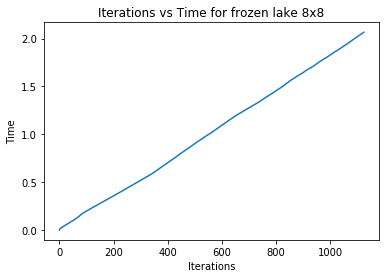

In [12]:
plt.plot(time_list)
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Iterations vs Time for frozen lake 8x8')

Text(0.5, 1.0, 'Iterations vs Error for forzen lake 8x8')

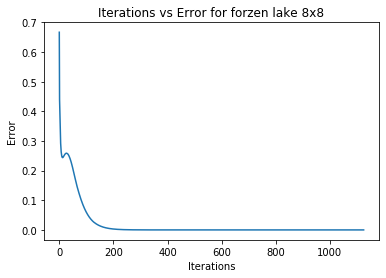

In [13]:
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Iterations vs Error for forzen lake 8x8')

In [2]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Iterations vs Error')

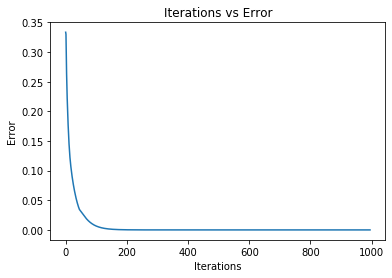

In [86]:
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Iterations vs Error')

Text(0.5, 1.0, 'Iterations vs Max Value')

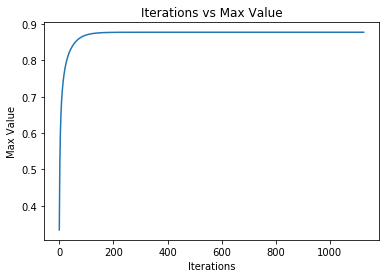

In [14]:
plt.plot(value_list)
plt.xlabel('Iterations')
plt.ylabel('Max Value')
plt.title('Iterations vs Max Value')

In [15]:
np.max(optimal_value_function)

0.877768739399142

In [20]:
optimal_value_function

array([0.41464036, 0.42720522, 0.44614822, 0.46832037, 0.49244371,
       0.51656983, 0.53526151, 0.54097522, 0.41168642, 0.42120783,
       0.43749572, 0.45838855, 0.48324013, 0.51353178, 0.54576786,
       0.55736841, 0.39675209, 0.39384054, 0.37549627, 0.        ,
       0.42167799, 0.49381921, 0.56121207, 0.5858589 , 0.36927228,
       0.35298254, 0.30653123, 0.20040371, 0.30075275, 0.        ,
       0.56901589, 0.62825904, 0.33266395, 0.29137537, 0.19730918,
       0.        , 0.28929026, 0.36195181, 0.53481945, 0.68969732,
       0.30613635, 0.        , 0.        , 0.08627639, 0.2139326 ,
       0.27271394, 0.        , 0.77203552, 0.2888856 , 0.        ,
       0.05769641, 0.04751102, 0.        , 0.25052148, 0.        ,
       0.87776874, 0.28038897, 0.20081512, 0.12732657, 0.        ,
       0.23959086, 0.48644206, 0.7371033 , 0.        ])

In [24]:

optimal_policy = extract_policy(env2, optimal_value_function, gamma=0.99)

In [ ]:
"Left","Down","Right","Up"

In [ ]:
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}

In [25]:
optimal_policy

64

In [76]:
optimal_policy == optimal_actions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [18]:
optimal_value_function2 = value_iteration(env=env2,gamma=1.0)

Value-iteration converged at iteration# 2357.


In [19]:
optimal_policy2 = extract_policy(optimal_value_function2, gamma=1.0)

In [20]:
optimal_policy2

array([1., 2., 2., 0., 1., 0., 3., 0., 2., 2., 2., 0., 0., 1., 1., 0.])

In [21]:
# Policy Iteration

In [30]:
def compute_value_function(env, policy, gamma=1.0):
    
    # initialize value table with zeros
    value_table = np.zeros(env.nS)
    
    # set the threshold
    threshold = 1e-10
    
    
    
    while True:
        
        # copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table)

        # for each state in the environment, select the action according to the policy and compute the value table
        for state in range(env.nS):
            action = policy[state]
            
            # build the value table with the selected action
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state]) 
                        for trans_prob, next_state, reward_prob, _ in env.P[state][action]])
            
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
            
    return value_table

In [31]:
def extract_policy(env, value_table, gamma = 1.0): 
    # Initialize the policy with zeros
    policy = np.zeros(env.observation_space.n) 
    
    
    for state in range(env.observation_space.n):
        
        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)
        
        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        
        # Select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)
    
    return policy

In [32]:
def policy_iteration(env,gamma = 1.0):
    
    # Initialize policy with zeros
    old_policy = np.zeros(env.observation_space.n) 
    value_function = np.zeros(env.nS)
    no_of_iterations = 200000
    
    error_list = []
    
    start_time = time.time()
    time_list = []
    value_list = []
    
    for i in range(no_of_iterations):
        
        # compute the value function
        new_value_function = compute_value_function(env, old_policy, gamma)
        value_list.append(np.max(new_value_function))
        
        # Extract new policy from the computed value function
        new_policy = extract_policy(env, new_value_function, gamma)
        
        time_list.append(time.time() - start_time)
   
        # Then we check whether we have reached convergence i.e whether we found the optimal
        # policy by comparing old_policy and new policy if it same we will break the iteration
        # else we update old_policy with new_policy
        error_list.append(np.sum(np.abs(new_value_function - value_function)))
        if (np.all(old_policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        old_policy = new_policy
        value_function = new_value_function
        
    return new_policy, new_value_function, time_list, error_list, value_list

In [37]:
new_policy, new_value_function, time_list, error_list, value_list = policy_iteration(env2, gamma=0.99)
new_policy

Policy-Iteration converged at step 11.


array([3., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 2., 2., 1., 3.,
       3., 0., 0., 2., 3., 2., 1., 3., 3., 3., 1., 0., 0., 2., 2., 0., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0.])

In [36]:
new_policy == optimal_policy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [93]:
optimal_value_function

array([0.54202593, 0.49880319, 0.47069569, 0.4568517 , 0.55845096,
       0.        , 0.35834807, 0.        , 0.59179874, 0.64307982,
       0.61520756, 0.        , 0.        , 0.74172044, 0.86283743,
       0.        ])

Text(0.5, 1.0, 'Iterations vs Time')

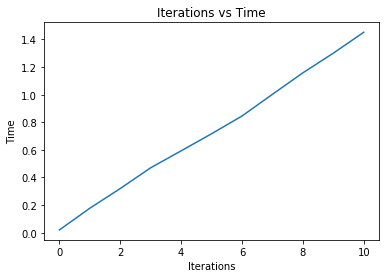

In [38]:
plt.plot(time_list)
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Iterations vs Time')

Text(0.5, 1.0, 'Iterations vs Error')

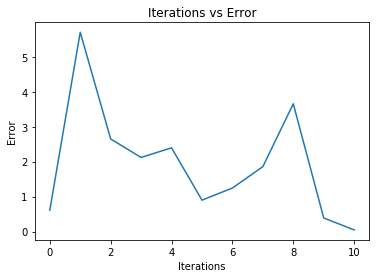

In [39]:
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Iterations vs Error')

Text(0.5, 1.0, 'Iterations vs Value')

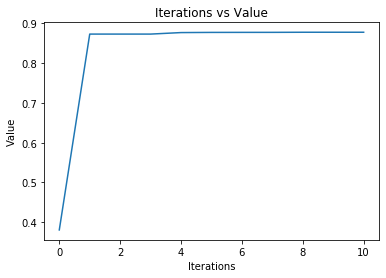

In [40]:
plt.plot(value_list)
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Iterations vs Value')

In [63]:
state = env.reset()
i = 0
episode_reward = 0
done = False
while not done:
    action = np.random.choice([0,1,2,3])
    print (action)
    state2, reward, done, info = env.step(action)  
    print (reward)
    print (done)
    
   # print (done)
    episode_reward += reward 
    i += 1 

3
0.0
False
0
0.0
False
3
0.0
False
3
0.0
False
1
0.0
False
2
0.0
True


In [98]:
state = env.reset()
i = 0
episode_reward = 0
done = False
while not done:
    action = optimal_actions[i]
   # print (action)
    state2, reward, done, info = env.step(action)  
    print (reward)
   # print (done)
    episode_reward += reward 
    i += 1 
   # print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


IndexError: index 16 is out of bounds for axis 0 with size 16

In [36]:
episode_reward

0.0

In [137]:
# check what's the maximum policy 

env.observation_space

Discrete(16)

In [ ]:
#q learning 

In [201]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0
        
        

def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])
    
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [202]:
def choose_action(state, epsilon):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
       # print ('max')
        action = np.argmax(Q[state, :])
    return action

def learn(state, state2, reward, action, lr_rate):
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    error = lr_rate * (target - predict)
    Q[state, action] = Q[state, action] + error
    return error


In [203]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
v = self.Q.max(axis=1)
            self.V = v
p = self.Q.argmax(axis=1)
self.policy = p
            

# look at it at each step level or episode level 
# Computing means all over maximal Q variations values
error = _np.absolute(dQ)

# compute the value function and the policy
v = self.Q.max(axis=1)
self.V = v
p = self.Q.argmax(axis=1)
self.policy = p

# need add time as well 

In [182]:
import time, pickle, os


#epsilon = 0.5
total_episodes = 100000
max_steps = 100

#lr_rate = 0.81
gamma = 0.99

# Start
episode_reward_list = []
epsilon = 1
epsilon_decay = 0.99
epsilon_min = 0.1

epsilon_list = []

lr_rate = 0.5
lr_rate_decay = 0.99
min_lr_rate = 0.001

lr_list = []

state_list = []
action_list = []
delta_error = []
v_list = []

start = time.time()

time_list = []

for episode in range(1, total_episodes):
    state = env.reset()
    t = 0
    
    episode_reward = 0
    state_list.append(state)
    while t < max_steps:
      #  env.render()

        action = choose_action(state, epsilon)  
        action_list.append(action)

        state2, reward, done, info = env.step(action)  
        
        state_list.append(state2)
        
        episode_reward += reward 
        

        error = learn(state, state2, reward, action, lr_rate)
        delta_error.append(np.abs(error))
        
        time_list.append(time.time() - start)
        
        v = Q.max(axis=1)
        v_list.append(v)
        

        state = state2

        t += 1
        
        if epsilon > epsilon_min:
            epsilon = epsilon * epsilon_decay
        epsilon_list.append(epsilon)
       
        if done:
            break

        #time.sleep(0.1)
    episode_reward_list.append(episode_reward)
    
    
    if episode >= 100 and episode % 100 == 0:
        print ('episode is {e} with episode reward as {r}'.format(e = episode, 
                                                                  r= np.mean(episode_reward_list[episode-100: episode] )))
        
       # epsilon = epsilon * epsilon_decay
        print (epsilon)
        print (episode_reward_list[episode-10: episode])
        
        if lr_rate > min_lr_rate:
            lr_rate = lr_rate * lr_rate_decay
        lr_list.append(lr_rate)
        
print(Q)

#with open("frozenLake_qTable.pkl", 'wb') as f:
#    pickle.dump(Q, f)

episode is 100 with episode reward as 0.28
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 200 with episode reward as 0.26
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 300 with episode reward as 0.31
0.09910481551887473
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 400 with episode reward as 0.29
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 500 with episode reward as 0.29
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 600 with episode reward as 0.31
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 700 with episode reward as 0.3
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 800 with episode reward as 0.36
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 900 with episode reward as 0.36
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 0.0, 

episode is 7300 with episode reward as 0.47
0.09910481551887473
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 7400 with episode reward as 0.34
0.09910481551887473
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 7500 with episode reward as 0.47
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 7600 with episode reward as 0.28
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 7700 with episode reward as 0.44
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 7800 with episode reward as 0.25
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 7900 with episode reward as 0.31
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]


KeyboardInterrupt: 

In [306]:
1+1

2

In [246]:


def qlearning(epsilon_decay, epsilon_min=0.1, epsilon=1, total_episodes = 50000):
    
    import time, pickle, os

    q = {}
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            q[(s,a)] = 0.0



    def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):

        qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
        q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    def choose_action(state, epsilon):
        action=0
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
           # print ('max')
            action = np.argmax(Q[state, :])
        return action

    def learn(state, state2, reward, action, lr_rate):
        predict = Q[state, action]
        target = reward + gamma * np.max(Q[state2, :])
        error = lr_rate * (target - predict)
        Q[state, action] = Q[state, action] + error
        return error

    #epsilon = 0.5
    
    max_steps = 100

    #lr_rate = 0.81
    gamma = 0.99

    # Start
    episode_reward_list = []
    #epsilon = 1
    #epsilon_decay = epsilon_decay
    #epsilon_min = 0.1

    epsilon_list = []

    lr_rate = 0.5
    lr_rate_decay = 0.9
    min_lr_rate = 0.001

    lr_list = []

    state_list = []
    action_list = []
    delta_error = []
    v_list = []

    start = time.time()

    time_list = []

    for episode in range(1, total_episodes):
        state = env.reset()
        t = 0

        episode_reward = 0
        state_list.append(state)
        while t < max_steps:
          #  env.render()

            action = choose_action(state, epsilon)  
            action_list.append(action)

            state2, reward, done, info = env.step(action)  

            state_list.append(state2)

            episode_reward += reward 


            error = learn(state, state2, reward, action, lr_rate)
            delta_error.append(np.abs(error))

            time_list.append(time.time() - start)

            v = Q.max(axis=1)
            v_list.append(v)


            state = state2

            t += 1
            
            
            if epsilon > epsilon_min:
                epsilon = epsilon * epsilon_decay
            
            
            epsilon_list.append(epsilon)
            lr_list.append(lr_rate)
           # epsilon = epsilon * epsilon_decay
            #print (epsilon)
            
            
            
            

            if done:
                break

            #time.sleep(0.1)
        episode_reward_list.append(episode_reward)


        if episode >= 100 and episode % 100 == 0:
           # print ('episode is {e} with episode reward as {r}'.format(e = episode, 
                                                                      r= np.mean(episode_reward_list[episode-100: episode] )))

            #print (episode_reward_list[episode-10: episode])
           # print (v)
            
            
            
            if lr_rate > min_lr_rate:
                lr_rate = lr_rate * lr_rate_decay
            


    return Q, epsilon_list, episode_reward_list, lr_list, state_list, action_list, delta_error, v_list, time_list
        
#print(Q)

#with open("frozenLake_qTable.pkl", 'wb') as f:
#    pickle.dump(Q, f)

In [302]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_09999_s1, epsilon_list_09999_s1, episode_reward_list_09999_s1, lr_list_09999_s1, state_list_09999_s1, action_list_09999_s1, delta_error_09999_s1, v_list_09999_s1, time_list_09999_s1 = qlearning(0.9999, epsilon_min=0.01)

episode is 100 with episode reward as 0.01
[0.10192404 0.06222862 0.08937798 0.01868697 0.10559346 0.
 0.1059233  0.         0.12631755 0.13752181 0.12789594 0.
 0.         0.2475     0.16939369 0.        ]
episode is 200 with episode reward as 0.02
[0.15304167 0.14290889 0.1105535  0.06820561 0.15974984 0.
 0.12514619 0.         0.18164521 0.20392543 0.24187695 0.
 0.         0.19183933 0.49150569 0.        ]
episode is 300 with episode reward as 0.01
[0.18580551 0.18044825 0.18572973 0.12981339 0.19653906 0.
 0.12529999 0.         0.21019503 0.26760714 0.27664315 0.
 0.         0.30836661 0.62461738 0.        ]
episode is 400 with episode reward as 0.04
[0.30625154 0.23199576 0.19966439 0.16832572 0.31398474 0.
 0.18800238 0.         0.36117991 0.47566006 0.52388148 0.
 0.         0.55960781 0.72370494 0.        ]
episode is 500 with episode reward as 0.02
[0.41759494 0.31455666 0.28166495 0.26233767 0.45059383 0.
 0.24165238 0.         0.48605035 0.50802116 0.55813138 0.
 0.        

episode is 4100 with episode reward as 0.69
[0.54647387 0.5048258  0.47618155 0.46116694 0.56454787 0.
 0.37522534 0.         0.60217304 0.65362669 0.62741106 0.
 0.         0.75144119 0.87294225 0.        ]
episode is 4200 with episode reward as 0.67
[0.54811409 0.50493043 0.47604829 0.46121602 0.56383124 0.
 0.37143248 0.         0.59407968 0.6503654  0.63529631 0.
 0.         0.75973372 0.87515539 0.        ]
episode is 4300 with episode reward as 0.67
[0.54616294 0.50560935 0.47643484 0.461273   0.56051996 0.
 0.37083586 0.         0.59450062 0.65272131 0.63412906 0.
 0.         0.75173019 0.87203398 0.        ]
episode is 4400 with episode reward as 0.62
[0.54363397 0.50614038 0.47577508 0.46140729 0.55997752 0.
 0.36438579 0.         0.59834068 0.65312406 0.6182817  0.
 0.         0.74946449 0.87251871 0.        ]
episode is 4500 with episode reward as 0.66
[0.54802082 0.50494146 0.47672872 0.46111283 0.56656951 0.
 0.36096501 0.         0.59841673 0.64476857 0.60868249 0.
 0.   

episode is 8100 with episode reward as 0.69
[0.54672051 0.50461822 0.47548991 0.46127686 0.56359846 0.
 0.35898324 0.         0.59733894 0.64712181 0.6185131  0.
 0.         0.74532498 0.86821656 0.        ]
episode is 8200 with episode reward as 0.69
[0.54700014 0.50469794 0.47547864 0.46120799 0.56361164 0.
 0.36096948 0.         0.59619061 0.64648699 0.6154271  0.
 0.         0.74531503 0.8673171  0.        ]
episode is 8300 with episode reward as 0.67
[0.54679741 0.50469103 0.47549811 0.46121769 0.56337111 0.
 0.36350052 0.         0.59616585 0.64481946 0.61568664 0.
 0.         0.7436638  0.86774144 0.        ]
episode is 8400 with episode reward as 0.7
[0.54666184 0.50495721 0.47526969 0.46130113 0.56227588 0.
 0.36311355 0.         0.5952724  0.64452018 0.61574343 0.
 0.         0.74667479 0.86793046 0.        ]
episode is 8500 with episode reward as 0.68
[0.54644795 0.50471527 0.47535747 0.46114955 0.56222639 0.
 0.36505986 0.         0.59509925 0.64634267 0.61583438 0.
 0.    

episode is 12100 with episode reward as 0.69
[0.54180451 0.50259005 0.47480161 0.46074128 0.55871142 0.
 0.36651883 0.         0.59215922 0.64355309 0.61694835 0.
 0.         0.73890952 0.86275105 0.        ]
episode is 12200 with episode reward as 0.71
[0.54229659 0.50251064 0.47495392 0.46073034 0.55856222 0.
 0.36568697 0.         0.59294345 0.64309459 0.6176732  0.
 0.         0.7412389  0.86208025 0.        ]
episode is 12300 with episode reward as 0.67
[0.5425758  0.50229252 0.4751097  0.46075747 0.55965552 0.
 0.36367267 0.         0.59338204 0.64379996 0.61505463 0.
 0.         0.74187197 0.86348094 0.        ]
episode is 12400 with episode reward as 0.68
[0.54290984 0.50249009 0.47499744 0.46066069 0.56000656 0.
 0.36299567 0.         0.59403131 0.64356583 0.61378221 0.
 0.         0.7421113  0.86287081 0.        ]
episode is 12500 with episode reward as 0.63
[0.54296462 0.50268633 0.47506904 0.46065431 0.559583   0.
 0.36034858 0.         0.59328529 0.64277084 0.61015801 0.
 

episode is 16100 with episode reward as 0.72
[0.54322826 0.50057044 0.47433512 0.46061775 0.55961321 0.
 0.35246784 0.         0.59167282 0.6413197  0.6102596  0.
 0.         0.74515334 0.86118006 0.        ]
episode is 16200 with episode reward as 0.75
[0.54283366 0.50069586 0.47437454 0.4606185  0.55877956 0.
 0.35585126 0.         0.59202044 0.64357958 0.61123847 0.
 0.         0.74373828 0.86236973 0.        ]
episode is 16300 with episode reward as 0.7
[0.54289262 0.50060194 0.47425021 0.4606989  0.55959864 0.
 0.35440109 0.         0.59299604 0.64362314 0.61163709 0.
 0.         0.74289436 0.86199903 0.        ]
episode is 16400 with episode reward as 0.64
[0.54315052 0.50014133 0.47448703 0.46056977 0.55997313 0.
 0.35852157 0.         0.5923736  0.64280226 0.60911257 0.
 0.         0.74224538 0.86196981 0.        ]
episode is 16500 with episode reward as 0.76
[0.54321946 0.50029451 0.47419866 0.46051095 0.55919369 0.
 0.35870541 0.         0.59283363 0.64329034 0.61279854 0.
 0

episode is 20100 with episode reward as 0.71
[0.54179116 0.50157033 0.47388834 0.46043451 0.55754916 0.
 0.35663451 0.         0.590572   0.64075351 0.61600971 0.
 0.         0.73937991 0.86059621 0.        ]
episode is 20200 with episode reward as 0.66
[0.54132921 0.50158049 0.47405804 0.46037644 0.55713384 0.
 0.35429846 0.         0.59103532 0.63951075 0.61292658 0.
 0.         0.74122139 0.8619048  0.        ]
episode is 20300 with episode reward as 0.75
[0.5409881  0.50151315 0.47418166 0.46041021 0.55751402 0.
 0.354261   0.         0.59249063 0.64140074 0.6152854  0.
 0.         0.74099045 0.86046489 0.        ]
episode is 20400 with episode reward as 0.7
[0.54097483 0.50152775 0.47410957 0.46037778 0.5581868  0.
 0.3554365  0.         0.59278505 0.6413597  0.61596045 0.
 0.         0.74014926 0.86100526 0.        ]
episode is 20500 with episode reward as 0.69
[0.54135351 0.50151987 0.4742492  0.46037461 0.55806567 0.
 0.35753729 0.         0.59014966 0.64131216 0.61517826 0.
 0

episode is 24100 with episode reward as 0.71
[0.53855134 0.50114457 0.47420123 0.4600488  0.55482722 0.
 0.3667543  0.         0.58791166 0.64154149 0.61641317 0.
 0.         0.73198269 0.85387668 0.        ]
episode is 24200 with episode reward as 0.71
[0.53894975 0.50097437 0.47430209 0.46007241 0.55420389 0.
 0.3679669  0.         0.58817233 0.64128978 0.61732785 0.
 0.         0.73283422 0.85265727 0.        ]
episode is 24300 with episode reward as 0.7
[0.53843687 0.50083986 0.47413974 0.46009253 0.55444676 0.
 0.3699098  0.         0.58870131 0.63937351 0.61585107 0.
 0.         0.73502515 0.85344797 0.        ]
episode is 24400 with episode reward as 0.63
[0.53841848 0.50122627 0.47398542 0.46008906 0.555333   0.
 0.36720819 0.         0.58881251 0.63861697 0.61080302 0.
 0.         0.73376047 0.8553256  0.        ]
episode is 24500 with episode reward as 0.71
[0.53844447 0.50131056 0.47379097 0.46005501 0.5542683  0.
 0.36714826 0.         0.58782318 0.63951291 0.61341628 0.
 0

episode is 28100 with episode reward as 0.63
[0.53904814 0.49984059 0.47298888 0.45972615 0.55431008 0.
 0.36232508 0.         0.5881419  0.6386841  0.61091616 0.
 0.         0.73587291 0.86694878 0.        ]
episode is 28200 with episode reward as 0.71
[0.53894558 0.49981679 0.47294762 0.45969018 0.55531099 0.
 0.36085308 0.         0.58962963 0.63921314 0.61255459 0.
 0.         0.73273683 0.86654919 0.        ]
episode is 28300 with episode reward as 0.68
[0.53883836 0.49968545 0.47303029 0.45974029 0.55470698 0.
 0.35860964 0.         0.5889787  0.64013403 0.61284104 0.
 0.         0.73577669 0.86698529 0.        ]
episode is 28400 with episode reward as 0.73
[0.53858379 0.4996968  0.4730979  0.45971943 0.55559904 0.
 0.35764224 0.         0.58907559 0.6397463  0.61627    0.
 0.         0.73616841 0.86532011 0.        ]
episode is 28500 with episode reward as 0.74
[0.53886428 0.49998916 0.47324868 0.45971635 0.5554729  0.
 0.36089202 0.         0.58684014 0.64087724 0.61706634 0.
 

episode is 32100 with episode reward as 0.76
[0.54277635 0.49922293 0.47192337 0.45873353 0.55934322 0.
 0.35829387 0.         0.59284244 0.6444719  0.62451356 0.
 0.         0.74192572 0.86562514 0.        ]
episode is 32200 with episode reward as 0.71
[0.54316635 0.49946349 0.47219235 0.45868744 0.55909699 0.
 0.35890572 0.         0.59284314 0.64486054 0.62283518 0.
 0.         0.74136529 0.86523253 0.        ]
episode is 32300 with episode reward as 0.68
[0.54307774 0.4996263  0.4723961  0.4586665  0.55894726 0.
 0.35754127 0.         0.59427901 0.64440215 0.62173045 0.
 0.         0.7415422  0.86610678 0.        ]
episode is 32400 with episode reward as 0.67
[0.54274836 0.49960242 0.47238124 0.4586108  0.55895286 0.
 0.35698318 0.         0.59449683 0.64485265 0.6179801  0.
 0.         0.74192518 0.86941331 0.        ]
episode is 32500 with episode reward as 0.74
[0.54272205 0.49953839 0.47250169 0.4586148  0.55936428 0.
 0.35688595 0.         0.59475755 0.64549927 0.62078616 0.
 

episode is 36100 with episode reward as 0.76
[0.54536745 0.50124363 0.47270286 0.45869437 0.56241222 0.
 0.35942722 0.         0.59436745 0.64610534 0.61877589 0.
 0.         0.74381081 0.86499513 0.        ]
episode is 36200 with episode reward as 0.64
[0.54551041 0.50123757 0.47231831 0.45851232 0.56241328 0.
 0.35840932 0.         0.5951699  0.64516984 0.61660666 0.
 0.         0.74589205 0.86453779 0.        ]
episode is 36300 with episode reward as 0.72
[0.54541585 0.50117804 0.47236935 0.45851423 0.56287302 0.
 0.3593768  0.         0.59566961 0.64622824 0.61744508 0.
 0.         0.74486111 0.86649549 0.        ]
episode is 36400 with episode reward as 0.69
[0.54600541 0.50115445 0.47220976 0.45853337 0.56181565 0.
 0.36058293 0.         0.59609665 0.64683101 0.61738319 0.
 0.         0.74543194 0.86561595 0.        ]
episode is 36500 with episode reward as 0.74
[0.54626413 0.50144129 0.47201422 0.4585881  0.5617667  0.
 0.35990793 0.         0.59665171 0.64727683 0.61917667 0.
 

episode is 40100 with episode reward as 0.63
[0.54477563 0.50133474 0.47293711 0.45873464 0.56071978 0.
 0.36199626 0.         0.59475161 0.64381991 0.61181436 0.
 0.         0.74891628 0.86801764 0.        ]
episode is 40200 with episode reward as 0.73
[0.54473446 0.50152958 0.4728492  0.45869792 0.5611391  0.
 0.36210668 0.         0.59502353 0.64425687 0.61530123 0.
 0.         0.74631505 0.86850576 0.        ]
episode is 40300 with episode reward as 0.63
[0.54512114 0.50145879 0.47275867 0.45855286 0.56103008 0.
 0.36263269 0.         0.59397085 0.6436698  0.61495531 0.
 0.         0.74326325 0.86763147 0.        ]
episode is 40400 with episode reward as 0.71
[0.54470903 0.5011161  0.47320787 0.458626   0.56086514 0.
 0.36481682 0.         0.59347056 0.64455023 0.61300012 0.
 0.         0.74303835 0.8687344  0.        ]
episode is 40500 with episode reward as 0.67
[0.54439014 0.50119805 0.47298327 0.45858012 0.5615596  0.
 0.36360968 0.         0.59239752 0.64209689 0.61584701 0.
 

episode is 44100 with episode reward as 0.75
[0.54332745 0.50201432 0.47310986 0.45882846 0.55988964 0.
 0.354149   0.         0.59273053 0.6449965  0.61724093 0.
 0.         0.74616637 0.86149254 0.        ]
episode is 44200 with episode reward as 0.69
[0.54360257 0.50170693 0.47283243 0.45886422 0.56032487 0.
 0.35302921 0.         0.59296091 0.64367    0.61883545 0.
 0.         0.74307151 0.86513804 0.        ]
episode is 44300 with episode reward as 0.67
[0.54341101 0.50161308 0.47275101 0.45883218 0.56010167 0.
 0.35448872 0.         0.59393925 0.64478434 0.61900721 0.
 0.         0.74126383 0.86306595 0.        ]
episode is 44400 with episode reward as 0.7
[0.54325058 0.50145245 0.47275259 0.45882034 0.55950562 0.
 0.3546359  0.         0.59346823 0.64408698 0.61927703 0.
 0.         0.74213636 0.86102979 0.        ]
episode is 44500 with episode reward as 0.7
[0.54320139 0.50154913 0.47269496 0.45888415 0.56000538 0.
 0.35397109 0.         0.59368262 0.64486257 0.61522228 0.
 0.

episode is 48100 with episode reward as 0.72
[0.54058826 0.50001802 0.47198085 0.45901268 0.55699013 0.
 0.34991351 0.         0.59306338 0.64695507 0.61419427 0.
 0.         0.74625855 0.86789002 0.        ]
episode is 48200 with episode reward as 0.8
[0.54064106 0.4998107  0.47219452 0.45900617 0.55789609 0.
 0.35144219 0.         0.59411153 0.64599727 0.61588773 0.
 0.         0.74801371 0.87092593 0.        ]
episode is 48300 with episode reward as 0.73
[0.54111397 0.49978537 0.47231612 0.4587998  0.5585173  0.
 0.35379647 0.         0.59365306 0.64573115 0.61828704 0.
 0.         0.74736211 0.87129268 0.        ]
episode is 48400 with episode reward as 0.71
[0.54147945 0.49983111 0.47207158 0.45865706 0.55945859 0.
 0.35581145 0.         0.59369997 0.64793586 0.61916867 0.
 0.         0.7461929  0.86896343 0.        ]
episode is 48500 with episode reward as 0.69
[0.54153931 0.49985797 0.47186193 0.45870731 0.55866848 0.
 0.35661634 0.         0.59406711 0.64753883 0.6193493  0.
 0

In [320]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_099_s5, epsilon_list_099_s5, episode_reward_list_099_s5, lr_list_099_s5, state_list_099_s5, action_list_099_s5, delta_error_099_s5, v_list_099_s5, time_list_099_s5 = qlearning(0.99, epsilon_min=0.5)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.02
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06510817 0.         0.
 0.         0.09661893 0.645975   0.        ]
episode is 400 with episode reward as 0.01
[0.12588611 0.09300038 0.0470142  0.01980509 0.13164459 0.
 0.02396806 0.         0.13822755 0.24328584 0.1430265  0.
 0.         0.28935067 0.2706279  0.        ]
episode is 500 with episode reward as 0.05
[0.20331258 0.1576788  0.13729022 0.07283601 0.20971684 0.
 0.11699143 0.         0.2253508  0.35557399 0.31098278 0.
 0.         0.53930986 0.71045827 0.        ]
episode is 600 with episode reward as 0.06
[0.39889535 0.33062298 0.26720087 0.2139423  0.41579698 0.
 0.26410557 0.         0.50752077 0.58053008 0.67464023 0.
 0.         0.61348677 0.82974428 

episode is 4700 with episode reward as 0.06
[0.54206348 0.49445905 0.46540032 0.45172496 0.55827038 0.
 0.36386748 0.         0.59308506 0.64612596 0.61914895 0.
 0.         0.7445405  0.85159426 0.        ]
episode is 4800 with episode reward as 0.08
[0.54206774 0.49665916 0.46566025 0.45181561 0.55979668 0.
 0.36087735 0.         0.59286846 0.64651281 0.62035258 0.
 0.         0.7431499  0.85125    0.        ]
episode is 4900 with episode reward as 0.09
[0.54198018 0.49664517 0.46647361 0.45197492 0.55981346 0.
 0.35815192 0.         0.59292436 0.64711012 0.62062326 0.
 0.         0.74364739 0.85257649 0.        ]
episode is 5000 with episode reward as 0.06
[0.54208151 0.49573302 0.46721661 0.45196923 0.55814583 0.
 0.36092705 0.         0.59083813 0.64709979 0.62043695 0.
 0.         0.74389598 0.85281912 0.        ]
episode is 5100 with episode reward as 0.08
[0.54218999 0.49649018 0.46761983 0.45200916 0.5576423  0.
 0.36090972 0.         0.59147167 0.64682777 0.62319843 0.
 0.   

episode is 9100 with episode reward as 0.08
[0.54374784 0.49836349 0.46856227 0.45274737 0.55965298 0.
 0.36375142 0.         0.59274043 0.64457536 0.61891989 0.
 0.         0.74184471 0.85721738 0.        ]
episode is 9200 with episode reward as 0.11
[0.5436776  0.49807013 0.4685024  0.45280212 0.55986728 0.
 0.36359861 0.         0.59288296 0.64503504 0.61906388 0.
 0.         0.74262647 0.85754421 0.        ]
episode is 9300 with episode reward as 0.08
[0.54363071 0.49808418 0.46822511 0.45279317 0.55951925 0.
 0.36212605 0.         0.59335235 0.64527017 0.61928028 0.
 0.         0.74229962 0.85797469 0.        ]
episode is 9400 with episode reward as 0.07
[0.54377186 0.4980775  0.46815069 0.45284351 0.55944869 0.
 0.36111763 0.         0.59363296 0.64552256 0.61876083 0.
 0.         0.74276755 0.85816614 0.        ]
episode is 9500 with episode reward as 0.08
[0.54367378 0.49812742 0.46816598 0.45284672 0.55918484 0.
 0.3625249  0.         0.59364637 0.64596152 0.61873703 0.
 0.   

episode is 13400 with episode reward as 0.08
[0.54323373 0.49936839 0.46876908 0.4538359  0.5586763  0.
 0.35505381 0.         0.59053977 0.64256183 0.61675598 0.
 0.         0.74242014 0.86290589 0.        ]
episode is 13500 with episode reward as 0.1
[0.54296372 0.4993214  0.4686005  0.45394444 0.55883302 0.
 0.35768734 0.         0.59114211 0.64244877 0.61777313 0.
 0.         0.74196063 0.86306805 0.        ]
episode is 13600 with episode reward as 0.05
[0.54307478 0.49936016 0.468732   0.45395934 0.55929588 0.
 0.35587422 0.         0.59153689 0.64282666 0.61748821 0.
 0.         0.74164369 0.86320365 0.        ]
episode is 13700 with episode reward as 0.06
[0.5431033  0.49899765 0.468696   0.45397183 0.55927001 0.
 0.35574907 0.         0.59201772 0.64239588 0.61749911 0.
 0.         0.74165158 0.86369639 0.        ]
episode is 13800 with episode reward as 0.03
[0.54295784 0.49850975 0.46876837 0.45399028 0.55886132 0.
 0.35492848 0.         0.59173504 0.64180129 0.6171795  0.
 0

episode is 18000 with episode reward as 0.05
[0.54164711 0.49779868 0.46873554 0.45477345 0.55827039 0.
 0.35443559 0.         0.59219836 0.64149348 0.61167273 0.
 0.         0.73982523 0.86203253 0.        ]
episode is 18100 with episode reward as 0.1
[0.54170555 0.49744374 0.46880643 0.45480358 0.55851818 0.
 0.35400518 0.         0.59175248 0.64161997 0.61167775 0.
 0.         0.73995409 0.8617429  0.        ]
episode is 18200 with episode reward as 0.08
[0.54194252 0.49730151 0.46879449 0.45479247 0.55867094 0.
 0.35372041 0.         0.59201723 0.64144875 0.61120252 0.
 0.         0.74028624 0.86197787 0.        ]
episode is 18300 with episode reward as 0.06
[0.54205534 0.49727118 0.4687513  0.45484865 0.55875314 0.
 0.35300218 0.         0.59218183 0.6418653  0.61171642 0.
 0.         0.73956475 0.86201482 0.        ]
episode is 18400 with episode reward as 0.08
[0.54196911 0.49743525 0.46871208 0.45490356 0.55879216 0.
 0.35244236 0.         0.59229642 0.64133905 0.61194172 0.
 0

episode is 22100 with episode reward as 0.09
[0.54218826 0.49832447 0.46887761 0.45485979 0.55926349 0.
 0.35333913 0.         0.59219669 0.64324496 0.61570606 0.
 0.         0.73675005 0.85734038 0.        ]
episode is 22200 with episode reward as 0.02
[0.54239013 0.49875401 0.46889569 0.45487703 0.55901202 0.
 0.35277165 0.         0.59168517 0.64351411 0.61516034 0.
 0.         0.73658358 0.85694681 0.        ]
episode is 22300 with episode reward as 0.05
[0.54242333 0.49853199 0.46901602 0.45490694 0.55907643 0.
 0.35089276 0.         0.5916293  0.64323204 0.61453643 0.
 0.         0.73652581 0.85717242 0.        ]
episode is 22400 with episode reward as 0.15
[0.54259511 0.49813086 0.4689445  0.45498542 0.55911317 0.
 0.35218756 0.         0.59202258 0.64321355 0.61537142 0.
 0.         0.73745307 0.85800151 0.        ]
episode is 22500 with episode reward as 0.1
[0.54253716 0.4976468  0.4690769  0.45500373 0.55932809 0.
 0.35252644 0.         0.59285461 0.64300962 0.6153377  0.
 0

episode is 26500 with episode reward as 0.1
[0.54121003 0.49910489 0.46932315 0.45513868 0.5573462  0.
 0.35762615 0.         0.59038907 0.64065808 0.61208579 0.
 0.         0.73796395 0.85730941 0.        ]
episode is 26600 with episode reward as 0.11
[0.54114378 0.4993106  0.46933184 0.45515651 0.55705241 0.
 0.35829315 0.         0.59041991 0.64086929 0.61298144 0.
 0.         0.73822011 0.8576295  0.        ]
episode is 26700 with episode reward as 0.08
[0.54127265 0.4991089  0.46953538 0.4551555  0.55759463 0.
 0.35980616 0.         0.58998365 0.6409442  0.612855   0.
 0.         0.73845336 0.8571674  0.        ]
episode is 26800 with episode reward as 0.09
[0.54112889 0.49908915 0.46974351 0.45517938 0.55774501 0.
 0.35946093 0.         0.58959924 0.6412773  0.61332706 0.
 0.         0.73802304 0.85759251 0.        ]
episode is 26900 with episode reward as 0.07
[0.54124899 0.4992954  0.46979783 0.45522039 0.55778815 0.
 0.35969046 0.         0.58998255 0.64102384 0.61264892 0.
 0

episode is 30400 with episode reward as 0.09
[0.54125319 0.49743042 0.46970088 0.45541824 0.55767577 0.
 0.36375453 0.         0.5901599  0.64112123 0.61388248 0.
 0.         0.73554313 0.85885067 0.        ]
episode is 30500 with episode reward as 0.05
[0.54114021 0.49772085 0.46979978 0.45542704 0.55768267 0.
 0.36289605 0.         0.5899395  0.64091382 0.61461141 0.
 0.         0.7354763  0.85900743 0.        ]
episode is 30600 with episode reward as 0.03
[0.54090223 0.49722247 0.46967312 0.4554928  0.55721545 0.
 0.36188342 0.         0.59009405 0.64078404 0.61509448 0.
 0.         0.73536584 0.85875838 0.        ]
episode is 30700 with episode reward as 0.08
[0.5410017  0.49686288 0.46979229 0.45550909 0.55739935 0.
 0.36171718 0.         0.59026389 0.64104716 0.61465803 0.
 0.         0.73546293 0.85849162 0.        ]
episode is 30800 with episode reward as 0.06
[0.54092459 0.49726659 0.46970784 0.45560049 0.55712242 0.
 0.36231052 0.         0.59012657 0.64104907 0.61359856 0.
 

episode is 34500 with episode reward as 0.05
[0.541009   0.49828638 0.4700213  0.45535625 0.55812892 0.
 0.3594607  0.         0.5930605  0.64243321 0.61625667 0.
 0.         0.73838342 0.85808841 0.        ]
episode is 34600 with episode reward as 0.06
[0.54108434 0.49831029 0.46987161 0.4553271  0.55817256 0.
 0.35695653 0.         0.59340346 0.64239194 0.61647481 0.
 0.         0.73817861 0.85732539 0.        ]
episode is 34700 with episode reward as 0.04
[0.54115986 0.49812164 0.46987885 0.45529504 0.5581813  0.
 0.35672103 0.         0.59360122 0.6424658  0.61547544 0.
 0.         0.73828157 0.85761595 0.        ]
episode is 34800 with episode reward as 0.1
[0.54122469 0.49797815 0.47003703 0.45531445 0.55863689 0.
 0.35587852 0.         0.59302514 0.64242979 0.61719047 0.
 0.         0.7383624  0.85785168 0.        ]
episode is 34900 with episode reward as 0.07
[0.54133045 0.49796364 0.47011671 0.45529647 0.55868229 0.
 0.35529693 0.         0.59299355 0.64270434 0.61845786 0.
 0

episode is 39000 with episode reward as 0.07
[0.54178477 0.49930885 0.47002483 0.45591239 0.55763733 0.
 0.35683839 0.         0.59023908 0.64200614 0.61559257 0.
 0.         0.73490182 0.85419563 0.        ]
episode is 39100 with episode reward as 0.04
[0.54175563 0.49859433 0.47005913 0.45593247 0.5579246  0.
 0.35698935 0.         0.58993682 0.64180138 0.61533109 0.
 0.         0.73511595 0.85437314 0.        ]
episode is 39200 with episode reward as 0.05
[0.54180442 0.49883896 0.47008793 0.45597294 0.55802002 0.
 0.3561593  0.         0.5898293  0.64160252 0.61533705 0.
 0.         0.73485092 0.85415035 0.        ]
episode is 39300 with episode reward as 0.06
[0.54189641 0.4985038  0.47011004 0.45590976 0.55786043 0.
 0.35510879 0.         0.58996967 0.64138445 0.61547382 0.
 0.         0.73520339 0.85399988 0.        ]
episode is 39400 with episode reward as 0.05
[0.54188603 0.49826482 0.47002494 0.45597382 0.55833829 0.
 0.35587648 0.         0.59027926 0.64071684 0.61568781 0.
 

episode is 43800 with episode reward as 0.06
[0.54320759 0.49914267 0.46950392 0.45570406 0.56016159 0.
 0.35915037 0.         0.59135462 0.64101644 0.61041527 0.
 0.         0.73515159 0.85646314 0.        ]
episode is 43900 with episode reward as 0.06
[0.543127   0.49895764 0.46926691 0.45566673 0.55945356 0.
 0.35885783 0.         0.59115809 0.64117041 0.60943082 0.
 0.         0.73572625 0.85659021 0.        ]
episode is 44000 with episode reward as 0.05
[0.54318816 0.49886081 0.46933553 0.4556328  0.55926562 0.
 0.35788078 0.         0.59101928 0.6407484  0.60918345 0.
 0.         0.73608413 0.85703169 0.        ]
episode is 44100 with episode reward as 0.09
[0.5431286  0.49907321 0.46938097 0.45561867 0.55933295 0.
 0.35797481 0.         0.59138272 0.64092916 0.60875734 0.
 0.         0.7366837  0.85760445 0.        ]
episode is 44200 with episode reward as 0.11
[0.54282637 0.49920559 0.46935286 0.4556354  0.55944655 0.
 0.35806732 0.         0.59110255 0.64051489 0.60991892 0.
 

episode is 48000 with episode reward as 0.04
[0.54202645 0.49748755 0.46931849 0.45575883 0.55818739 0.
 0.36478594 0.         0.58847534 0.63682836 0.60796448 0.
 0.         0.73379249 0.85768712 0.        ]
episode is 48100 with episode reward as 0.07
[0.54187699 0.49750712 0.4692669  0.45577821 0.55840591 0.
 0.36557975 0.         0.58821198 0.63696447 0.60898751 0.
 0.         0.73392851 0.85759111 0.        ]
episode is 48200 with episode reward as 0.05
[0.54160289 0.49761362 0.46937597 0.45576949 0.55824366 0.
 0.36579497 0.         0.58804526 0.63737117 0.60866353 0.
 0.         0.73398264 0.85731576 0.        ]
episode is 48300 with episode reward as 0.05
[0.5417637  0.49782148 0.4692514  0.45573889 0.55850241 0.
 0.36607369 0.         0.58769518 0.63701021 0.60750993 0.
 0.         0.73398482 0.85760733 0.        ]
episode is 48400 with episode reward as 0.06
[0.54157883 0.49790766 0.46926842 0.45569949 0.5583784  0.
 0.36617048 0.         0.58810548 0.63635429 0.60739187 0.
 

In [325]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_1, epsilon_list_1, episode_reward_list_1, lr_list_1, state_list_1, action_list_1, delta_error_1, v_list_1, time_list_1 = qlearning(epsilon_decay=0.5, epsilon_min=0.3)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

episode is 5600 with episode reward as 0.03
[5.41700418e-03 1.90125199e-03 2.28090484e-03 1.09028567e-04
 5.92896707e-03 0.00000000e+00 7.12240686e-03 0.00000000e+00
 7.29850601e-03 1.74492718e-02 4.85414012e-02 0.00000000e+00
 0.00000000e+00 6.26842732e-02 2.71615471e-01 0.00000000e+00]
episode is 5700 with episode reward as 0.03
[5.48171323e-03 1.91364936e-03 2.33236333e-03 1.14995879e-04
 6.01144163e-03 0.00000000e+00 7.37260489e-03 0.00000000e+00
 7.38679403e-03 1.78336084e-02 4.89475445e-02 0.00000000e+00
 0.00000000e+00 6.19775216e-02 2.74314417e-01 0.00000000e+00]
episode is 5800 with episode reward as 0.02
[5.54280260e-03 1.96771316e-03 2.40512587e-03 1.14995879e-04
 6.05913074e-03 0.00000000e+00 7.67047890e-03 0.00000000e+00
 7.48778836e-03 1.78917110e-02 4.97331005e-02 0.00000000e+00
 0.00000000e+00 6.19320356e-02 2.74759810e-01 0.00000000e+00]
episode is 5900 with episode reward as 0.03
[5.60158485e-03 1.97988872e-03 2.44815515e-03 1.14995879e-04
 6.12281009e-03 0.00000000e+

episode is 8600 with episode reward as 0.01
[7.08698551e-03 2.68700585e-03 3.46432956e-03 1.99954233e-04
 7.68446867e-03 0.00000000e+00 1.06040729e-02 0.00000000e+00
 9.15285411e-03 2.32843886e-02 5.99974236e-02 0.00000000e+00
 0.00000000e+00 7.34056355e-02 3.00763415e-01 0.00000000e+00]
episode is 8700 with episode reward as 0.01
[7.14145738e-03 2.69025341e-03 3.51640206e-03 2.06395732e-04
 7.74335264e-03 0.00000000e+00 1.07725035e-02 0.00000000e+00
 9.15010620e-03 2.35991152e-02 6.00773310e-02 0.00000000e+00
 0.00000000e+00 7.33649944e-02 3.00510921e-01 0.00000000e+00]
episode is 8800 with episode reward as 0.05
[7.19388237e-03 2.70387885e-03 3.53265246e-03 2.09668002e-04
 7.80384357e-03 0.00000000e+00 1.07814430e-02 0.00000000e+00
 9.19672085e-03 2.38009021e-02 6.08434217e-02 0.00000000e+00
 0.00000000e+00 7.50930960e-02 3.01645835e-01 0.00000000e+00]
episode is 8900 with episode reward as 0.0
[7.25757982e-03 2.72106705e-03 3.54350232e-03 2.12962278e-04
 7.85293699e-03 0.00000000e+0

episode is 12100 with episode reward as 0.03
[0.00948083 0.00373674 0.00506773 0.00037478 0.01013096 0.
 0.01300483 0.         0.01182396 0.02872829 0.07174922 0.
 0.         0.09008505 0.31833368 0.        ]
episode is 12200 with episode reward as 0.03
[0.00954387 0.00379941 0.00508114 0.00037477 0.01020697 0.
 0.01302907 0.         0.01198748 0.02930877 0.07196053 0.
 0.         0.09093784 0.31777481 0.        ]
episode is 12300 with episode reward as 0.03
[0.00960654 0.00379644 0.00509758 0.00037477 0.01024405 0.
 0.01304534 0.         0.01210162 0.02954062 0.07249858 0.
 0.         0.09122758 0.31728284 0.        ]
episode is 12400 with episode reward as 0.04
[0.00967185 0.00382481 0.00517002 0.00037477 0.01032344 0.
 0.01335246 0.         0.01215601 0.03012026 0.07239234 0.
 0.         0.09128499 0.31953452 0.        ]
episode is 12500 with episode reward as 0.03
[0.00971844 0.0038619  0.00527104 0.00038911 0.01039635 0.
 0.01339473 0.         0.01245883 0.03025392 0.07237307 0.
 

episode is 16700 with episode reward as 0.01
[0.01289419 0.00586083 0.00801742 0.00066883 0.0137398  0.
 0.01944627 0.         0.01597159 0.03768984 0.08841533 0.
 0.         0.10625318 0.33814061 0.        ]
episode is 16800 with episode reward as 0.02
[0.01297083 0.0058781  0.00803319 0.00066883 0.01384708 0.
 0.01939601 0.         0.01619305 0.03780145 0.0882952  0.
 0.         0.1061411  0.33946148 0.        ]
episode is 16900 with episode reward as 0.05
[0.0130437  0.00591132 0.00812652 0.00066883 0.01394667 0.
 0.01998605 0.         0.01617457 0.03792153 0.0893575  0.
 0.         0.10715994 0.34037963 0.        ]
episode is 17000 with episode reward as 0.04
[0.01313216 0.00596526 0.00819773 0.00067622 0.01403714 0.
 0.02003102 0.         0.01638301 0.03808127 0.08936285 0.
 0.         0.10768798 0.34025899 0.        ]
episode is 17100 with episode reward as 0.04
[0.01321365 0.00600926 0.00828366 0.00068368 0.01411177 0.
 0.02021714 0.         0.01641122 0.03826064 0.08928569 0.
 

episode is 20900 with episode reward as 0.03
[0.01582355 0.00760875 0.01096346 0.00117043 0.01674033 0.
 0.02384049 0.         0.01905349 0.04158368 0.10033721 0.
 0.         0.11552241 0.34860591 0.        ]
episode is 21000 with episode reward as 0.01
[0.01590071 0.00761969 0.0110533  0.00118009 0.01681494 0.
 0.02426588 0.         0.01923064 0.04118183 0.1002492  0.
 0.         0.11598617 0.34829233 0.        ]
episode is 21100 with episode reward as 0.06
[0.01597197 0.00760813 0.01110299 0.00118987 0.01690975 0.
 0.02423037 0.         0.01912311 0.04139724 0.1006034  0.
 0.         0.11731801 0.34993908 0.        ]
episode is 21200 with episode reward as 0.01
[0.01601936 0.00758653 0.01118958 0.00118987 0.01696904 0.
 0.02433033 0.         0.01892618 0.04144426 0.10071259 0.
 0.         0.1174567  0.34920735 0.        ]
episode is 21300 with episode reward as 0.01
[0.01608703 0.0076177  0.0112149  0.00121942 0.01698563 0.
 0.02427963 0.         0.01901647 0.04186675 0.10086983 0.
 

episode is 25400 with episode reward as 0.03
[0.01792749 0.00973149 0.01416281 0.00175177 0.01861443 0.
 0.02967742 0.         0.02019087 0.04653073 0.11334091 0.
 0.         0.13523215 0.36624633 0.        ]
episode is 25500 with episode reward as 0.06
[0.01794506 0.00971743 0.01430476 0.00180092 0.01863536 0.
 0.03019044 0.         0.02053762 0.0473601  0.11479107 0.
 0.         0.13486105 0.36779403 0.        ]
episode is 25600 with episode reward as 0.02
[0.0179666  0.00972852 0.01442726 0.00181329 0.01869669 0.
 0.03035185 0.         0.02065205 0.04731497 0.11499469 0.
 0.         0.13444153 0.36807894 0.        ]
episode is 25700 with episode reward as 0.02
[0.01799475 0.0098187  0.01447238 0.00181329 0.01875477 0.
 0.03059184 0.         0.02066021 0.04731348 0.11517057 0.
 0.         0.13424216 0.36750197 0.        ]
episode is 25800 with episode reward as 0.07
[0.01803326 0.00987637 0.01451067 0.00183804 0.01882464 0.
 0.03061246 0.         0.02069577 0.04845145 0.11561221 0.
 

episode is 29900 with episode reward as 0.06
[0.02041245 0.01131902 0.01829576 0.0024861  0.02134848 0.
 0.03635498 0.         0.02320087 0.05174214 0.12392294 0.
 0.         0.14007055 0.38020232 0.        ]
episode is 30000 with episode reward as 0.01
[0.0204506  0.01139654 0.01856324 0.00251764 0.02140212 0.
 0.03637243 0.         0.02337652 0.05189543 0.12350026 0.
 0.         0.13930815 0.38032324 0.        ]
episode is 30100 with episode reward as 0.01
[0.02050373 0.01144031 0.0186138  0.00251761 0.02142055 0.
 0.0362064  0.         0.02361757 0.05154499 0.12341849 0.
 0.         0.1394243  0.38042731 0.        ]
episode is 30200 with episode reward as 0.04
[0.02055098 0.01148863 0.01864859 0.00254941 0.02148116 0.
 0.0360406  0.         0.02376067 0.05193165 0.12335387 0.
 0.         0.13898336 0.38189481 0.        ]
episode is 30300 with episode reward as 0.06
[0.02058513 0.01153199 0.01875441 0.00258126 0.02149796 0.
 0.03636478 0.         0.02356204 0.05252988 0.12394451 0.
 

episode is 34300 with episode reward as 0.03
[0.02201764 0.01270772 0.02151836 0.00341202 0.0229463  0.
 0.04045644 0.         0.02511835 0.05564191 0.13497236 0.
 0.         0.14378763 0.39455881 0.        ]
episode is 34400 with episode reward as 0.02
[0.02204755 0.01274067 0.02157389 0.00348313 0.02297234 0.
 0.04059932 0.         0.02505436 0.05606314 0.1351498  0.
 0.         0.14369503 0.39423982 0.        ]
episode is 34500 with episode reward as 0.02
[0.02208745 0.01287269 0.02171222 0.00350112 0.023033   0.
 0.04040571 0.         0.02508047 0.05668047 0.13513748 0.
 0.         0.14207677 0.39467588 0.        ]
episode is 34600 with episode reward as 0.06
[0.02212545 0.01287534 0.02185665 0.00351907 0.02306686 0.
 0.04064171 0.         0.0252199  0.05679471 0.1357367  0.
 0.         0.14256914 0.39676289 0.        ]
episode is 34700 with episode reward as 0.03
[0.02216378 0.0130417  0.0219949  0.00355523 0.02312277 0.
 0.04094504 0.         0.02531618 0.05726591 0.13606312 0.
 

episode is 38500 with episode reward as 0.08
[0.02435648 0.01524918 0.02463744 0.00476917 0.02605383 0.
 0.04366245 0.         0.03264748 0.05673761 0.14946089 0.
 0.         0.14571987 0.39745357 0.        ]
episode is 38600 with episode reward as 0.03
[0.02452169 0.01533793 0.02470116 0.00476917 0.02647702 0.
 0.04427343 0.         0.03362548 0.05675124 0.14874702 0.
 0.         0.14510168 0.39765593 0.        ]
episode is 38700 with episode reward as 0.02
[0.02476637 0.01526414 0.02474811 0.00478884 0.02700036 0.
 0.04452572 0.         0.03461197 0.05709265 0.1483321  0.
 0.         0.14497417 0.39684318 0.        ]
episode is 38800 with episode reward as 0.03
[0.02502336 0.01539591 0.02480654 0.00478884 0.02751708 0.
 0.04467974 0.         0.0351743  0.05745753 0.14852671 0.
 0.         0.14513444 0.39562504 0.        ]
episode is 38900 with episode reward as 0.04
[0.02531819 0.01546742 0.02495219 0.00484795 0.02795656 0.
 0.0449737  0.         0.03595329 0.05714627 0.14853517 0.
 

episode is 42900 with episode reward as 0.1
[0.04127019 0.01952647 0.02956579 0.00624541 0.0455524  0.
 0.0553878  0.         0.05791649 0.09629244 0.1616046  0.
 0.         0.15757857 0.4095783  0.        ]
episode is 43000 with episode reward as 0.1
[0.04180247 0.01953619 0.02969687 0.00629144 0.04647857 0.
 0.05502422 0.         0.05943094 0.09878883 0.16253382 0.
 0.         0.15882902 0.41036417 0.        ]
episode is 43100 with episode reward as 0.06
[0.04242049 0.01966745 0.02996494 0.00636042 0.04727822 0.
 0.05491439 0.         0.06054073 0.10049654 0.16239626 0.
 0.         0.15964229 0.41039121 0.        ]
episode is 43200 with episode reward as 0.07
[0.04299618 0.01972546 0.03015824 0.00640723 0.04811763 0.
 0.05467073 0.         0.06172098 0.10318896 0.16389605 0.
 0.         0.16049171 0.40764367 0.        ]
episode is 43300 with episode reward as 0.07
[0.04369089 0.01991486 0.03038993 0.00647756 0.04892696 0.
 0.0544173  0.         0.06307989 0.10547115 0.16432383 0.
 0.

[0.08347522 0.03263353 0.03890832 0.00859233 0.09168216 0.
 0.06688736 0.         0.1112083  0.15176178 0.19996542 0.
 0.         0.17855384 0.43166081 0.        ]
episode is 47400 with episode reward as 0.12
[0.0844054  0.0327321  0.03928344 0.00865219 0.09234733 0.
 0.06783496 0.         0.11184192 0.15277781 0.20056494 0.
 0.         0.17874427 0.43465776 0.        ]
episode is 47500 with episode reward as 0.08
[0.08539397 0.03301844 0.03946459 0.0086521  0.09327472 0.
 0.06808472 0.         0.11302236 0.1531438  0.19943425 0.
 0.         0.17895945 0.43532273 0.        ]
episode is 47600 with episode reward as 0.1
[0.08633659 0.03352664 0.03983227 0.00871298 0.09456441 0.
 0.06863859 0.         0.11343929 0.15367714 0.20003815 0.
 0.         0.1787862  0.43645522 0.        ]
episode is 47700 with episode reward as 0.15
[0.08735845 0.03382893 0.03994962 0.00880472 0.0953237  0.
 0.06881889 0.         0.11454415 0.15436989 0.19956113 0.
 0.         0.18401917 0.43787326 0.        ]
e

In [326]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_2, epsilon_list_2, episode_reward_list_2, lr_list_2, state_list_2, action_list_2, delta_error_2, v_list_2, time_list_2 = qlearning(epsilon_decay=0.5, epsilon_min=0.1)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

episode is 9100 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00099834 0.        ]
episode is 9200 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00099834 0.        ]
episode is 9300 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00099834 0.        ]
episode is 9400 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00099834 0.        ]
episode is 9500 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        

episode is 12600 with episode reward as 0.3
[4.42862130e-05 1.14870568e-06 1.91961969e-05 2.53552695e-09
 1.50152478e-04 0.00000000e+00 6.92135253e-04 0.00000000e+00
 6.99423128e-04 4.05114455e-03 1.86445247e-02 0.00000000e+00
 0.00000000e+00 1.87486596e-02 1.72961966e-01 0.00000000e+00]
episode is 12700 with episode reward as 0.32
[9.07444830e-05 2.69390980e-06 2.59480807e-05 2.53552695e-09
 2.82752486e-04 0.00000000e+00 7.89612196e-04 0.00000000e+00
 1.12582074e-03 5.46905126e-03 2.24625248e-02 0.00000000e+00
 0.00000000e+00 2.18489886e-02 1.94655032e-01 0.00000000e+00]
episode is 12800 with episode reward as 0.33
[1.62277882e-04 4.75847966e-06 3.36371074e-05 2.53552695e-09
 4.46428854e-04 0.00000000e+00 1.06654017e-03 0.00000000e+00
 1.67726263e-03 7.17061569e-03 2.65304720e-02 0.00000000e+00
 0.00000000e+00 2.56476460e-02 2.15465104e-01 0.00000000e+00]
episode is 12900 with episode reward as 0.33
[2.72265255e-04 7.36706692e-06 5.63729195e-05 2.53552695e-09
 6.99959274e-04 0.0000000

episode is 15800 with episode reward as 0.27
[3.60112002e-02 4.80375128e-03 5.65121361e-03 2.64961094e-05
 4.37569583e-02 0.00000000e+00 3.07980359e-02 0.00000000e+00
 6.57780214e-02 1.12483323e-01 1.65477222e-01 0.00000000e+00
 0.00000000e+00 1.78035149e-01 5.01851286e-01 0.00000000e+00]
episode is 15900 with episode reward as 0.25
[3.82044061e-02 5.47086164e-03 5.87085790e-03 2.64961094e-05
 4.61876489e-02 0.00000000e+00 3.16305898e-02 0.00000000e+00
 6.86986101e-02 1.16187666e-01 1.70532001e-01 0.00000000e+00
 0.00000000e+00 1.79824793e-01 5.03279365e-01 0.00000000e+00]
episode is 16000 with episode reward as 0.31
[4.06388515e-02 6.04750059e-03 6.24614222e-03 3.22956090e-05
 4.90185986e-02 0.00000000e+00 3.29455364e-02 0.00000000e+00
 7.12780961e-02 1.19612661e-01 1.77224621e-01 0.00000000e+00
 0.00000000e+00 1.80204894e-01 5.11744705e-01 0.00000000e+00]
episode is 16100 with episode reward as 0.23
[4.28119554e-02 6.50249780e-03 6.61472927e-03 3.87166363e-05
 5.19080210e-02 0.000000

episode is 18900 with episode reward as 0.27
[1.20017910e-01 2.86493620e-02 2.17313211e-02 2.04231530e-04
 1.31866847e-01 0.00000000e+00 6.67813112e-02 0.00000000e+00
 1.61360915e-01 2.16587224e-01 2.69807176e-01 0.00000000e+00
 0.00000000e+00 2.66078682e-01 5.94421434e-01 0.00000000e+00]
episode is 19000 with episode reward as 0.23
[1.22671726e-01 2.99772341e-02 2.21778424e-02 2.04023564e-04
 1.34564898e-01 0.00000000e+00 6.72352295e-02 0.00000000e+00
 1.62659136e-01 2.18370853e-01 2.69588171e-01 0.00000000e+00
 0.00000000e+00 2.67125451e-01 5.96717845e-01 0.00000000e+00]
episode is 19100 with episode reward as 0.32
[1.25234036e-01 3.10790073e-02 2.25812449e-02 2.03819880e-04
 1.37160520e-01 0.00000000e+00 6.78214581e-02 0.00000000e+00
 1.64943256e-01 2.20490551e-01 2.71959922e-01 0.00000000e+00
 0.00000000e+00 2.67026328e-01 6.02518939e-01 0.00000000e+00]
episode is 19200 with episode reward as 0.39
[1.27708440e-01 3.22591163e-02 2.34805925e-02 2.03819880e-04
 1.40076966e-01 0.000000

episode is 22100 with episode reward as 0.39
[1.91572591e-01 7.01561140e-02 5.10850504e-02 5.54190261e-04
 2.02938430e-01 0.00000000e+00 1.05346346e-01 0.00000000e+00
 2.28604525e-01 2.74307818e-01 3.17928795e-01 0.00000000e+00
 0.00000000e+00 3.10184528e-01 6.54568606e-01 0.00000000e+00]
episode is 22200 with episode reward as 0.26
[1.93422430e-01 7.16654594e-02 5.23993253e-02 5.53636991e-04
 2.04902322e-01 0.00000000e+00 1.05145780e-01 0.00000000e+00
 2.30148607e-01 2.75056514e-01 3.20702721e-01 0.00000000e+00
 0.00000000e+00 3.09418888e-01 6.53947840e-01 0.00000000e+00]
episode is 22300 with episode reward as 0.33
[1.95124252e-01 7.29698978e-02 5.36302539e-02 5.53084274e-04
 2.06891086e-01 0.00000000e+00 1.07811028e-01 0.00000000e+00
 2.31962002e-01 2.76248599e-01 3.21496636e-01 0.00000000e+00
 0.00000000e+00 3.10466144e-01 6.54452963e-01 0.00000000e+00]
episode is 22400 with episode reward as 0.28
[1.96855800e-01 7.40930275e-02 5.54158128e-02 5.52532108e-04
 2.08165428e-01 0.000000

episode is 26000 with episode reward as 0.37
[0.2451493  0.11995031 0.09251393 0.00174353 0.25560146 0.
 0.13532544 0.         0.27960229 0.31786339 0.36766552 0.
 0.         0.33184599 0.66854809 0.        ]
episode is 26100 with episode reward as 0.32
[0.24611545 0.12075715 0.09314983 0.00174353 0.25694819 0.
 0.13698036 0.         0.2803378  0.31800249 0.36806969 0.
 0.         0.33019414 0.67269026 0.        ]
episode is 26200 with episode reward as 0.34
[0.24719757 0.12237388 0.09403136 0.00174178 0.258147   0.
 0.13704344 0.         0.28126341 0.31905321 0.37164751 0.
 0.         0.33444358 0.66931346 0.        ]
episode is 26300 with episode reward as 0.32
[0.24801453 0.12385031 0.09454823 0.00174178 0.25929208 0.
 0.13537432 0.         0.28229341 0.32005258 0.3722282  0.
 0.         0.33491172 0.67439056 0.        ]
episode is 26400 with episode reward as 0.29
[0.24897048 0.12510112 0.09569642 0.00174004 0.25988001 0.
 0.13535694 0.         0.28309264 0.32149265 0.36944261 0.
 

episode is 30300 with episode reward as 0.28
[0.27482547 0.170943   0.1343587  0.00345823 0.2844903  0.
 0.1617723  0.         0.30456406 0.33513883 0.38039978 0.
 0.         0.32725729 0.6860306  0.        ]
episode is 30400 with episode reward as 0.26
[0.27531397 0.17178686 0.13524002 0.00358471 0.28476093 0.
 0.16274397 0.         0.30404476 0.33492675 0.38268398 0.
 0.         0.32681054 0.68082628 0.        ]
episode is 30500 with episode reward as 0.32
[0.27562495 0.17197726 0.13618909 0.00358471 0.28515515 0.
 0.16343475 0.         0.304846   0.33538141 0.38534986 0.
 0.         0.32600636 0.68237326 0.        ]
episode is 30600 with episode reward as 0.34
[0.27617676 0.17255705 0.13685391 0.00358109 0.28555862 0.
 0.16572351 0.         0.30530632 0.33527825 0.38500901 0.
 0.         0.3262328  0.68620421 0.        ]
episode is 30700 with episode reward as 0.28
[0.27672062 0.17327052 0.13782936 0.00358109 0.28601932 0.
 0.16492166 0.         0.30545601 0.33540453 0.3865041  0.
 

episode is 34300 with episode reward as 0.3
[0.2836308  0.19980141 0.16570972 0.00643826 0.29251809 0.
 0.18032574 0.         0.31129208 0.34149829 0.39181119 0.
 0.         0.33469696 0.68374531 0.        ]
episode is 34400 with episode reward as 0.37
[0.28369301 0.20024295 0.166324   0.00643826 0.29285015 0.
 0.18095439 0.         0.31192331 0.34182305 0.39488255 0.
 0.         0.33690084 0.68283041 0.        ]
episode is 34500 with episode reward as 0.29
[0.28400568 0.2006378  0.16702563 0.00643176 0.29359752 0.
 0.18002459 0.         0.31219277 0.34205125 0.39487504 0.
 0.         0.33354703 0.68622391 0.        ]
episode is 34600 with episode reward as 0.3
[0.28422545 0.2009241  0.16758284 0.00643176 0.29349898 0.
 0.17960877 0.         0.31231943 0.34158725 0.39570657 0.
 0.         0.33518337 0.68622412 0.        ]
episode is 34700 with episode reward as 0.3
[0.28441166 0.20183786 0.16841991 0.00659125 0.29370385 0.
 0.17902884 0.         0.31250676 0.34216283 0.394644   0.
 0. 

episode is 38300 with episode reward as 0.29
[0.29018278 0.22075363 0.18725486 0.00821133 0.29903574 0.
 0.18858494 0.         0.31586881 0.34327828 0.39221008 0.
 0.         0.33112932 0.68491936 0.        ]
episode is 38400 with episode reward as 0.29
[0.29012232 0.22077737 0.1877611  0.00819486 0.29876979 0.
 0.18791682 0.         0.31587926 0.34314241 0.39329286 0.
 0.         0.3337826  0.68136931 0.        ]
episode is 38500 with episode reward as 0.28
[0.28988993 0.2208698  0.18803108 0.00854987 0.29834265 0.
 0.1882949  0.         0.31588984 0.34334682 0.39444775 0.
 0.         0.33252693 0.68048689 0.        ]
episode is 38600 with episode reward as 0.29
[0.28983092 0.220978   0.18844176 0.00854987 0.2986922  0.
 0.18829931 0.         0.31625965 0.34340073 0.39231993 0.
 0.         0.33332465 0.68220103 0.        ]
episode is 38700 with episode reward as 0.32
[0.28984282 0.2213147  0.18907927 0.00854134 0.29837909 0.
 0.1890512  0.         0.31651741 0.34330401 0.39348602 0.
 

episode is 42600 with episode reward as 0.33
[0.29578241 0.23667663 0.20543968 0.01103058 0.30524199 0.
 0.19971551 0.         0.3261558  0.35967314 0.40917848 0.
 0.         0.36075529 0.68799326 0.        ]
episode is 42700 with episode reward as 0.26
[0.29591546 0.236935   0.20575952 0.01122267 0.30560647 0.
 0.20004056 0.         0.32609163 0.36005174 0.40990421 0.
 0.         0.35821103 0.68581511 0.        ]
episode is 42800 with episode reward as 0.28
[0.29626595 0.23702584 0.20619147 0.01141508 0.3059486  0.
 0.20419315 0.         0.32697138 0.36005035 0.40767122 0.
 0.         0.35634714 0.68324088 0.        ]
episode is 42900 with episode reward as 0.29
[0.29640279 0.23729054 0.20662458 0.0115964  0.30598588 0.
 0.20525238 0.         0.32772978 0.36054791 0.40663111 0.
 0.         0.35101527 0.68435136 0.        ]
episode is 43000 with episode reward as 0.31
[0.2965942  0.23725904 0.20693088 0.0115964  0.30695514 0.
 0.20472135 0.         0.32809159 0.35969567 0.40665269 0.
 

episode is 46600 with episode reward as 0.31
[0.30263125 0.24915611 0.21770221 0.01457721 0.31221831 0.
 0.2053346  0.         0.33135383 0.36133122 0.42155118 0.
 0.         0.33585367 0.70078952 0.        ]
episode is 46700 with episode reward as 0.27
[0.30278997 0.24960581 0.21781952 0.01457721 0.3122448  0.
 0.20609519 0.         0.33176574 0.36109578 0.42233253 0.
 0.         0.3339767  0.69676478 0.        ]
episode is 46800 with episode reward as 0.23
[0.30294986 0.24978755 0.21793038 0.01477748 0.3122611  0.
 0.20878363 0.         0.3318038  0.36024651 0.42223703 0.
 0.         0.32993128 0.69190508 0.        ]
episode is 46900 with episode reward as 0.27
[0.30316067 0.25036935 0.2181467  0.0149631  0.31248305 0.
 0.20864566 0.         0.33138251 0.36015931 0.42057445 0.
 0.         0.33051383 0.692358   0.        ]
episode is 47000 with episode reward as 0.22
[0.30289102 0.25043037 0.21824751 0.0149631  0.31206664 0.
 0.20686091 0.         0.33090589 0.35964587 0.41875958 0.
 

In [327]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_3, epsilon_list_3, episode_reward_list_3, lr_list_3, state_list_3, action_list_3, delta_error_3, v_list_3, time_list_3 = qlearning(epsilon_decay=0.5, epsilon_min=0.00001)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

episode is 9500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 9600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 9700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 9800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 9900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 10500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0.

episode is 18300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 18900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 19000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 19100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 19200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 19300 with episode reward as 0.0
[0. 0. 0. 0. 0. 

episode is 27100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 27900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 28000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 28100 with episode reward as 0.0
[0. 0. 0. 0. 0. 

episode is 35900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 36900 with episode reward as 0.0
[0. 0. 0. 0. 0. 

episode is 44800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 44900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 45800 with episode reward as 0.0
[0. 0. 0. 0. 0. 

In [331]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_4, epsilon_list_4, episode_reward_list_4, lr_list_4, state_list_4, action_list_4, delta_error_4, v_list_4, time_list_4 = qlearning(epsilon_decay=0.99, epsilon_min=0.1)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

episode is 5000 with episode reward as 0.06
[0.05410089 0.01923834 0.00447385 0.         0.05669772 0.
 0.03595442 0.         0.06209981 0.12813927 0.20973508 0.
 0.         0.32258815 0.55759698 0.        ]
episode is 5100 with episode reward as 0.1
[0.0545558  0.01951489 0.00463805 0.         0.05685324 0.
 0.03685046 0.         0.06206408 0.13368806 0.21194419 0.
 0.         0.32612426 0.55779194 0.        ]
episode is 5200 with episode reward as 0.06
[0.05483099 0.01971836 0.00507387 0.         0.05709201 0.
 0.03718697 0.         0.06208569 0.13115448 0.21131335 0.
 0.         0.3285572  0.55984959 0.        ]
episode is 5300 with episode reward as 0.08
[0.05503725 0.02022558 0.00510402 0.         0.05729678 0.
 0.03790068 0.         0.06178362 0.13340452 0.21081784 0.
 0.         0.3276035  0.56415304 0.        ]
episode is 5400 with episode reward as 0.06
[5.52578790e-02 2.00503978e-02 5.36407361e-03 9.70942798e-06
 5.74705031e-02 0.00000000e+00 3.74436544e-02 0.00000000e+00
 6.

episode is 8100 with episode reward as 0.02
[5.78801775e-02 2.27698993e-02 6.84518911e-03 2.45624994e-05
 5.98951504e-02 0.00000000e+00 4.11839835e-02 0.00000000e+00
 6.32226349e-02 1.28146945e-01 2.18391372e-01 0.00000000e+00
 0.00000000e+00 3.32422528e-01 5.78884678e-01 0.00000000e+00]
episode is 8200 with episode reward as 0.11
[5.79185607e-02 2.28387269e-02 6.86084893e-03 2.45624994e-05
 5.98321896e-02 0.00000000e+00 4.11839835e-02 0.00000000e+00
 6.35629603e-02 1.28651924e-01 2.18475147e-01 0.00000000e+00
 0.00000000e+00 3.33854946e-01 5.82014192e-01 0.00000000e+00]
episode is 8300 with episode reward as 0.08
[5.79288724e-02 2.29864925e-02 6.91040411e-03 2.45624994e-05
 5.98500409e-02 0.00000000e+00 4.10333245e-02 0.00000000e+00
 6.42016495e-02 1.30951756e-01 2.17675249e-01 0.00000000e+00
 0.00000000e+00 3.32864030e-01 5.83476540e-01 0.00000000e+00]
episode is 8400 with episode reward as 0.04
[5.79620845e-02 2.30875569e-02 6.94199272e-03 2.45624994e-05
 5.99242110e-02 0.00000000e+

episode is 11000 with episode reward as 0.06
[5.91013645e-02 2.49915818e-02 8.50205077e-03 4.07393612e-05
 6.14458311e-02 0.00000000e+00 4.20281802e-02 0.00000000e+00
 6.67986617e-02 1.32171057e-01 2.29847313e-01 0.00000000e+00
 0.00000000e+00 3.39644421e-01 5.89303551e-01 0.00000000e+00]
episode is 11100 with episode reward as 0.07
[5.91835809e-02 2.51640380e-02 8.51840084e-03 4.07393612e-05
 6.15000454e-02 0.00000000e+00 4.20281802e-02 0.00000000e+00
 6.59176211e-02 1.31146893e-01 2.30268670e-01 0.00000000e+00
 0.00000000e+00 3.39668499e-01 5.91430544e-01 0.00000000e+00]
episode is 11200 with episode reward as 0.07
[5.92410583e-02 2.53194617e-02 8.58351295e-03 4.07393612e-05
 6.15688499e-02 0.00000000e+00 4.27844998e-02 0.00000000e+00
 6.66298636e-02 1.30300058e-01 2.29440040e-01 0.00000000e+00
 0.00000000e+00 3.40618447e-01 5.91701536e-01 0.00000000e+00]
episode is 11300 with episode reward as 0.11
[5.93341408e-02 2.54094752e-02 8.58351295e-03 4.07393612e-05
 6.16592163e-02 0.000000

episode is 14200 with episode reward as 0.07
[6.13916394e-02 2.63628346e-02 9.96139804e-03 4.06986895e-05
 6.35488331e-02 0.00000000e+00 4.78877131e-02 0.00000000e+00
 6.93716456e-02 1.43253164e-01 2.43547416e-01 0.00000000e+00
 0.00000000e+00 3.52602615e-01 5.95943922e-01 0.00000000e+00]
episode is 14300 with episode reward as 0.07
[6.14574115e-02 2.63998304e-02 1.01216778e-02 4.06986895e-05
 6.37113379e-02 0.00000000e+00 4.85488222e-02 0.00000000e+00
 6.94777239e-02 1.45438600e-01 2.44180150e-01 0.00000000e+00
 0.00000000e+00 3.53776352e-01 5.92391262e-01 0.00000000e+00]
episode is 14400 with episode reward as 0.06
[6.15079499e-02 2.63281215e-02 1.01976154e-02 4.06986895e-05
 6.39106354e-02 0.00000000e+00 4.85671517e-02 0.00000000e+00
 6.97035082e-02 1.46228302e-01 2.44211512e-01 0.00000000e+00
 0.00000000e+00 3.54312436e-01 5.90896665e-01 0.00000000e+00]
episode is 14500 with episode reward as 0.11
[6.16132339e-02 2.63941622e-02 1.01976154e-02 4.06986895e-05
 6.40531558e-02 0.000000

episode is 17600 with episode reward as 0.18
[6.58913486e-02 2.86472745e-02 1.18267590e-02 4.06986895e-05
 6.83696471e-02 0.00000000e+00 5.30308022e-02 0.00000000e+00
 7.43832399e-02 1.50367722e-01 2.49206633e-01 0.00000000e+00
 0.00000000e+00 3.62364680e-01 6.03155957e-01 0.00000000e+00]
episode is 17700 with episode reward as 0.08
[6.59536086e-02 2.85783156e-02 1.18267590e-02 4.06986895e-05
 6.85023173e-02 0.00000000e+00 5.32243132e-02 0.00000000e+00
 7.45731253e-02 1.49325840e-01 2.48961408e-01 0.00000000e+00
 0.00000000e+00 3.62308866e-01 6.05176782e-01 0.00000000e+00]
episode is 17800 with episode reward as 0.06
[6.60702705e-02 2.87833099e-02 1.19089790e-02 4.06986895e-05
 6.86186682e-02 0.00000000e+00 5.42260418e-02 0.00000000e+00
 7.42549275e-02 1.49725447e-01 2.47210947e-01 0.00000000e+00
 0.00000000e+00 3.62719708e-01 6.05007473e-01 0.00000000e+00]
episode is 17900 with episode reward as 0.05
[6.61670977e-02 2.87494482e-02 1.19254267e-02 4.06986895e-05
 6.86963251e-02 0.000000

episode is 20700 with episode reward as 0.09
[6.67639867e-02 3.02610822e-02 1.31188389e-02 5.31860054e-05
 6.89384767e-02 0.00000000e+00 5.83921790e-02 0.00000000e+00
 7.34527487e-02 1.44891254e-01 2.54384476e-01 0.00000000e+00
 0.00000000e+00 3.69995375e-01 6.14578365e-01 0.00000000e+00]
episode is 20800 with episode reward as 0.05
[6.67912932e-02 3.03843064e-02 1.31188389e-02 5.31860054e-05
 6.89977634e-02 0.00000000e+00 5.83921790e-02 0.00000000e+00
 7.32365972e-02 1.44543345e-01 2.53635755e-01 0.00000000e+00
 0.00000000e+00 3.70782376e-01 6.12099532e-01 0.00000000e+00]
episode is 20900 with episode reward as 0.11
[6.68158951e-02 3.03130585e-02 1.31188389e-02 5.31860054e-05
 6.89678831e-02 0.00000000e+00 5.83921790e-02 0.00000000e+00
 7.39135104e-02 1.43538944e-01 2.54711857e-01 0.00000000e+00
 0.00000000e+00 3.71056882e-01 6.14492241e-01 0.00000000e+00]
episode is 21000 with episode reward as 0.08
[6.68808769e-02 3.04710549e-02 1.32137933e-02 5.31860054e-05
 6.90844731e-02 0.000000

episode is 24300 with episode reward as 0.11
[6.74644531e-02 3.13729649e-02 1.48103457e-02 6.67093675e-05
 6.91377029e-02 0.00000000e+00 6.08810687e-02 0.00000000e+00
 7.17158788e-02 1.50288955e-01 2.61692817e-01 0.00000000e+00
 0.00000000e+00 3.70551307e-01 6.18579430e-01 0.00000000e+00]
episode is 24400 with episode reward as 0.09
[6.74165469e-02 3.14012192e-02 1.48718877e-02 6.67093675e-05
 6.90770283e-02 0.00000000e+00 6.09701601e-02 0.00000000e+00
 7.21868199e-02 1.54143129e-01 2.60967522e-01 0.00000000e+00
 0.00000000e+00 3.70792966e-01 6.18356373e-01 0.00000000e+00]
episode is 24500 with episode reward as 0.09
[6.72955101e-02 3.16526157e-02 1.49332321e-02 6.67093675e-05
 6.90490194e-02 0.00000000e+00 6.09998315e-02 0.00000000e+00
 7.21764005e-02 1.53502507e-01 2.62032900e-01 0.00000000e+00
 0.00000000e+00 3.73499838e-01 6.16968890e-01 0.00000000e+00]
episode is 24600 with episode reward as 0.06
[6.72574487e-02 3.14778001e-02 1.49332321e-02 6.67093675e-05
 6.90436731e-02 0.000000

episode is 27400 with episode reward as 0.19
[8.78935083e-02 3.42924145e-02 1.74498128e-02 1.15762451e-04
 9.63825528e-02 0.00000000e+00 6.78188940e-02 0.00000000e+00
 1.17591173e-01 1.55132075e-01 2.65329564e-01 0.00000000e+00
 0.00000000e+00 3.72177590e-01 6.16021452e-01 0.00000000e+00]
episode is 27500 with episode reward as 0.1
[8.93973492e-02 3.44018227e-02 1.75163372e-02 1.15762451e-04
 9.81556967e-02 0.00000000e+00 6.86191318e-02 0.00000000e+00
 1.18554234e-01 1.54586016e-01 2.65731528e-01 0.00000000e+00
 0.00000000e+00 3.69786592e-01 6.17347921e-01 0.00000000e+00]
episode is 27600 with episode reward as 0.17
[9.09174992e-02 3.42394165e-02 1.75320261e-02 1.15762451e-04
 9.97606212e-02 0.00000000e+00 6.88190720e-02 0.00000000e+00
 1.20738692e-01 1.57333048e-01 2.65783398e-01 0.00000000e+00
 0.00000000e+00 3.71637293e-01 6.17025952e-01 0.00000000e+00]
episode is 27700 with episode reward as 0.11
[9.24067154e-02 3.42573926e-02 1.77148737e-02 1.15762451e-04
 1.01189323e-01 0.0000000

episode is 30600 with episode reward as 0.14
[1.24730966e-01 4.38442117e-02 2.17768762e-02 1.15644572e-04
 1.31089133e-01 0.00000000e+00 7.37966666e-02 0.00000000e+00
 1.45195302e-01 1.68421925e-01 2.71920388e-01 0.00000000e+00
 0.00000000e+00 3.79479230e-01 6.27157191e-01 0.00000000e+00]
episode is 30700 with episode reward as 0.07
[1.25316269e-01 4.42698003e-02 2.19299825e-02 1.15644572e-04
 1.31865043e-01 0.00000000e+00 7.44245007e-02 0.00000000e+00
 1.45133761e-01 1.67488759e-01 2.72006026e-01 0.00000000e+00
 0.00000000e+00 3.80720011e-01 6.23305016e-01 0.00000000e+00]
episode is 30800 with episode reward as 0.16
[1.26052807e-01 4.46369497e-02 2.20979302e-02 1.15644572e-04
 1.32304785e-01 0.00000000e+00 7.45600478e-02 0.00000000e+00
 1.45455558e-01 1.69148068e-01 2.72064969e-01 0.00000000e+00
 0.00000000e+00 3.79913527e-01 6.25694926e-01 0.00000000e+00]
episode is 30900 with episode reward as 0.19
[1.26590261e-01 4.50908480e-02 2.22882976e-02 1.15644572e-04
 1.32613917e-01 0.000000

episode is 33900 with episode reward as 0.13
[1.39016562e-01 5.33592325e-02 2.61283951e-02 1.87924630e-04
 1.43437808e-01 0.00000000e+00 7.74146968e-02 0.00000000e+00
 1.53895320e-01 1.72173634e-01 2.85511713e-01 0.00000000e+00
 0.00000000e+00 3.93443637e-01 6.42079853e-01 0.00000000e+00]
episode is 34000 with episode reward as 0.1
[1.39135932e-01 5.37101285e-02 2.62582755e-02 1.87924630e-04
 1.43751744e-01 0.00000000e+00 7.77980206e-02 0.00000000e+00
 1.54149801e-01 1.72461917e-01 2.85426693e-01 0.00000000e+00
 0.00000000e+00 3.91760322e-01 6.39871646e-01 0.00000000e+00]
episode is 34100 with episode reward as 0.15
[1.39282085e-01 5.40653149e-02 2.63876136e-02 1.87924630e-04
 1.44038010e-01 0.00000000e+00 7.89618797e-02 0.00000000e+00
 1.54678817e-01 1.73248431e-01 2.84958526e-01 0.00000000e+00
 0.00000000e+00 3.94195289e-01 6.38407387e-01 0.00000000e+00]
episode is 34200 with episode reward as 0.17
[1.39419298e-01 5.44687029e-02 2.65954680e-02 1.87924630e-04
 1.44177716e-01 0.0000000

episode is 36900 with episode reward as 0.14
[1.46883561e-01 6.22173764e-02 2.98283354e-02 2.15450097e-04
 1.52478845e-01 0.00000000e+00 8.35873013e-02 0.00000000e+00
 1.65164581e-01 1.86680772e-01 2.96044251e-01 0.00000000e+00
 0.00000000e+00 4.04467603e-01 6.37728398e-01 0.00000000e+00]
episode is 37000 with episode reward as 0.13
[1.47120793e-01 6.24635246e-02 3.01821494e-02 2.15450097e-04
 1.52901134e-01 0.00000000e+00 8.28506550e-02 0.00000000e+00
 1.65652410e-01 1.85619095e-01 2.96201363e-01 0.00000000e+00
 0.00000000e+00 4.05124863e-01 6.37568003e-01 0.00000000e+00]
episode is 37100 with episode reward as 0.15
[1.47460618e-01 6.31985961e-02 3.02850804e-02 2.15450097e-04
 1.53366883e-01 0.00000000e+00 8.29325734e-02 0.00000000e+00
 1.66284611e-01 1.87125412e-01 2.97917766e-01 0.00000000e+00
 0.00000000e+00 4.06028489e-01 6.34983738e-01 0.00000000e+00]
episode is 37200 with episode reward as 0.18
[1.47884241e-01 6.30596243e-02 3.05034965e-02 2.15450097e-04
 1.53730622e-01 0.000000

episode is 40000 with episode reward as 0.09
[1.54917993e-01 7.16071242e-02 3.45721034e-02 2.79345640e-04
 1.59815252e-01 0.00000000e+00 8.60543229e-02 0.00000000e+00
 1.69194387e-01 1.81805423e-01 2.97465007e-01 0.00000000e+00
 0.00000000e+00 3.94989622e-01 6.41352260e-01 0.00000000e+00]
episode is 40100 with episode reward as 0.19
[1.54913275e-01 7.21700610e-02 3.47308129e-02 2.79345640e-04
 1.59714957e-01 0.00000000e+00 8.60547273e-02 0.00000000e+00
 1.69116355e-01 1.84903853e-01 2.96450872e-01 0.00000000e+00
 0.00000000e+00 3.95246606e-01 6.44174057e-01 0.00000000e+00]
episode is 40200 with episode reward as 0.13
[1.54929758e-01 7.23156598e-02 3.49538591e-02 2.79345640e-04
 1.59807316e-01 0.00000000e+00 8.66418257e-02 0.00000000e+00
 1.69108512e-01 1.83525254e-01 2.97220066e-01 0.00000000e+00
 0.00000000e+00 3.96782448e-01 6.42479326e-01 0.00000000e+00]
episode is 40300 with episode reward as 0.15
[1.54887074e-01 7.24849817e-02 3.50045449e-02 2.79345640e-04
 1.59852970e-01 0.000000

episode is 43000 with episode reward as 0.19
[1.54759520e-01 7.65605848e-02 3.93185631e-02 3.50254137e-04
 1.59631644e-01 0.00000000e+00 9.10455505e-02 0.00000000e+00
 1.70212450e-01 1.87345862e-01 3.03486359e-01 0.00000000e+00
 0.00000000e+00 4.06796742e-01 6.50333201e-01 0.00000000e+00]
episode is 43100 with episode reward as 0.16
[1.54901201e-01 7.67093444e-02 3.94788066e-02 3.50254137e-04
 1.59599653e-01 0.00000000e+00 9.16191077e-02 0.00000000e+00
 1.70119578e-01 1.89545909e-01 3.03903730e-01 0.00000000e+00
 0.00000000e+00 4.05138828e-01 6.50925068e-01 0.00000000e+00]
episode is 43200 with episode reward as 0.2
[1.54858264e-01 7.60891764e-02 3.95148853e-02 3.50254137e-04
 1.59949671e-01 0.00000000e+00 9.17388808e-02 0.00000000e+00
 1.70656445e-01 1.91994918e-01 3.06404379e-01 0.00000000e+00
 0.00000000e+00 4.05067137e-01 6.52194492e-01 0.00000000e+00]
episode is 43300 with episode reward as 0.15
[1.55020028e-01 7.57170699e-02 3.97377328e-02 3.50254137e-04
 1.60405863e-01 0.0000000

episode is 46100 with episode reward as 0.2
[1.59466807e-01 7.65652575e-02 4.41221227e-02 4.36006018e-04
 1.64697703e-01 0.00000000e+00 9.44774870e-02 0.00000000e+00
 1.76286233e-01 1.96942127e-01 3.07636123e-01 0.00000000e+00
 0.00000000e+00 4.17041217e-01 6.49183027e-01 0.00000000e+00]
episode is 46200 with episode reward as 0.14
[1.59530132e-01 7.72320575e-02 4.43142216e-02 4.36006018e-04
 1.64732162e-01 0.00000000e+00 9.48832366e-02 0.00000000e+00
 1.76732895e-01 1.96947450e-01 3.07581727e-01 0.00000000e+00
 0.00000000e+00 4.17000903e-01 6.48801574e-01 0.00000000e+00]
episode is 46300 with episode reward as 0.14
[1.59604896e-01 7.67934778e-02 4.43458639e-02 4.36006018e-04
 1.65229626e-01 0.00000000e+00 9.46431415e-02 0.00000000e+00
 1.77013711e-01 1.96115375e-01 3.07387919e-01 0.00000000e+00
 0.00000000e+00 4.17228493e-01 6.51177443e-01 0.00000000e+00]
episode is 46400 with episode reward as 0.16
[1.59791502e-01 7.72137958e-02 4.44898629e-02 4.36006018e-04
 1.65545695e-01 0.0000000

episode is 49400 with episode reward as 0.32
[0.22648401 0.08874743 0.06181129 0.00081044 0.24228409 0.
 0.11625704 0.         0.27926189 0.34946591 0.35231847 0.
 0.         0.46188948 0.64644708 0.        ]
episode is 49500 with episode reward as 0.39
[0.22936345 0.08965608 0.06236249 0.00081044 0.24542264 0.
 0.11807169 0.         0.28164181 0.35048868 0.35727935 0.
 0.         0.46436701 0.6483095  0.        ]
episode is 49600 with episode reward as 0.37
[0.23198125 0.09095077 0.06273951 0.00081044 0.2482356  0.
 0.11931853 0.         0.28516097 0.35327734 0.35892524 0.
 0.         0.46680656 0.64928853 0.        ]
episode is 49700 with episode reward as 0.33
[0.23392371 0.09051398 0.06317051 0.00081044 0.25089222 0.
 0.11869137 0.         0.28740967 0.35689226 0.36259093 0.
 0.         0.46941315 0.65009536 0.        ]
episode is 49800 with episode reward as 0.31
[0.23672673 0.09058295 0.06383274 0.00087239 0.25308125 0.
 0.12122923 0.         0.29070253 0.35826638 0.36050354 0.
 

In [ ]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_09999_s, epsilon_list_09999_s, episode_reward_list_09999_s, lr_list_09999_s, state_list_09999_s, action_list_09999_s, delta_error_09999_s, v_list_09999_s, time_list_09999_s = qlearning(0.9999)

In [293]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_099_s, epsilon_list_099_s, episode_reward_list_099_s, lr_list_099_s, state_list_099_s, action_list_099_s, delta_error_099_s, v_list_099_s, time_list_099_s = qlearning(0.99)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.01
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.3645 0.    ]
episode is 500 with episode reward as 0.0
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.3645 0.    ]
episode is 600 with episode reward as 0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07508504 0.28802423 0.        ]
episode is 700 with episode reward as 0.17
[0.22674296 0.09317572 0.08206778 0.         0.22736402 0.
 0.05498383 0.         0.24287846 0.30799682 0.26402338 0.
 0.         0.36546566 0.77778008 0.        ]
epis

episode is 4300 with episode reward as 0.44
[0.54392411 0.45246184 0.38293621 0.15305252 0.56222682 0.
 0.33424859 0.         0.59598714 0.64424567 0.60217531 0.
 0.         0.74200041 0.86919462 0.        ]
episode is 4400 with episode reward as 0.43
[0.54219169 0.45597735 0.38593777 0.15428352 0.56056536 0.
 0.34074567 0.         0.59230254 0.64028004 0.61180403 0.
 0.         0.73683931 0.86489078 0.        ]
episode is 4500 with episode reward as 0.46
[0.54106408 0.45682247 0.38743919 0.15352053 0.55779437 0.
 0.34972148 0.         0.58959045 0.63820872 0.61334812 0.
 0.         0.73412054 0.87241847 0.        ]
episode is 4600 with episode reward as 0.45
[0.5409233  0.4564672  0.38793846 0.15384468 0.55699428 0.
 0.33628106 0.         0.58842478 0.64116353 0.61953383 0.
 0.         0.73602715 0.87125711 0.        ]
episode is 4700 with episode reward as 0.41
[0.54083525 0.45392907 0.3871887  0.15324044 0.55564199 0.
 0.3289798  0.         0.59094873 0.64095671 0.60918359 0.
 0.   

episode is 8300 with episode reward as 0.34
[0.53835776 0.45459157 0.38791219 0.15704292 0.55409229 0.
 0.33162818 0.         0.58476157 0.634162   0.60348254 0.
 0.         0.73864711 0.86229161 0.        ]
episode is 8400 with episode reward as 0.37
[0.53801949 0.45473795 0.38789561 0.15704292 0.55361    0.
 0.32811197 0.         0.5844882  0.63486506 0.60614599 0.
 0.         0.7364715  0.86150201 0.        ]
episode is 8500 with episode reward as 0.34
[0.53762978 0.45490728 0.38795137 0.1568783  0.55408776 0.
 0.32776652 0.         0.58454554 0.63486329 0.60540021 0.
 0.         0.73595797 0.8630494  0.        ]
episode is 8600 with episode reward as 0.36
[0.53794376 0.45442285 0.38755428 0.15671856 0.5541336  0.
 0.32836704 0.         0.58551442 0.63554049 0.60074418 0.
 0.         0.73560744 0.86062986 0.        ]
episode is 8700 with episode reward as 0.41
[0.53792566 0.45421164 0.38678057 0.15640267 0.55355538 0.
 0.32917091 0.         0.58568483 0.6355381  0.60318342 0.
 0.   

episode is 12300 with episode reward as 0.34
[0.53658653 0.45311506 0.38466886 0.15785781 0.55206478 0.
 0.33279111 0.         0.58558215 0.63623462 0.60556177 0.
 0.         0.7355485  0.85857728 0.        ]
episode is 12400 with episode reward as 0.42
[0.53648069 0.4523343  0.38474588 0.15785781 0.55269779 0.
 0.33503267 0.         0.58544297 0.6361042  0.60416288 0.
 0.         0.73553582 0.85842464 0.        ]
episode is 12500 with episode reward as 0.43
[0.53659687 0.45248385 0.38464694 0.15770021 0.55253582 0.
 0.33285057 0.         0.58616293 0.63619808 0.60552789 0.
 0.         0.73614997 0.8602054  0.        ]
episode is 12600 with episode reward as 0.39
[0.53616167 0.45280577 0.38496721 0.15738549 0.55241085 0.
 0.33435931 0.         0.58498684 0.63696725 0.60634521 0.
 0.         0.73456976 0.86179911 0.        ]
episode is 12700 with episode reward as 0.36
[0.53613753 0.45204145 0.38576045 0.15811983 0.5530656  0.
 0.33232099 0.         0.58597714 0.63688295 0.60382775 0.
 

episode is 16300 with episode reward as 0.47
[0.53450601 0.45361263 0.3860827  0.1623233  0.54963265 0.
 0.33314715 0.         0.58188999 0.63091506 0.60081772 0.
 0.         0.73477124 0.85976301 0.        ]
episode is 16400 with episode reward as 0.44
[0.53442    0.45366225 0.38629021 0.16216125 0.54997639 0.
 0.33115816 0.         0.58201776 0.63182973 0.59970877 0.
 0.         0.73546262 0.86123235 0.        ]
episode is 16500 with episode reward as 0.35
[0.53428197 0.45369528 0.38677848 0.16216125 0.5503539  0.
 0.33192413 0.         0.581994   0.63169269 0.59878381 0.
 0.         0.73573334 0.86076476 0.        ]
episode is 16600 with episode reward as 0.43
[0.53382521 0.45249513 0.38643953 0.16216125 0.54898008 0.
 0.33394325 0.         0.58262765 0.63183897 0.60086936 0.
 0.         0.73491925 0.86083405 0.        ]
episode is 16700 with episode reward as 0.45
[0.53373758 0.45281506 0.38609969 0.16199774 0.54910397 0.
 0.332173   0.         0.58280891 0.6322934  0.60093276 0.
 

episode is 20400 with episode reward as 0.37
[0.53301206 0.45586024 0.38862817 0.16466071 0.54965567 0.
 0.33383064 0.         0.58337865 0.63069321 0.60292672 0.
 0.         0.73642153 0.86062813 0.        ]
episode is 20500 with episode reward as 0.39
[0.53311143 0.45606816 0.3888052  0.16466071 0.54929147 0.
 0.33505075 0.         0.58270179 0.63059937 0.60384576 0.
 0.         0.73524181 0.85780822 0.        ]
episode is 20600 with episode reward as 0.44
[0.53290128 0.45652316 0.38853218 0.16449633 0.54963873 0.
 0.33620318 0.         0.58277524 0.63345072 0.60394219 0.
 0.         0.73436163 0.85802856 0.        ]
episode is 20700 with episode reward as 0.36
[0.53315165 0.45609692 0.38833326 0.16449633 0.54970029 0.
 0.33279569 0.         0.58355109 0.63201805 0.60295605 0.
 0.         0.73425394 0.85773292 0.        ]
episode is 20800 with episode reward as 0.32
[0.53310433 0.45626103 0.38802218 0.1647079  0.54880118 0.
 0.32998236 0.         0.5826347  0.63227691 0.59944961 0.
 

episode is 24400 with episode reward as 0.42
[0.52771725 0.4546842  0.39020933 0.16807725 0.54379576 0.
 0.33437343 0.         0.57589434 0.62548648 0.59747516 0.
 0.         0.73054535 0.85207598 0.        ]
episode is 24500 with episode reward as 0.48
[0.52764672 0.45459911 0.38969255 0.16829515 0.54340844 0.
 0.33395449 0.         0.57697257 0.62731358 0.60309406 0.
 0.         0.72896325 0.85240033 0.        ]
episode is 24600 with episode reward as 0.39
[0.52766741 0.45431857 0.3890102  0.16812545 0.54327852 0.
 0.33430203 0.         0.57636571 0.62811839 0.60226514 0.
 0.         0.72824475 0.8536608  0.        ]
episode is 24700 with episode reward as 0.46
[0.52794615 0.45419835 0.38872897 0.16817074 0.54403914 0.
 0.33549689 0.         0.57774491 0.62978667 0.60255001 0.
 0.         0.72809064 0.85430884 0.        ]
episode is 24800 with episode reward as 0.47
[0.52786062 0.45414937 0.38847111 0.16821733 0.5443998  0.
 0.33652841 0.         0.57897693 0.63020379 0.60255947 0.
 

episode is 28500 with episode reward as 0.36
[0.53397666 0.4559876  0.38698352 0.16946885 0.55025378 0.
 0.32481403 0.         0.58383308 0.63364894 0.60116101 0.
 0.         0.73502673 0.8594757  0.        ]
episode is 28600 with episode reward as 0.36
[0.53360896 0.45613526 0.38678173 0.16929797 0.55063888 0.
 0.32354856 0.         0.58302497 0.63420704 0.5988583  0.
 0.         0.73416031 0.8602395  0.        ]
episode is 28700 with episode reward as 0.38
[0.53390982 0.45655285 0.38639896 0.16929797 0.55063123 0.
 0.32355218 0.         0.58260848 0.63196055 0.59974385 0.
 0.         0.73380747 0.86063449 0.        ]
episode is 28800 with episode reward as 0.51
[0.53424614 0.45628356 0.38614327 0.17014283 0.5502806  0.
 0.32588143 0.         0.58203191 0.63129493 0.60305375 0.
 0.         0.73424555 0.86321757 0.        ]
episode is 28900 with episode reward as 0.37
[0.53402528 0.45588493 0.38574559 0.16997297 0.55043699 0.
 0.32728716 0.         0.58266371 0.63172089 0.60158725 0.
 

episode is 32500 with episode reward as 0.38
[0.53393257 0.4565933  0.38318489 0.17108583 0.55140381 0.
 0.32590988 0.         0.58339272 0.63486767 0.59618076 0.
 0.         0.73570738 0.85785564 0.        ]
episode is 32600 with episode reward as 0.39
[0.53435035 0.45685003 0.38297955 0.17129362 0.55130697 0.
 0.32210049 0.         0.58419103 0.63509017 0.59737765 0.
 0.         0.73497129 0.85656602 0.        ]
episode is 32700 with episode reward as 0.34
[0.53470624 0.45689119 0.38242655 0.17095177 0.55174726 0.
 0.31879657 0.         0.58372678 0.63574541 0.59307971 0.
 0.         0.73566244 0.85552072 0.        ]
episode is 32800 with episode reward as 0.42
[0.53502118 0.45729111 0.38229812 0.1707794  0.55185891 0.
 0.32079874 0.         0.58339261 0.63460244 0.59510571 0.
 0.         0.73568769 0.85585872 0.        ]
episode is 32900 with episode reward as 0.44
[0.53547091 0.45710416 0.38202543 0.1707794  0.55130083 0.
 0.32408169 0.         0.58342259 0.63404401 0.59401187 0.
 

episode is 36500 with episode reward as 0.27
[0.53299786 0.44758853 0.38052985 0.16907854 0.54951549 0.
 0.32053092 0.         0.58268008 0.63541549 0.60927104 0.
 0.         0.73261657 0.85490872 0.        ]
episode is 36600 with episode reward as 0.49
[0.53316461 0.44814839 0.38097643 0.16911369 0.54978745 0.
 0.3204363  0.         0.58390024 0.6350184  0.6107152  0.
 0.         0.73336212 0.85527804 0.        ]
episode is 36700 with episode reward as 0.45
[0.53326209 0.44833895 0.3811332  0.16911369 0.55036576 0.
 0.31844219 0.         0.58442052 0.63600068 0.61054539 0.
 0.         0.73278283 0.85567938 0.        ]
episode is 36800 with episode reward as 0.42
[0.53362326 0.44936012 0.38132376 0.16894486 0.54977137 0.
 0.32011605 0.         0.58447191 0.63537555 0.60914905 0.
 0.         0.73357342 0.85671313 0.        ]
episode is 36900 with episode reward as 0.46
[0.53380759 0.44838179 0.38134608 0.16877619 0.550057   0.
 0.32313089 0.         0.58461699 0.63440951 0.60628796 0.
 

episode is 40500 with episode reward as 0.42
[0.53488656 0.4525534  0.38244228 0.1694716  0.55062486 0.
 0.32210837 0.         0.582749   0.62989509 0.59471087 0.
 0.         0.73382888 0.85709435 0.        ]
episode is 40600 with episode reward as 0.41
[0.53452925 0.45245442 0.38228495 0.1691317  0.55108604 0.
 0.3221995  0.         0.58268127 0.63027342 0.59483774 0.
 0.         0.73293861 0.85810104 0.        ]
episode is 40700 with episode reward as 0.41
[0.53458114 0.45266056 0.38234319 0.16879417 0.55097279 0.
 0.32210721 0.         0.58380066 0.63041907 0.59494419 0.
 0.         0.73237563 0.85735174 0.        ]
episode is 40800 with episode reward as 0.4
[0.53460897 0.45233732 0.38229205 0.16862566 0.55075959 0.
 0.32182977 0.         0.58299381 0.62971955 0.59829707 0.
 0.         0.73193281 0.85638502 0.        ]
episode is 40900 with episode reward as 0.45
[0.53453485 0.45137807 0.38281202 0.16886688 0.54995394 0.
 0.31981519 0.         0.58253721 0.63032712 0.59802274 0.
 0

episode is 44500 with episode reward as 0.39
[0.53158584 0.44869462 0.38171928 0.16944456 0.54678659 0.
 0.32567097 0.         0.57900609 0.63053796 0.59836011 0.
 0.         0.73123273 0.85076871 0.        ]
episode is 44600 with episode reward as 0.4
[0.53122804 0.44917426 0.3819886  0.16927539 0.54696023 0.
 0.32660479 0.         0.57985804 0.62858455 0.59721204 0.
 0.         0.73015651 0.85175371 0.        ]
episode is 44700 with episode reward as 0.37
[0.53107013 0.44935433 0.38220723 0.16968918 0.54688377 0.
 0.32721819 0.         0.57914865 0.63015597 0.59719296 0.
 0.         0.73000651 0.85157462 0.        ]
episode is 44800 with episode reward as 0.48
[0.53108877 0.44995733 0.38181011 0.16968918 0.54751307 0.
 0.32877432 0.         0.5793924  0.62940899 0.59934515 0.
 0.         0.73108273 0.85372789 0.        ]
episode is 44900 with episode reward as 0.43
[0.53131558 0.45015196 0.38192203 0.16989554 0.5471845  0.
 0.32740916 0.         0.5791557  0.6316244  0.59869148 0.
 0

episode is 48500 with episode reward as 0.43
[0.52884785 0.45172736 0.38168432 0.17362446 0.54523733 0.
 0.32610947 0.         0.57823016 0.62760193 0.59185341 0.
 0.         0.72956732 0.85248563 0.        ]
episode is 48600 with episode reward as 0.46
[0.52921826 0.45249601 0.38174285 0.17382824 0.5456945  0.
 0.32676748 0.         0.5789178  0.62850485 0.59225813 0.
 0.         0.72968716 0.85309796 0.        ]
episode is 48700 with episode reward as 0.39
[0.52913871 0.45282276 0.38190039 0.17385672 0.54514404 0.
 0.32695606 0.         0.57807184 0.62928121 0.59610099 0.
 0.         0.72914288 0.85224435 0.        ]
episode is 48800 with episode reward as 0.43
[0.52930905 0.45202703 0.38188236 0.17333653 0.54438274 0.
 0.32635677 0.         0.57891833 0.628841   0.59607964 0.
 0.         0.73001497 0.8521404  0.        ]
episode is 48900 with episode reward as 0.39
[0.52913567 0.45185553 0.38215873 0.17333653 0.54458969 0.
 0.32556002 0.         0.57764321 0.62891434 0.59474582 0.
 

In [284]:
sum(episode_reward_list_099_s)

1302.0

In [308]:
Q_large_s, epsilon_list_large_s, episode_reward_list_large_s, lr_list_large_s, state_list_large_s, action_list_large_s, delta_error_large_s, v_list_large_s, time_list_large_s = qlearning(0.999999)

episode is 100 with episode reward as 0.01
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
episode is 200 with episode reward as 0.02
[0.08658339 0.08872107 0.08931161 0.07574395 0.08888093 0.
 0.09590831 0.         0.08136303 0.22175771 0.34730259 0.
 0.         0.40745036 0.725      0.        ]
episode is 300 with episode reward as 0.0
[0.2497186  0.20316135 0.21924194 0.13767668 0.25554166 0.
 0.27501766 0.         0.27176656 0.28203507 0.40567889 0.
 0.         0.24243296 0.51723884 0.        ]
episode is 400 with episode reward as 0.01
[0.28200835 0.2477136  0.23963911 0.16524616 0.28689397 0.
 0.17139149 0.         0.30254188 0.32313172 0.37435548 0.
 0.         0.24243296 0.63080628 0.        ]
episode is 500 with episode reward as 0.0
[0.26970502 0.25167323 0.23201889 0.22114753 0.27049286 0.
 0.22094984 0.         0.30114519 0.3387076  0.37435548 0.
 0.         0.24243296 0.63080628 0.        ]
episode is 600 with episode reward as 0.02
[0.26138814 0.2475214 

episode is 4400 with episode reward as 0.01
[0.37555859 0.33888736 0.31870069 0.31024533 0.38788199 0.
 0.25036627 0.         0.41784044 0.46917603 0.44575139 0.
 0.         0.57537663 0.76601778 0.        ]
episode is 4500 with episode reward as 0.01
[0.37623376 0.33858671 0.31852264 0.31025643 0.38842943 0.
 0.25160636 0.         0.41852422 0.46961818 0.44516749 0.
 0.         0.57570115 0.76601778 0.        ]
episode is 4600 with episode reward as 0.0
[0.37660766 0.339353   0.31832984 0.31020227 0.3892188  0.
 0.25160797 0.         0.41847023 0.46923406 0.44431181 0.
 0.         0.5747353  0.76601778 0.        ]
episode is 4700 with episode reward as 0.01
[0.37692712 0.33976189 0.31876572 0.31025506 0.38911179 0.
 0.25342095 0.         0.41847458 0.46875641 0.44478756 0.
 0.         0.57545348 0.76616596 0.        ]
episode is 4800 with episode reward as 0.0
[0.37705278 0.33971153 0.31879994 0.31021684 0.38956527 0.
 0.2540786  0.         0.41881392 0.46942769 0.44499653 0.
 0.     

episode is 8900 with episode reward as 0.04
[0.3797424  0.3433468  0.3197036  0.31018892 0.39340001 0.
 0.25374669 0.         0.42180775 0.47254021 0.45669935 0.
 0.         0.57716031 0.77289659 0.        ]
episode is 9000 with episode reward as 0.02
[0.3798451  0.34325463 0.3197788  0.3101738  0.39351366 0.
 0.25434627 0.         0.4219195  0.47252275 0.45649459 0.
 0.         0.57734222 0.77287344 0.        ]
episode is 9100 with episode reward as 0.02
[0.37999824 0.34318458 0.31980875 0.3101678  0.3935001  0.
 0.25415475 0.         0.42221047 0.47238338 0.45690706 0.
 0.         0.57731068 0.77269815 0.        ]
episode is 9200 with episode reward as 0.02
[0.38009438 0.34324572 0.319836   0.31018103 0.39361366 0.
 0.25406468 0.         0.422256   0.47231425 0.45752188 0.
 0.         0.57768499 0.77272464 0.        ]
episode is 9300 with episode reward as 0.01
[0.38018835 0.34343577 0.31984647 0.31016328 0.39362005 0.
 0.25412713 0.         0.42219273 0.47230516 0.45782885 0.
 0.   

episode is 13500 with episode reward as 0.03
[0.38314284 0.34383279 0.32051802 0.31037378 0.39691504 0.
 0.25707168 0.         0.42367343 0.47349294 0.45736753 0.
 0.         0.57897043 0.7743808  0.        ]
episode is 13600 with episode reward as 0.02
[0.38313942 0.34381192 0.32059716 0.31036447 0.39707126 0.
 0.25687323 0.         0.42359959 0.47328517 0.45699715 0.
 0.         0.57890464 0.77418916 0.        ]
episode is 13700 with episode reward as 0.01
[0.38328397 0.34374584 0.32054091 0.31035755 0.39715362 0.
 0.25687183 0.         0.42362373 0.47317531 0.45753963 0.
 0.         0.57897546 0.77397297 0.        ]
episode is 13800 with episode reward as 0.01
[0.38332728 0.34380721 0.32041628 0.31034721 0.39707775 0.
 0.25667586 0.         0.42335942 0.47309413 0.45784781 0.
 0.         0.57905185 0.77377252 0.        ]
episode is 13900 with episode reward as 0.0
[0.38339558 0.34395093 0.32029384 0.31032508 0.39722015 0.
 0.25646451 0.         0.42363632 0.47296157 0.45754702 0.
 0

episode is 17800 with episode reward as 0.02
[0.38599979 0.34764419 0.32156218 0.31045281 0.39836546 0.
 0.25903507 0.         0.4254776  0.47605066 0.46326128 0.
 0.         0.58343004 0.77224013 0.        ]
episode is 17900 with episode reward as 0.02
[0.3859836  0.34770177 0.32163015 0.31044261 0.3982672  0.
 0.2587767  0.         0.42543741 0.47608305 0.4632693  0.
 0.         0.58315245 0.77221701 0.        ]
episode is 18000 with episode reward as 0.03
[0.38598932 0.34751152 0.32157666 0.3104591  0.39827242 0.
 0.25937443 0.         0.4255002  0.47641408 0.4633635  0.
 0.         0.58301169 0.77247684 0.        ]
episode is 18100 with episode reward as 0.0
[0.3860955  0.34757469 0.32157767 0.31046013 0.39837796 0.
 0.25937316 0.         0.42539037 0.47658772 0.46295077 0.
 0.         0.58308195 0.77247684 0.        ]
episode is 18200 with episode reward as 0.02
[0.38624138 0.3475475  0.32164878 0.31047762 0.3985548  0.
 0.25917304 0.         0.4256478  0.47661548 0.46326968 0.
 0

episode is 22200 with episode reward as 0.0
[0.38780847 0.348977   0.32286605 0.31098    0.40043478 0.
 0.26116212 0.         0.42921837 0.48100748 0.46771958 0.
 0.         0.58765527 0.7714913  0.        ]
episode is 22300 with episode reward as 0.02
[0.38783559 0.34887467 0.32284068 0.31097558 0.40045256 0.
 0.25986108 0.         0.4295807  0.48120558 0.46752772 0.
 0.         0.58777887 0.77194733 0.        ]
episode is 22400 with episode reward as 0.02
[0.38785407 0.34863685 0.32300592 0.31096973 0.40072898 0.
 0.25989276 0.         0.4297623  0.48121764 0.46792764 0.
 0.         0.58755681 0.77174208 0.        ]
episode is 22500 with episode reward as 0.0
[0.38798283 0.34870746 0.32300222 0.31094926 0.40057255 0.
 0.26003982 0.         0.42999994 0.48117891 0.46801267 0.
 0.         0.5877152  0.77155233 0.        ]
episode is 22600 with episode reward as 0.0
[0.38814655 0.34887918 0.3231203  0.31092443 0.4006932  0.
 0.25998297 0.         0.43016819 0.48102267 0.46781972 0.
 0. 

episode is 26700 with episode reward as 0.01
[0.39092943 0.35129839 0.3241253  0.31164161 0.4046743  0.
 0.25873581 0.         0.43357425 0.4856432  0.47744395 0.
 0.         0.593998   0.77282639 0.        ]
episode is 26800 with episode reward as 0.03
[0.39097822 0.35129794 0.32417409 0.31163534 0.40497192 0.
 0.25825322 0.         0.43373649 0.48568729 0.47736452 0.
 0.         0.59432769 0.77308795 0.        ]
episode is 26900 with episode reward as 0.01
[0.39102075 0.35155289 0.32415942 0.31161329 0.40501157 0.
 0.25784537 0.         0.4334706  0.48547933 0.47670397 0.
 0.         0.59449844 0.77331449 0.        ]
episode is 27000 with episode reward as 0.02
[0.39102381 0.35198418 0.32407216 0.31165629 0.40490333 0.
 0.25784088 0.         0.43349701 0.48526548 0.47728362 0.
 0.         0.59458815 0.77295793 0.        ]
episode is 27100 with episode reward as 0.03
[0.39111671 0.35188836 0.32411761 0.3117112  0.40520132 0.
 0.2580517  0.         0.43367789 0.48515498 0.47741813 0.
 

episode is 31100 with episode reward as 0.04
[0.39426539 0.35360196 0.32628768 0.31229284 0.40715136 0.
 0.26556842 0.         0.43862805 0.49053708 0.48099897 0.
 0.         0.59911165 0.77416054 0.        ]
episode is 31200 with episode reward as 0.0
[0.39426763 0.35374379 0.32634173 0.3123492  0.40724399 0.
 0.2654392  0.         0.43850474 0.49069311 0.48108411 0.
 0.         0.59880234 0.77379886 0.        ]
episode is 31300 with episode reward as 0.0
[0.39423463 0.35385437 0.32625336 0.31238478 0.40762635 0.
 0.26576451 0.         0.43840353 0.49081195 0.48193966 0.
 0.         0.59857109 0.77325722 0.        ]
episode is 31400 with episode reward as 0.04
[0.39439553 0.35441055 0.32626518 0.31245602 0.40770048 0.
 0.26550305 0.         0.43883253 0.49077553 0.48200387 0.
 0.         0.59851265 0.77328814 0.        ]
episode is 31500 with episode reward as 0.04
[0.39443391 0.35436633 0.32614974 0.31253294 0.40767246 0.
 0.26488054 0.         0.43887576 0.49074451 0.48269516 0.
 0.

episode is 35200 with episode reward as 0.01
[0.39762275 0.35591673 0.32778633 0.31348501 0.41163175 0.
 0.26612081 0.         0.44174384 0.49493318 0.48858058 0.
 0.         0.60290536 0.77527779 0.        ]
episode is 35300 with episode reward as 0.05
[0.39765467 0.35596845 0.32787063 0.31350088 0.4116788  0.
 0.26532722 0.         0.44175163 0.49493004 0.48840966 0.
 0.         0.60328048 0.77571854 0.        ]
episode is 35400 with episode reward as 0.01
[0.39777749 0.35594567 0.32796773 0.31358623 0.41167768 0.
 0.26513856 0.         0.44182679 0.4947995  0.48756942 0.
 0.         0.60321228 0.77571079 0.        ]
episode is 35500 with episode reward as 0.06
[0.39781592 0.35606563 0.32799696 0.31364628 0.41187777 0.
 0.26612437 0.         0.44210767 0.49516835 0.48830423 0.
 0.         0.60336608 0.77594942 0.        ]
episode is 35600 with episode reward as 0.03
[0.39801212 0.35615159 0.3280855  0.31364961 0.41196393 0.
 0.26560485 0.         0.44216248 0.49544699 0.4890775  0.
 

episode is 39600 with episode reward as 0.03
[0.40263073 0.35854522 0.33009922 0.31483383 0.41672934 0.
 0.2643038  0.         0.44570951 0.50032204 0.49077876 0.
 0.         0.61043519 0.77891037 0.        ]
episode is 39700 with episode reward as 0.04
[0.40268552 0.35872021 0.33018478 0.3148887  0.41672634 0.
 0.26462515 0.         0.44607577 0.50016899 0.49094061 0.
 0.         0.61046375 0.77864841 0.        ]
episode is 39800 with episode reward as 0.06
[0.40278693 0.35901741 0.33029884 0.31488907 0.41685537 0.
 0.26520822 0.         0.44670792 0.50097497 0.49205365 0.
 0.         0.61116541 0.77778708 0.        ]
episode is 39900 with episode reward as 0.02
[0.40280336 0.35887715 0.33021839 0.31494733 0.41693733 0.
 0.2641726  0.         0.44671376 0.5012582  0.49141974 0.
 0.         0.61108258 0.77823055 0.        ]
episode is 40000 with episode reward as 0.01
[0.40291867 0.35907041 0.33045192 0.31500112 0.41707015 0.
 0.26394969 0.         0.44738777 0.50171929 0.49124806 0.
 

episode is 44100 with episode reward as 0.01
[0.40821066 0.36114951 0.3315526  0.31710778 0.42171862 0.
 0.26315425 0.         0.45271871 0.51036359 0.49547959 0.
 0.         0.61843255 0.7793636  0.        ]
episode is 44200 with episode reward as 0.03
[0.40828925 0.36069904 0.33178226 0.31713391 0.4217298  0.
 0.26278445 0.         0.45300023 0.51031803 0.49410347 0.
 0.         0.61834126 0.77940895 0.        ]
episode is 44300 with episode reward as 0.02
[0.40840556 0.36073457 0.3318193  0.31715172 0.42213993 0.
 0.26335913 0.         0.4532246  0.51053551 0.49420226 0.
 0.         0.61814376 0.77962918 0.        ]
episode is 44400 with episode reward as 0.03
[0.40861371 0.36090455 0.33176228 0.31720225 0.42241814 0.
 0.26377459 0.         0.45358913 0.51080641 0.4945447  0.
 0.         0.6182018  0.77967387 0.        ]
episode is 44500 with episode reward as 0.06
[0.40857667 0.3611948  0.3316737  0.31725999 0.4227211  0.
 0.26462477 0.         0.4539073  0.51116022 0.49492079 0.
 

episode is 48100 with episode reward as 0.03
[0.41396306 0.36524732 0.33473063 0.31914727 0.42866631 0.
 0.27146514 0.         0.46152429 0.51590112 0.5030837  0.
 0.         0.62190555 0.78343284 0.        ]
episode is 48200 with episode reward as 0.05
[0.41424381 0.36506159 0.33483214 0.31921654 0.42901846 0.
 0.2711845  0.         0.46153347 0.51553297 0.50475516 0.
 0.         0.62231241 0.78335746 0.        ]
episode is 48300 with episode reward as 0.06
[0.41456425 0.365287   0.33491742 0.31922541 0.42935248 0.
 0.27088612 0.         0.46141675 0.51548497 0.50487192 0.
 0.         0.62238332 0.78402321 0.        ]
episode is 48400 with episode reward as 0.08
[0.41480424 0.36552287 0.33499664 0.31926428 0.42966696 0.
 0.27092155 0.         0.46197244 0.51604699 0.50472069 0.
 0.         0.62279927 0.78512258 0.        ]
episode is 48500 with episode reward as 0.04
[0.41493983 0.36579824 0.33497986 0.31928428 0.42980259 0.
 0.27044173 0.         0.46212553 0.51615111 0.50554262 0.
 

In [ ]:
Q_large_s

In [249]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_08_s, epsilon_list_08_s, episode_reward_list_08_s, lr_list_08_s, state_list_08_s, action_list_08_s, delta_error_08_s, v_list_08_s, time_list_08_s = qlearning(0.8)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 300 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 400 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 500 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 600 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 700 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 800 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 900 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1000 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 1100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

episode is 8000 with episode reward as 0.06
[8.36393998e-12 2.13826812e-14 2.57305526e-18 0.00000000e+00
 1.99205216e-10 0.00000000e+00 6.76677983e-09 0.00000000e+00
 1.14677431e-08 9.13538933e-07 1.36533334e-05 0.00000000e+00
 0.00000000e+00 9.56313423e-05 7.88225397e-03 0.00000000e+00]
episode is 8100 with episode reward as 0.08
[3.15350151e-10 4.41197557e-13 9.86978041e-11 0.00000000e+00
 3.86265042e-09 0.00000000e+00 6.61750603e-08 0.00000000e+00
 9.33033365e-08 3.76135269e-06 3.58933774e-05 0.00000000e+00
 0.00000000e+00 1.95937232e-04 1.47449559e-02 0.00000000e+00]
episode is 8200 with episode reward as 0.04
[2.19955232e-09 7.76934035e-12 3.58199278e-10 0.00000000e+00
 2.01414169e-08 0.00000000e+00 6.57798828e-08 0.00000000e+00
 3.54165539e-07 7.40996355e-06 5.32087863e-05 0.00000000e+00
 0.00000000e+00 3.43084224e-04 1.85689517e-02 0.00000000e+00]
episode is 8300 with episode reward as 0.03
[8.62883382e-09 4.64406101e-11 9.34628477e-10 0.00000000e+00
 6.31397244e-08 0.00000000e+

episode is 11000 with episode reward as 0.04
[1.14095962e-04 2.25195285e-06 2.73009380e-06 1.40721521e-09
 2.06356506e-04 0.00000000e+00 8.94912638e-05 0.00000000e+00
 5.96909143e-04 2.40820413e-03 4.46363535e-03 0.00000000e+00
 0.00000000e+00 1.68822003e-02 1.18915677e-01 0.00000000e+00]
episode is 11100 with episode reward as 0.01
[1.29937456e-04 2.60426971e-06 2.91051901e-06 1.40721521e-09
 2.34767140e-04 0.00000000e+00 1.06318026e-04 0.00000000e+00
 6.81621554e-04 2.61938719e-03 4.44004478e-03 0.00000000e+00
 0.00000000e+00 1.76653101e-02 1.18841719e-01 0.00000000e+00]
episode is 11200 with episode reward as 0.06
[1.48721828e-04 3.39359176e-06 3.01240605e-06 1.40721521e-09
 2.65475310e-04 0.00000000e+00 1.06105849e-04 0.00000000e+00
 7.26463585e-04 2.77654573e-03 4.89235154e-03 0.00000000e+00
 0.00000000e+00 1.85054776e-02 1.22475094e-01 0.00000000e+00]
episode is 11300 with episode reward as 0.01
[1.68664196e-04 4.14251231e-06 3.11491666e-06 1.40721521e-09
 2.95390194e-04 0.000000

episode is 13900 with episode reward as 0.04
[1.38484385e-03 9.15355911e-05 2.24964112e-05 5.90099780e-08
 1.85314895e-03 0.00000000e+00 5.64991464e-04 0.00000000e+00
 3.49047621e-03 9.35283855e-03 1.45713374e-02 0.00000000e+00
 0.00000000e+00 4.31919071e-02 1.88852537e-01 0.00000000e+00]
episode is 14000 with episode reward as 0.04
[1.46557563e-03 9.98887074e-05 2.33192190e-05 5.90099780e-08
 1.94268411e-03 0.00000000e+00 5.77626090e-04 0.00000000e+00
 3.61224568e-03 9.66483843e-03 1.52124481e-02 0.00000000e+00
 0.00000000e+00 4.44260134e-02 1.90285802e-01 0.00000000e+00]
episode is 14100 with episode reward as 0.09
[1.54307433e-03 1.09774133e-04 2.82189255e-05 5.90099780e-08
 2.03853823e-03 0.00000000e+00 6.30632167e-04 0.00000000e+00
 3.75603805e-03 9.91154581e-03 1.56418503e-02 0.00000000e+00
 0.00000000e+00 4.59320234e-02 1.95565087e-01 0.00000000e+00]
episode is 14200 with episode reward as 0.02
[1.62382998e-03 1.16339994e-04 3.12664647e-05 5.90099780e-08
 2.13138807e-03 0.000000

episode is 17000 with episode reward as 0.07
[4.64849948e-03 4.53880031e-04 1.27721614e-04 1.54162072e-07
 5.48211304e-03 0.00000000e+00 1.72263941e-03 0.00000000e+00
 8.26794543e-03 2.11249050e-02 2.94440173e-02 0.00000000e+00
 0.00000000e+00 7.66124377e-02 2.54615592e-01 0.00000000e+00]
episode is 17100 with episode reward as 0.05
[4.76534328e-03 4.54415570e-04 1.31210248e-04 1.54162072e-07
 5.64488128e-03 0.00000000e+00 1.77625463e-03 0.00000000e+00
 8.71773701e-03 2.08063196e-02 3.02999019e-02 0.00000000e+00
 0.00000000e+00 7.73019653e-02 2.57114701e-01 0.00000000e+00]
episode is 17200 with episode reward as 0.02
[4.89328486e-03 4.58588869e-04 1.35169895e-04 1.54162072e-07
 5.81133638e-03 0.00000000e+00 1.85570477e-03 0.00000000e+00
 8.98940258e-03 2.10572382e-02 3.06035896e-02 0.00000000e+00
 0.00000000e+00 7.77983681e-02 2.56971693e-01 0.00000000e+00]
episode is 17300 with episode reward as 0.04
[5.02976691e-03 4.72301438e-04 1.41548377e-04 1.54162072e-07
 5.98699332e-03 0.000000

episode is 19900 with episode reward as 0.05
[8.84617997e-03 1.04325581e-03 3.69087332e-04 5.41462692e-07
 1.00240514e-02 0.00000000e+00 3.10921295e-03 0.00000000e+00
 1.34247961e-02 3.12747496e-02 4.15908102e-02 0.00000000e+00
 0.00000000e+00 9.75553981e-02 2.78903069e-01 0.00000000e+00]
episode is 20000 with episode reward as 0.1
[9.00279128e-03 1.09349739e-03 4.04905389e-04 5.41462692e-07
 1.02009433e-02 0.00000000e+00 3.19857358e-03 0.00000000e+00
 1.35660048e-02 3.21362433e-02 4.31206192e-02 0.00000000e+00
 0.00000000e+00 9.96505740e-02 2.82549907e-01 0.00000000e+00]
episode is 20100 with episode reward as 0.07
[9.16869915e-03 1.11864036e-03 4.11088570e-04 5.40922128e-07
 1.03557455e-02 0.00000000e+00 3.19259342e-03 0.00000000e+00
 1.38779173e-02 3.23434767e-02 4.33373666e-02 0.00000000e+00
 0.00000000e+00 1.00661106e-01 2.86698463e-01 0.00000000e+00]
episode is 20200 with episode reward as 0.02
[9.32182802e-03 1.16136110e-03 4.13833582e-04 5.40922128e-07
 1.05855271e-02 0.0000000

episode is 22900 with episode reward as 0.05
[1.39311153e-02 2.22856261e-03 8.35253860e-04 4.83221909e-06
 1.54028439e-02 0.00000000e+00 5.49332280e-03 0.00000000e+00
 1.96683896e-02 4.16703741e-02 6.06987832e-02 0.00000000e+00
 0.00000000e+00 1.22103565e-01 3.06526947e-01 0.00000000e+00]
episode is 23000 with episode reward as 0.01
[1.41013289e-02 2.27417123e-03 8.64713580e-04 4.83221909e-06
 1.55920752e-02 0.00000000e+00 5.56680182e-03 0.00000000e+00
 1.94016945e-02 4.18358499e-02 6.05713022e-02 0.00000000e+00
 0.00000000e+00 1.23159975e-01 3.05254774e-01 0.00000000e+00]
episode is 23100 with episode reward as 0.01
[1.42716030e-02 2.32225300e-03 8.85977903e-04 4.83221909e-06
 1.57391125e-02 0.00000000e+00 5.55100331e-03 0.00000000e+00
 1.93850670e-02 4.28072674e-02 6.07557496e-02 0.00000000e+00
 0.00000000e+00 1.21887300e-01 3.04602970e-01 0.00000000e+00]
episode is 23200 with episode reward as 0.0
[1.44649526e-02 2.38805106e-03 8.94925443e-04 4.82725032e-06
 1.58565821e-02 0.0000000

episode is 25900 with episode reward as 0.03
[1.86050709e-02 3.57266203e-03 1.52625672e-03 7.35734450e-06
 1.99327233e-02 0.00000000e+00 7.62792461e-03 0.00000000e+00
 2.31521605e-02 5.08066064e-02 7.01095216e-02 0.00000000e+00
 0.00000000e+00 1.37539828e-01 3.43527021e-01 0.00000000e+00]
episode is 26000 with episode reward as 0.05
[1.87212095e-02 3.56531022e-03 1.56611961e-03 7.35734450e-06
 2.00465640e-02 0.00000000e+00 7.79959216e-03 0.00000000e+00
 2.30927346e-02 5.04167882e-02 7.05029940e-02 0.00000000e+00
 0.00000000e+00 1.38192420e-01 3.45696006e-01 0.00000000e+00]
episode is 26100 with episode reward as 0.04
[1.88512636e-02 3.68608361e-03 1.60850682e-03 7.35734450e-06
 2.01526872e-02 0.00000000e+00 7.72829268e-03 0.00000000e+00
 2.31657081e-02 5.12168089e-02 7.07305745e-02 0.00000000e+00
 0.00000000e+00 1.40590699e-01 3.43998516e-01 0.00000000e+00]
episode is 26200 with episode reward as 0.05
[1.89674829e-02 3.69545223e-03 1.62658355e-03 7.34992600e-06
 2.02854995e-02 0.000000

episode is 28800 with episode reward as 0.03
[2.23060773e-02 4.58543265e-03 2.46514555e-03 1.26260444e-05
 2.35595356e-02 0.00000000e+00 1.06296494e-02 0.00000000e+00
 2.61297573e-02 5.81444422e-02 7.90579400e-02 0.00000000e+00
 0.00000000e+00 1.57909259e-01 3.67446914e-01 0.00000000e+00]
episode is 28900 with episode reward as 0.04
[2.24087955e-02 4.68584646e-03 2.49940684e-03 1.26260444e-05
 2.36573503e-02 0.00000000e+00 1.06136532e-02 0.00000000e+00
 2.66345325e-02 5.89968987e-02 7.88677910e-02 0.00000000e+00
 0.00000000e+00 1.59751081e-01 3.65875652e-01 0.00000000e+00]
episode is 29000 with episode reward as 0.08
[2.25050219e-02 4.72149935e-03 2.53197205e-03 1.51079046e-05
 2.37537498e-02 0.00000000e+00 1.07778918e-02 0.00000000e+00
 2.72807892e-02 5.93436755e-02 8.06446878e-02 0.00000000e+00
 0.00000000e+00 1.61318164e-01 3.67237770e-01 0.00000000e+00]
episode is 29100 with episode reward as 0.02
[2.26006657e-02 4.70181477e-03 2.55239837e-03 1.51079046e-05
 2.39019220e-02 0.000000

episode is 31800 with episode reward as 0.05
[2.54172956e-02 5.95683092e-03 3.56200953e-03 2.98866970e-05
 2.66414599e-02 0.00000000e+00 1.34258769e-02 0.00000000e+00
 2.94728327e-02 6.34978016e-02 9.38861429e-02 0.00000000e+00
 0.00000000e+00 1.71827343e-01 3.81813148e-01 0.00000000e+00]
episode is 31900 with episode reward as 0.04
[2.54961269e-02 6.07378283e-03 3.61488647e-03 3.33866240e-05
 2.67038349e-02 0.00000000e+00 1.33794221e-02 0.00000000e+00
 2.99416003e-02 6.35560359e-02 9.48721125e-02 0.00000000e+00
 0.00000000e+00 1.73375327e-01 3.80543280e-01 0.00000000e+00]
episode is 32000 with episode reward as 0.04
[2.55662512e-02 6.14202205e-03 3.62455564e-03 3.33866240e-05
 2.68464822e-02 0.00000000e+00 1.35169643e-02 0.00000000e+00
 3.03253984e-02 6.44883232e-02 9.58002157e-02 0.00000000e+00
 0.00000000e+00 1.74006641e-01 3.79027239e-01 0.00000000e+00]
episode is 32100 with episode reward as 0.04
[2.56476141e-02 6.18831498e-03 3.67297567e-03 3.33866240e-05
 2.69741879e-02 0.000000

episode is 34700 with episode reward as 0.02
[2.83617901e-02 7.50801166e-03 4.74485599e-03 3.73723762e-05
 2.98382157e-02 0.00000000e+00 1.49113709e-02 0.00000000e+00
 3.34624438e-02 7.08753540e-02 1.04869565e-01 0.00000000e+00
 0.00000000e+00 1.79905571e-01 3.98898651e-01 0.00000000e+00]
episode is 34800 with episode reward as 0.03
[2.84667834e-02 7.60989199e-03 4.78295003e-03 3.73723762e-05
 2.99264658e-02 0.00000000e+00 1.50237442e-02 0.00000000e+00
 3.37387484e-02 7.15209815e-02 1.04662247e-01 0.00000000e+00
 0.00000000e+00 1.79741904e-01 3.98057011e-01 0.00000000e+00]
episode is 34900 with episode reward as 0.04
[2.85768487e-02 7.63751711e-03 4.81124044e-03 3.73723762e-05
 3.00765638e-02 0.00000000e+00 1.51750686e-02 0.00000000e+00
 3.40061587e-02 7.13668787e-02 1.04570169e-01 0.00000000e+00
 0.00000000e+00 1.79731798e-01 3.98616207e-01 0.00000000e+00]
episode is 35000 with episode reward as 0.04
[2.86832671e-02 7.63991541e-03 4.87455220e-03 3.73723762e-05
 3.02178976e-02 0.000000

episode is 37700 with episode reward as 0.05
[3.07438120e-02 9.16542743e-03 6.08659249e-03 6.25664627e-05
 3.18672197e-02 0.00000000e+00 1.82251392e-02 0.00000000e+00
 3.37025060e-02 7.07984038e-02 1.14345771e-01 0.00000000e+00
 0.00000000e+00 1.88277799e-01 3.99516326e-01 0.00000000e+00]
episode is 37800 with episode reward as 0.05
[3.07726323e-02 9.17099216e-03 6.11933660e-03 6.25664627e-05
 3.18810582e-02 0.00000000e+00 1.81645351e-02 0.00000000e+00
 3.41488908e-02 7.04004003e-02 1.14574567e-01 0.00000000e+00
 0.00000000e+00 1.89437538e-01 3.99369343e-01 0.00000000e+00]
episode is 37900 with episode reward as 0.07
[3.07898331e-02 9.21572878e-03 6.19660882e-03 6.25658381e-05
 3.19080817e-02 0.00000000e+00 1.85126020e-02 0.00000000e+00
 3.41392092e-02 7.13219102e-02 1.16359619e-01 0.00000000e+00
 0.00000000e+00 1.91946424e-01 3.97634333e-01 0.00000000e+00]
episode is 38000 with episode reward as 0.03
[3.08190564e-02 9.20619896e-03 6.21154905e-03 6.25658381e-05
 3.19377532e-02 0.000000

episode is 40700 with episode reward as 0.05
[3.14696693e-02 1.04569641e-02 7.41408284e-03 6.96489333e-05
 3.22932730e-02 0.00000000e+00 2.08951473e-02 0.00000000e+00
 3.43956752e-02 7.17253936e-02 1.25376511e-01 0.00000000e+00
 0.00000000e+00 1.96508888e-01 4.11380947e-01 0.00000000e+00]
episode is 40800 with episode reward as 0.03
[3.14647468e-02 1.05917263e-02 7.50941588e-03 6.96489333e-05
 3.23456375e-02 0.00000000e+00 2.10123703e-02 0.00000000e+00
 3.44828931e-02 7.11207535e-02 1.25336210e-01 0.00000000e+00
 0.00000000e+00 1.96249476e-01 4.11406862e-01 0.00000000e+00]
episode is 40900 with episode reward as 0.04
[3.14405138e-02 1.06896467e-02 7.52574294e-03 6.96489333e-05
 3.24020161e-02 0.00000000e+00 2.10733735e-02 0.00000000e+00
 3.49496196e-02 7.14345226e-02 1.25749931e-01 0.00000000e+00
 0.00000000e+00 1.96806126e-01 4.10953800e-01 0.00000000e+00]
episode is 41000 with episode reward as 0.02
[3.14598330e-02 1.07721455e-02 7.60304635e-03 7.69582385e-05
 3.24246666e-02 0.000000

episode is 43700 with episode reward as 0.04
[3.22554575e-02 1.16917098e-02 9.45798486e-03 1.10148994e-04
 3.37553236e-02 0.00000000e+00 2.48104207e-02 0.00000000e+00
 3.77487437e-02 7.70889558e-02 1.33560718e-01 0.00000000e+00
 0.00000000e+00 2.01648520e-01 4.11410712e-01 0.00000000e+00]
episode is 43800 with episode reward as 0.01
[3.23254899e-02 1.17730771e-02 9.53261101e-03 1.10148994e-04
 3.39056436e-02 0.00000000e+00 2.47970069e-02 0.00000000e+00
 3.76690417e-02 7.58443600e-02 1.33392146e-01 0.00000000e+00
 0.00000000e+00 2.01446983e-01 4.11086546e-01 0.00000000e+00]
episode is 43900 with episode reward as 0.04
[3.24195152e-02 1.17023343e-02 9.60488399e-03 1.10039028e-04
 3.39915908e-02 0.00000000e+00 2.51444774e-02 0.00000000e+00
 3.75966163e-02 7.65578089e-02 1.33486769e-01 0.00000000e+00
 0.00000000e+00 2.01677763e-01 4.10711358e-01 0.00000000e+00]
episode is 44000 with episode reward as 0.05
[3.25131381e-02 1.17635600e-02 9.69661455e-03 1.10039028e-04
 3.41074488e-02 0.000000

episode is 46700 with episode reward as 0.05
[3.32801653e-02 1.28293394e-02 1.14321338e-02 1.20760144e-04
 3.43183443e-02 0.00000000e+00 2.80424977e-02 0.00000000e+00
 3.64138469e-02 7.35402893e-02 1.41711425e-01 0.00000000e+00
 0.00000000e+00 2.04496938e-01 4.19647341e-01 0.00000000e+00]
episode is 46800 with episode reward as 0.07
[3.32834666e-02 1.28339657e-02 1.14880463e-02 1.20760144e-04
 3.43155264e-02 0.00000000e+00 2.79366588e-02 0.00000000e+00
 3.65415263e-02 7.46396391e-02 1.42345359e-01 0.00000000e+00
 0.00000000e+00 2.07003459e-01 4.18840900e-01 0.00000000e+00]
episode is 46900 with episode reward as 0.04
[3.32898053e-02 1.28000195e-02 1.15053396e-02 1.20760144e-04
 3.43181281e-02 0.00000000e+00 2.79087685e-02 0.00000000e+00
 3.60070901e-02 7.48416636e-02 1.42026302e-01 0.00000000e+00
 0.00000000e+00 2.06382946e-01 4.20605641e-01 0.00000000e+00]
episode is 47000 with episode reward as 0.07
[3.32895553e-02 1.28555896e-02 1.16276629e-02 1.20760144e-04
 3.42752386e-02 0.000000

episode is 49700 with episode reward as 0.03
[3.31580625e-02 1.34847240e-02 1.29263406e-02 1.20637175e-04
 3.40908475e-02 0.00000000e+00 3.11779784e-02 0.00000000e+00
 3.64657852e-02 7.89773405e-02 1.45206982e-01 0.00000000e+00
 0.00000000e+00 2.03059049e-01 4.29586239e-01 0.00000000e+00]
episode is 49800 with episode reward as 0.04
[3.31303592e-02 1.35998330e-02 1.29814994e-02 1.20637175e-04
 3.41364508e-02 0.00000000e+00 3.12585394e-02 0.00000000e+00
 3.69794828e-02 7.86643889e-02 1.45064416e-01 0.00000000e+00
 0.00000000e+00 2.03242393e-01 4.29290404e-01 0.00000000e+00]
episode is 49900 with episode reward as 0.04
[3.31484542e-02 1.35895705e-02 1.30365642e-02 1.20637175e-04
 3.41820697e-02 0.00000000e+00 3.12712839e-02 0.00000000e+00
 3.70402239e-02 7.88924606e-02 1.44476413e-01 0.00000000e+00
 0.00000000e+00 2.02786942e-01 4.30364969e-01 0.00000000e+00]


In [292]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_08_s, epsilon_list_08_s, episode_reward_list_08_s, lr_list_08_s, state_list_08_s, action_list_08_s, delta_error_08_s, v_list_08_s, time_list_08_s = qlearning(0.8)

episode is 100 with episode reward as 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
episode is 200 with episode reward as 0.01
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 300 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 400 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 500 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 600 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 700 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 800 with episode reward as 0.0
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.45 0.  ]
episode is 900 with episode reward as 0.0
[0. 

episode is 4200 with episode reward as 0.3
[0.39705006 0.17666091 0.19964065 0.01824331 0.41128859 0.
 0.22097317 0.         0.43786378 0.47827976 0.45098518 0.
 0.         0.55948479 0.67787621 0.        ]
episode is 4300 with episode reward as 0.27
[0.39825581 0.17103662 0.19844824 0.01931253 0.41017593 0.
 0.21765201 0.         0.43630356 0.47902679 0.44952789 0.
 0.         0.56666122 0.67207006 0.        ]
episode is 4400 with episode reward as 0.33
[0.39893152 0.16573358 0.19698706 0.01931253 0.41111401 0.
 0.21692843 0.         0.43889428 0.4806601  0.44312672 0.
 0.         0.56469862 0.67301586 0.        ]
episode is 4500 with episode reward as 0.35
[0.40001229 0.17239292 0.19596484 0.02016331 0.41315868 0.
 0.20581999 0.         0.44092932 0.48540465 0.46390759 0.
 0.         0.56298138 0.65552007 0.        ]
episode is 4600 with episode reward as 0.4
[0.40183703 0.17573244 0.19578238 0.02016331 0.41580152 0.
 0.21219179 0.         0.44421137 0.49145527 0.46291618 0.
 0.     

episode is 8300 with episode reward as 0.31
[0.41146356 0.20339538 0.19676013 0.02327401 0.42342017 0.
 0.20704305 0.         0.44796565 0.48515214 0.4500321  0.
 0.         0.57054355 0.67369828 0.        ]
episode is 8400 with episode reward as 0.38
[0.41129189 0.20137992 0.1968945  0.02327401 0.42349885 0.
 0.20827975 0.         0.44844505 0.48486068 0.45226659 0.
 0.         0.57176965 0.67500023 0.        ]
episode is 8500 with episode reward as 0.31
[0.41117093 0.20261359 0.19703341 0.02344544 0.4228195  0.
 0.2100876  0.         0.44781964 0.48540176 0.45314691 0.
 0.         0.57157432 0.67247126 0.        ]
episode is 8600 with episode reward as 0.34
[0.41085111 0.20241177 0.19713128 0.02344544 0.42219425 0.
 0.21000028 0.         0.44771901 0.48599891 0.45401038 0.
 0.         0.57331787 0.67196659 0.        ]
episode is 8700 with episode reward as 0.32
[0.41028645 0.20221339 0.19718742 0.02344544 0.42196915 0.
 0.21120936 0.         0.44780339 0.48521562 0.45281265 0.
 0.   

episode is 12300 with episode reward as 0.37
[0.40827186 0.2051361  0.2013708  0.02434886 0.42022395 0.
 0.21150095 0.         0.44621725 0.48586086 0.4507725  0.
 0.         0.56804678 0.67131572 0.        ]
episode is 12400 with episode reward as 0.35
[0.40810502 0.20481209 0.20141406 0.02432407 0.42030676 0.
 0.21267702 0.         0.44629664 0.48667244 0.45045021 0.
 0.         0.56810665 0.67224286 0.        ]
episode is 12500 with episode reward as 0.32
[0.40810782 0.20524923 0.20146491 0.02432407 0.42013033 0.
 0.21341754 0.         0.44701424 0.48660747 0.45045672 0.
 0.         0.56869071 0.67205125 0.        ]
episode is 12600 with episode reward as 0.22
[0.40794361 0.2045198  0.20151447 0.02432407 0.42042242 0.
 0.21191298 0.         0.44689674 0.48627681 0.45029357 0.
 0.         0.56840761 0.67042827 0.        ]
episode is 12700 with episode reward as 0.3
[0.40789408 0.20340122 0.20155179 0.02432407 0.42052629 0.
 0.21389381 0.         0.44655341 0.48502764 0.45123537 0.
 0

episode is 16300 with episode reward as 0.25
[0.41028198 0.20231033 0.20515749 0.02526334 0.42245086 0.
 0.22582306 0.         0.44813011 0.48624936 0.45588716 0.
 0.         0.56740234 0.66776747 0.        ]
episode is 16400 with episode reward as 0.29
[0.41026235 0.20250986 0.20521912 0.02521267 0.42252233 0.
 0.22537089 0.         0.44821341 0.48672736 0.45403912 0.
 0.         0.56806946 0.6678267  0.        ]
episode is 16500 with episode reward as 0.36
[0.41024223 0.20309911 0.2052473  0.02521267 0.42309116 0.
 0.22535577 0.         0.4480918  0.48602709 0.45579173 0.
 0.         0.56820743 0.67219854 0.        ]
episode is 16600 with episode reward as 0.32
[0.41039382 0.20227215 0.20527603 0.02521267 0.4227974  0.
 0.22574184 0.         0.44875535 0.48580475 0.45212094 0.
 0.         0.56846399 0.6715705  0.        ]
episode is 16700 with episode reward as 0.24
[0.41046401 0.20128735 0.20542626 0.02521267 0.42334831 0.
 0.22412208 0.         0.44876193 0.48601877 0.45075847 0.
 

episode is 20400 with episode reward as 0.27
[0.40895241 0.20269546 0.20638902 0.02677697 0.42003535 0.
 0.21964494 0.         0.44625828 0.48922064 0.45938208 0.
 0.         0.5720181  0.6849424  0.        ]
episode is 20500 with episode reward as 0.29
[0.40871929 0.20305695 0.20641594 0.02677697 0.42034717 0.
 0.21907471 0.         0.44681678 0.48905705 0.4597149  0.
 0.         0.57246798 0.68238331 0.        ]
episode is 20600 with episode reward as 0.3
[0.40881656 0.20243577 0.20637647 0.02677697 0.42086553 0.
 0.21816688 0.         0.4468343  0.49072301 0.46234642 0.
 0.         0.57251568 0.67852613 0.        ]
episode is 20700 with episode reward as 0.4
[0.40864177 0.20301383 0.20643329 0.02677697 0.4215622  0.
 0.21686102 0.         0.44733271 0.48977753 0.46426014 0.
 0.         0.57251144 0.68119093 0.        ]
episode is 20800 with episode reward as 0.31
[0.40909004 0.20397451 0.2064595  0.02675024 0.42178213 0.
 0.21556547 0.         0.44729498 0.48936542 0.46354193 0.
 0.

episode is 24400 with episode reward as 0.32
[0.41026548 0.22083506 0.20824682 0.02820466 0.42187332 0.
 0.21953569 0.         0.44735179 0.4868639  0.46074846 0.
 0.         0.57296211 0.67991749 0.        ]
episode is 24500 with episode reward as 0.32
[0.40981261 0.22020871 0.20837455 0.02838238 0.42196405 0.
 0.21826757 0.         0.44779045 0.48645299 0.45811911 0.
 0.         0.5720341  0.68286407 0.        ]
episode is 24600 with episode reward as 0.32
[0.40974187 0.2203893  0.20848832 0.02838238 0.42223924 0.
 0.21841708 0.         0.4485152  0.48677346 0.45689141 0.
 0.         0.57275426 0.68336972 0.        ]
episode is 24700 with episode reward as 0.24
[0.41001289 0.21840655 0.20868045 0.02838238 0.42225537 0.
 0.21900229 0.         0.44811734 0.4862505  0.45434273 0.
 0.         0.57285356 0.68073465 0.        ]
episode is 24800 with episode reward as 0.43
[0.40988257 0.21863913 0.20880509 0.02838238 0.42223673 0.
 0.22122687 0.         0.44807555 0.48674055 0.45857044 0.
 

episode is 28500 with episode reward as 0.3
[0.41267706 0.21215972 0.21049005 0.03008018 0.42579703 0.
 0.21155012 0.         0.45224643 0.49188347 0.45938898 0.
 0.         0.57387601 0.67987022 0.        ]
episode is 28600 with episode reward as 0.3
[0.41280335 0.21138075 0.21045649 0.03022796 0.42568742 0.
 0.21215896 0.         0.45179648 0.49071525 0.46094174 0.
 0.         0.57485644 0.67901461 0.        ]
episode is 28700 with episode reward as 0.38
[0.41275617 0.2095807  0.2104492  0.03022796 0.42592659 0.
 0.21346754 0.         0.45220239 0.49118921 0.46140145 0.
 0.         0.57618858 0.68162013 0.        ]
episode is 28800 with episode reward as 0.3
[0.41310114 0.20822504 0.21041799 0.03019779 0.4264043  0.
 0.21174367 0.         0.45151261 0.49208843 0.45895718 0.
 0.         0.57523996 0.68453103 0.        ]
episode is 28900 with episode reward as 0.34
[0.41325314 0.20827237 0.21034803 0.03013692 0.42646646 0.
 0.2104213  0.         0.45245488 0.49250244 0.4578862  0.
 0. 

episode is 32500 with episode reward as 0.3
[0.41566013 0.21020443 0.2097282  0.03151982 0.42828011 0.
 0.2197742  0.         0.45403039 0.4951563  0.45874262 0.
 0.         0.58279889 0.67859456 0.        ]
episode is 32600 with episode reward as 0.29
[0.41574029 0.21126256 0.2097916  0.03151982 0.42874306 0.
 0.21910462 0.         0.45493957 0.49476142 0.45939206 0.
 0.         0.58078518 0.67887107 0.        ]
episode is 32700 with episode reward as 0.27
[0.41562483 0.21083099 0.20983248 0.03151982 0.42810048 0.
 0.21789575 0.         0.45510491 0.49503304 0.46114193 0.
 0.         0.58063794 0.6775504  0.        ]
episode is 32800 with episode reward as 0.23
[0.41574705 0.21000518 0.20981459 0.03151982 0.42826139 0.
 0.21576939 0.         0.45436487 0.49544843 0.46050867 0.
 0.         0.57943658 0.67409901 0.        ]
episode is 32900 with episode reward as 0.31
[0.41565835 0.20885041 0.20980264 0.03151982 0.42822804 0.
 0.2157284  0.         0.45397219 0.49613906 0.45964322 0.
 0

episode is 36500 with episode reward as 0.26
[0.41596029 0.2014667  0.20868197 0.03325973 0.42764358 0.
 0.21227739 0.         0.45085851 0.48625435 0.44857458 0.
 0.         0.57294648 0.66828989 0.        ]
episode is 36600 with episode reward as 0.34
[0.41548917 0.19977275 0.20861393 0.03325973 0.42672516 0.
 0.21183837 0.         0.45046574 0.48627449 0.44812706 0.
 0.         0.57357362 0.67132295 0.        ]
episode is 36700 with episode reward as 0.28
[0.41481132 0.20071773 0.20848921 0.03325973 0.42684171 0.
 0.20997475 0.         0.44970061 0.48598762 0.4492553  0.
 0.         0.57290193 0.66828162 0.        ]
episode is 36800 with episode reward as 0.31
[0.41471804 0.20140723 0.20837068 0.03322587 0.4266996  0.
 0.21044003 0.         0.45002119 0.48578369 0.44482822 0.
 0.         0.57215082 0.66701826 0.        ]
episode is 36900 with episode reward as 0.24
[0.41433239 0.20126719 0.20827908 0.03322587 0.42654526 0.
 0.20921681 0.         0.44934952 0.48521123 0.44546435 0.
 

episode is 40500 with episode reward as 0.3
[0.40698862 0.20099211 0.20625793 0.03441977 0.41841567 0.
 0.21944333 0.         0.44186622 0.48044663 0.44445174 0.
 0.         0.56806292 0.67047936 0.        ]
episode is 40600 with episode reward as 0.27
[0.40705659 0.20356378 0.20628828 0.03455362 0.41810176 0.
 0.21816822 0.         0.4411384  0.4796889  0.44595059 0.
 0.         0.56693128 0.66959053 0.        ]
episode is 40700 with episode reward as 0.23
[0.4069546  0.20289868 0.20626768 0.03451912 0.41800837 0.
 0.21690344 0.         0.44211305 0.47947755 0.44453549 0.
 0.         0.56650106 0.66781512 0.        ]
episode is 40800 with episode reward as 0.31
[0.40675525 0.20324256 0.20629543 0.03448466 0.41775204 0.
 0.21795176 0.         0.44243427 0.47951795 0.44604368 0.
 0.         0.56605436 0.66723396 0.        ]
episode is 40900 with episode reward as 0.34
[0.4065127  0.20218617 0.20634004 0.03448466 0.41781114 0.
 0.21846746 0.         0.44303637 0.4798224  0.44808518 0.
 0

episode is 44500 with episode reward as 0.35
[0.4048708  0.20264262 0.20715477 0.03511507 0.41718676 0.
 0.21617561 0.         0.44121071 0.47978188 0.4441783  0.
 0.         0.5663479  0.66976946 0.        ]
episode is 44600 with episode reward as 0.26
[0.40483814 0.20335917 0.20712179 0.03511507 0.41706807 0.
 0.21531321 0.         0.44098293 0.47989315 0.44515444 0.
 0.         0.56749846 0.66559867 0.        ]
episode is 44700 with episode reward as 0.36
[0.40480003 0.20383963 0.20709787 0.03528436 0.41719548 0.
 0.21682451 0.         0.44131043 0.48106699 0.44426843 0.
 0.         0.56906497 0.66509573 0.        ]
episode is 44800 with episode reward as 0.29
[0.40484253 0.20096053 0.20706521 0.03528436 0.4172842  0.
 0.21696752 0.         0.44132076 0.48185208 0.44367128 0.
 0.         0.56916309 0.66568196 0.        ]
episode is 44900 with episode reward as 0.3
[0.40452031 0.20131908 0.20707044 0.03528436 0.41701609 0.
 0.21644128 0.         0.44104012 0.4820338  0.44509215 0.
 0

episode is 48500 with episode reward as 0.38
[0.40855894 0.20078929 0.20678568 0.03657223 0.42336332 0.
 0.21866631 0.         0.45315508 0.50139247 0.47305064 0.
 0.         0.61117205 0.77527227 0.        ]
episode is 48600 with episode reward as 0.34
[0.40913949 0.20081083 0.20677228 0.03674009 0.42318339 0.
 0.2200168  0.         0.4538605  0.50129158 0.47376209 0.
 0.         0.61315806 0.77641589 0.        ]
episode is 48700 with episode reward as 0.37
[0.40949674 0.2010189  0.20678405 0.03674009 0.42425714 0.
 0.22102562 0.         0.4546243  0.50333805 0.47548954 0.
 0.         0.61545172 0.77688923 0.        ]
episode is 48800 with episode reward as 0.39
[0.41026134 0.20225341 0.20675945 0.03674009 0.42387962 0.
 0.22030694 0.         0.45441935 0.50561301 0.47797687 0.
 0.         0.61679164 0.77975598 0.        ]
episode is 48900 with episode reward as 0.53
[0.41082687 0.20266391 0.20678315 0.03674009 0.42508826 0.
 0.22283056 0.         0.45516753 0.50918926 0.48098735 0.
 

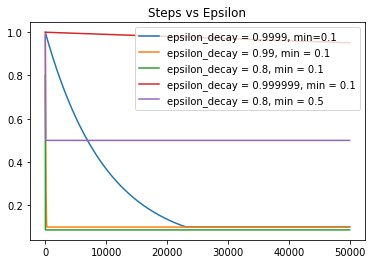

In [322]:
#Q_08_s, epsilon_list_08_s, episode_reward_list_08_s, lr_list_08_s, state_list_08_s, action_list_08_s, delta_error_099_s, v_list_08_s, time_list_08_s
import matplotlib.pyplot as plt
#plt.plot(epsilon_list_09, label = 'epsilon_decay=0.9')
#plt.plot(epsilon_list_099, label = 'epsilon_decay = 0.99')
#plt.plot(epsilon_list_09999_s1[:50000], label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(epsilon_list_09999_s[:50000], label = 'epsilon_decay = 0.9999, min=0.1')
plt.plot(epsilon_list_099_s[:50000], label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(epsilon_list_08_s[:50000], label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(epsilon_list_large_s[:50000], label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(epsilon_list_099_s5[:50000], label = 'epsilon_decay = 0.8, min = 0.5')

#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Epsilon')
plt.legend()

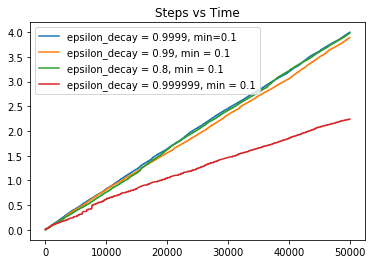

In [330]:
plt.plot(time_list_09999_s[:50000], label = 'epsilon_decay = 0.9999, min=0.1')
plt.plot(time_list_099_s[:50000], label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(time_list_08_s[:50000], label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(time_list_large_s[:50000], label = 'epsilon_decay = 0.999999, min = 0.1')
#plt.plot(epsilon_list_099_s5[:50000], label = 'epsilon_decay = 0.8, min = 0.5')

#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Time')
plt.legend()

In [323]:
max_v_list_099s5 = max_v_list(v_list_099_s5)

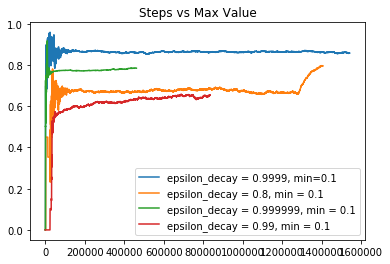

In [335]:
max_v_list_09999s = max_v_list(v_list_09999_s)
max_v_list_099s = max_v_list(v_list_099_s)
max_v_list_08s = max_v_list(v_list_08_s)
max_v_list_09999s1 = max_v_list(v_list_09999_s1)
max_large_list = max_v_list(v_list_large_s)
max_v_list_099s2 = max_v_list(v_list_4)

#plt.plot(max_v_list_09999s1, label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(max_v_list_09999s, label = 'epsilon_decay = 0.9999, min=0.1')
#plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(max_v_list_08s, label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(max_large_list, label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(max_v_list_099s2, label = 'epsilon_decay = 0.99, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Max Value')
plt.legend()

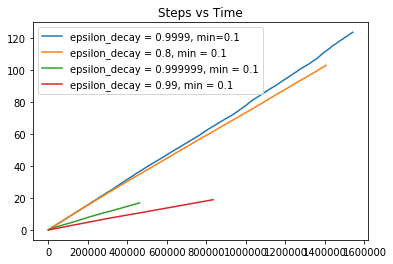

In [342]:
#plt.plot(max_v_list_09999s1, label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(time_list_09999_s, label = 'epsilon_decay = 0.9999, min=0.1')
#plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(time_list_08_s, label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(time_list_large_s, label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(time_list_4, label = 'epsilon_decay = 0.99, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Time')
plt.legend()

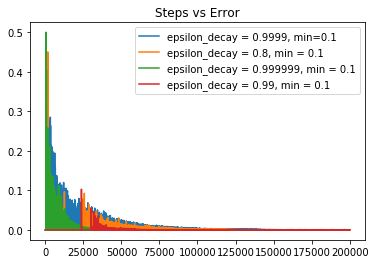

In [344]:
#plt.plot(max_v_list_09999s1, label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(delta_error_09999_s[:200000], label = 'epsilon_decay = 0.9999, min=0.1')
#plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(delta_error_08_s[:200000], label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(delta_error_large_s[:200000], label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(delta_error_4[:200000], label = 'epsilon_decay = 0.99, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Error')
plt.legend()

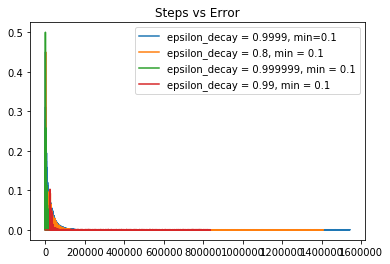

In [345]:
#plt.plot(max_v_list_09999s1, label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(delta_error_09999_s, label = 'epsilon_decay = 0.9999, min=0.1')
#plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(delta_error_08_s, label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(delta_error_large_s, label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(delta_error_4, label = 'epsilon_decay = 0.99, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Error')
plt.legend()

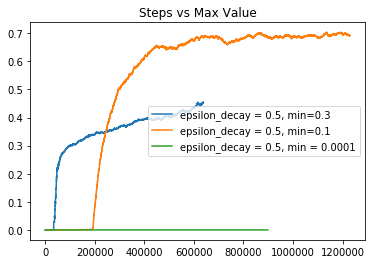

In [329]:
max_v_list_1 = max_v_list(v_list_1)
max_v_list_2 = max_v_list(v_list_2)
max_v_list_3 = max_v_list(v_list_3)



plt.plot(max_v_list_1, label = 'epsilon_decay = 0.5, min=0.3')
plt.plot(max_v_list_2, label = 'epsilon_decay = 0.5, min=0.1')
plt.plot(max_v_list_3, label = 'epsilon_decay = 0.5, min = 0.0001')

plt.title('Steps vs Max Value')
plt.legend()

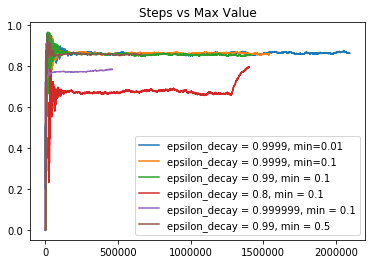

In [324]:
plt.plot(max_v_list_09999s1, label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(max_v_list_09999s, label = 'epsilon_decay = 0.9999, min=0.1')
plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(max_v_list_08s, label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(max_large_list, label = 'epsilon_decay = 0.999999, min = 0.1')
plt.plot(max_v_list_099s5, label = 'epsilon_decay = 0.99, min = 0.5')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Max Value')
plt.legend()

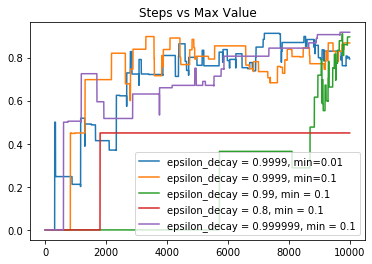

In [314]:
max_v_list_09999s = max_v_list(v_list_09999_s)
max_v_list_099s = max_v_list(v_list_099_s)
max_v_list_08s = max_v_list(v_list_08_s)
max_v_list_09999s1 = max_v_list(v_list_09999_s1)
max_large_list = max_v_list(v_list_large_s)

plt.plot(max_v_list_09999s1[:10000], label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(max_v_list_09999s[:10000], label = 'epsilon_decay = 0.9999, min=0.1')
plt.plot(max_v_list_099s[:10000], label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(max_v_list_08s[:10000], label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(max_large_list[:10000], label = 'epsilon_decay = 0.999999, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Max Value')
plt.legend()

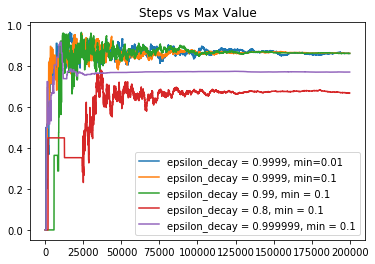

In [318]:
plt.plot(max_v_list_09999s1[:200000], label = 'epsilon_decay = 0.9999, min=0.01')
plt.plot(max_v_list_09999s[:200000], label = 'epsilon_decay = 0.9999, min=0.1')
plt.plot(max_v_list_099s[:200000], label = 'epsilon_decay = 0.99, min = 0.1')
plt.plot(max_v_list_08s[:200000], label = 'epsilon_decay = 0.8, min = 0.1')
plt.plot(max_large_list[:200000], label = 'epsilon_decay = 0.999999, min = 0.1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Max Value')
plt.legend()

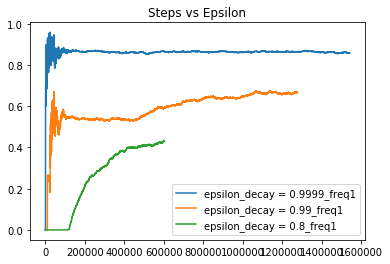

In [256]:
max_v_list_09999s = max_v_list(v_list_09999_s)
max_v_list_099s = max_v_list(v_list_099_s)
max_v_list_08s = max_v_list(v_list_08_s)

plt.plot(max_v_list_09999s, label = 'epsilon_decay = 0.9999_freq1')
plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99_freq1')
plt.plot(max_v_list_08s, label = 'epsilon_decay = 0.8_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Epsilon')
plt.legend()

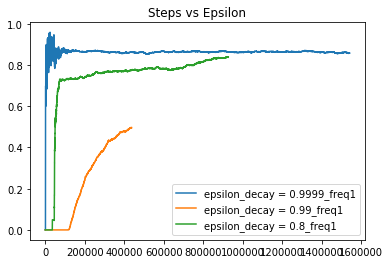

In [291]:
max_v_list_09999s = max_v_list(v_list_09999_s)
max_v_list_099s = max_v_list(v_list_099_s)
max_v_list_08s = max_v_list(v_list_08_s)

plt.plot(max_v_list_09999s, label = 'epsilon_decay = 0.9999_freq1')
plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99_freq1')
plt.plot(max_v_list_08s, label = 'epsilon_decay = 0.8_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Epsilon')
plt.legend()

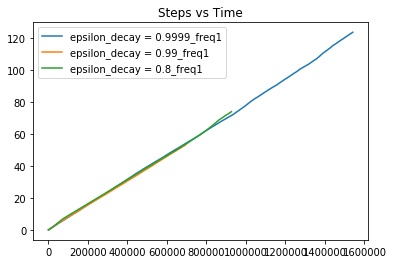

In [266]:

plt.plot(time_list_09999_s, label = 'epsilon_decay = 0.9999_freq1')
plt.plot(time_list_099_s, label = 'epsilon_decay = 0.99_freq1')
plt.plot(time_list_08_s, label = 'epsilon_decay = 0.8_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Time')
plt.legend()

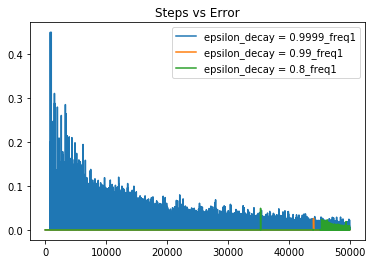

In [262]:
#Q_08_s, epsilon_list_08_s, episode_reward_list_08_s, lr_list_08_s, state_list_08_s, action_list_08_s, delta_error_099_s, v_list_08_s, time_list_08_s
import matplotlib.pyplot as plt
#plt.plot(epsilon_list_09, label = 'epsilon_decay=0.9')
#plt.plot(epsilon_list_099, label = 'epsilon_decay = 0.99')
plt.plot(delta_error_09999_s[:50000], label = 'epsilon_decay = 0.9999_freq1')
plt.plot(delta_error_099_s[:50000], label = 'epsilon_decay = 0.99_freq1')
plt.plot(delta_error_08_s[:50000], label = 'epsilon_decay = 0.8_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Error')
plt.legend()

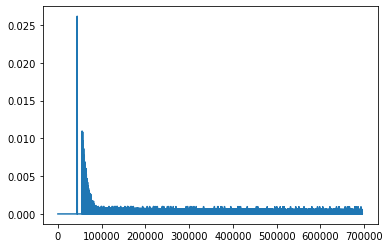

In [264]:
plt.plot(delta_error_099_s, label = 'epsilon_decay = 0.99_freq1')

In [115]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_099, epsilon_list_099, episode_reward_list_099, lr_list_099, state_list_099, action_list_099, delta_error_099, v_list_099, time_list_099 = qlearning()

episode is 100 with episode reward as 0.0
0.99
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 200 with episode reward as 0.01
0.9801
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 300 with episode reward as 0.02
0.9702989999999999
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 400 with episode reward as 0.02
0.96059601
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 500 with episode reward as 0.02
0.9509900498999999
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 600 with episode reward as 0.01
0.9414801494009999
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 700 with episode reward as 0.01
0.9320653479069899
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 800 with episode reward as 0.0
0.92274469442792
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 900 with episode reward as 0.05
0.9135172474836407
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1000 with 

episode is 7500 with episode reward as 0.09
0.47058664158564995
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 7600 with episode reward as 0.11
0.4658807751697934
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7700 with episode reward as 0.12
0.4612219674180955
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 7800 with episode reward as 0.04
0.45660974774391455
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7900 with episode reward as 0.06
0.4520436502664754
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 8000 with episode reward as 0.13
0.44752321376381066
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 8100 with episode reward as 0.07
0.44304798162617254
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 8200 with episode reward as 0.11
0.4386175018099108
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8300 with episode reward as 0.1
0.4342313267918117
[0.0, 0.0, 0.0, 0.0, 0

episode is 14700 with episode reward as 0.22
0.22823046013534068
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 14800 with episode reward as 0.17
0.22594815553398728
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 14900 with episode reward as 0.21
0.22368867397864742
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 15000 with episode reward as 0.25
0.22145178723886094
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 15100 with episode reward as 0.18
0.21923726936647234
[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 15200 with episode reward as 0.25
0.2170448966728076
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 15300 with episode reward as 0.23
0.21487444770607952
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 15400 with episode reward as 0.25
0.21272570322901874
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 15500 with episode reward as 0.24
0.21059844619672854
[0.0, 0.

episode is 21800 with episode reward as 0.35
0.1118078824235774
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 21900 with episode reward as 0.35
0.11068980359934164
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 22000 with episode reward as 0.31
0.10958290556334822
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 22100 with episode reward as 0.39
0.10848707650771475
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 22200 with episode reward as 0.39
0.1074022057426376
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 22300 with episode reward as 0.36
0.10632818368521123
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 22400 with episode reward as 0.38
0.10526490184835911
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 22500 with episode reward as 0.39
0.10421225282987552
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 22600 with episode reward as 0.44
0.10317013030157676
[0.0, 1.0

episode is 28900 with episode reward as 0.39
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 29000 with episode reward as 0.47
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 29100 with episode reward as 0.35
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 29200 with episode reward as 0.48
0.09910481551887473
[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 29300 with episode reward as 0.42
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 29400 with episode reward as 0.38
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 29500 with episode reward as 0.37
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 29600 with episode reward as 0.37
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 29700 with episode reward as 0.35
0.09910481551887473
[0.0, 0

episode is 36000 with episode reward as 0.44
0.09910481551887473
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 36100 with episode reward as 0.35
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 36200 with episode reward as 0.44
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 36300 with episode reward as 0.44
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 36400 with episode reward as 0.48
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 36500 with episode reward as 0.41
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 36600 with episode reward as 0.43
0.09910481551887473
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 36700 with episode reward as 0.49
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 36800 with episode reward as 0.45
0.09910481551887473
[0.0, 0

episode is 43200 with episode reward as 0.42
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 43300 with episode reward as 0.49
0.09910481551887473
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 43400 with episode reward as 0.39
0.09910481551887473
[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 43500 with episode reward as 0.34
0.09910481551887473
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 43600 with episode reward as 0.44
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 43700 with episode reward as 0.37
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 43800 with episode reward as 0.44
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 43900 with episode reward as 0.43
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 44000 with episode reward as 0.4
0.09910481551887473
[1.0, 0.

episode is 50300 with episode reward as 0.4
0.09910481551887473
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 50400 with episode reward as 0.38
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 50500 with episode reward as 0.37
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 50600 with episode reward as 0.44
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 50700 with episode reward as 0.42
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 50800 with episode reward as 0.4
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 50900 with episode reward as 0.42
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 51000 with episode reward as 0.42
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 51100 with episode reward as 0.44
0.09910481551887473
[0.0, 0.0

episode is 57500 with episode reward as 0.36
0.09910481551887473
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 57600 with episode reward as 0.42
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 57700 with episode reward as 0.34
0.09910481551887473
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 57800 with episode reward as 0.49
0.09910481551887473
[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 57900 with episode reward as 0.38
0.09910481551887473
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 58000 with episode reward as 0.37
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 58100 with episode reward as 0.39
0.09910481551887473
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 58200 with episode reward as 0.43
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 58300 with episode reward as 0.36
0.09910481551887473
[1.0, 1

episode is 64700 with episode reward as 0.4
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 64800 with episode reward as 0.3
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 64900 with episode reward as 0.46
0.09910481551887473
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 65000 with episode reward as 0.41
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
episode is 65100 with episode reward as 0.43
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 65200 with episode reward as 0.38
0.09910481551887473
[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 65300 with episode reward as 0.43
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 65400 with episode reward as 0.41
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 65500 with episode reward as 0.49
0.09910481551887473
[1.0, 1.0

episode is 71800 with episode reward as 0.34
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 71900 with episode reward as 0.42
0.09910481551887473
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 72000 with episode reward as 0.43
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 72100 with episode reward as 0.37
0.09910481551887473
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 72200 with episode reward as 0.45
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 72300 with episode reward as 0.45
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 72400 with episode reward as 0.37
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 72500 with episode reward as 0.51
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 72600 with episode reward as 0.39
0.09910481551887473
[1.0, 0

episode is 79000 with episode reward as 0.51
0.09910481551887473
[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 79100 with episode reward as 0.34
0.09910481551887473
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 79200 with episode reward as 0.41
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 79300 with episode reward as 0.47
0.09910481551887473
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 79400 with episode reward as 0.37
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 79500 with episode reward as 0.4
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 79600 with episode reward as 0.33
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 79700 with episode reward as 0.4
0.09910481551887473
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 79800 with episode reward as 0.44
0.09910481551887473
[0.0, 1.0

episode is 86200 with episode reward as 0.36
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 86300 with episode reward as 0.4
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 86400 with episode reward as 0.45
0.09910481551887473
[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 86500 with episode reward as 0.47
0.09910481551887473
[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 86600 with episode reward as 0.43
0.09910481551887473
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 86700 with episode reward as 0.35
0.09910481551887473
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 86800 with episode reward as 0.43
0.09910481551887473
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 86900 with episode reward as 0.39
0.09910481551887473
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 87000 with episode reward as 0.46
0.09910481551887473
[0.0, 0.

episode is 93400 with episode reward as 0.4
0.09910481551887473
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 93500 with episode reward as 0.29
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 93600 with episode reward as 0.46
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 93700 with episode reward as 0.4
0.09910481551887473
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 93800 with episode reward as 0.47
0.09910481551887473
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 93900 with episode reward as 0.38
0.09910481551887473
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 94000 with episode reward as 0.28
0.09910481551887473
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 94100 with episode reward as 0.4
0.09910481551887473
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 94200 with episode reward as 0.42
0.09910481551887473
[0.0, 1.0,

In [189]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_099_s, epsilon_list_099_s, episode_reward_list_099_s, lr_list_099_s, state_list_099_s, action_list_099_s, delta_error_099_s, v_list_099_s, time_list_099_s = qlearning()

episode is 100 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 200 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 300 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 400 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 500 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 600 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 700 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 800 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 900 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1000 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1100 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 

episode is 8800 with episode reward as 0.14
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8900 with episode reward as 0.22
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 9000 with episode reward as 0.29
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 9100 with episode reward as 0.22
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 9200 with episode reward as 0.24
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 9300 with episode reward as 0.26
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 9400 with episode reward as 0.21
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 9500 with episode reward as 0.2
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 9600 with episode reward as 0.24
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 9700 with episode reward as 0.17
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 9800 with episode reward as 0.21
[0.0, 0

episode is 17400 with episode reward as 0.23
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 17500 with episode reward as 0.24
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 17600 with episode reward as 0.17
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 17700 with episode reward as 0.21
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 17800 with episode reward as 0.21
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 17900 with episode reward as 0.25
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 18000 with episode reward as 0.25
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 18100 with episode reward as 0.19
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 18200 with episode reward as 0.29
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 18300 with episode reward as 0.22
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 18400 with episode reward as 

episode is 26300 with episode reward as 0.22
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 26400 with episode reward as 0.25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 26500 with episode reward as 0.24
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 26600 with episode reward as 0.2
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 26700 with episode reward as 0.24
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 26800 with episode reward as 0.16
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 26900 with episode reward as 0.19
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 27000 with episode reward as 0.33
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 27100 with episode reward as 0.11
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 27200 with episode reward as 0.25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 27300 with episode reward as 0

episode is 35100 with episode reward as 0.35
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 35200 with episode reward as 0.31
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 35300 with episode reward as 0.31
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 35400 with episode reward as 0.43
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 35500 with episode reward as 0.37
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 35600 with episode reward as 0.4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
episode is 35700 with episode reward as 0.28
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 35800 with episode reward as 0.36
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 35900 with episode reward as 0.37
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 36000 with episode reward as 0.34
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 36100 with episode reward as 0

episode is 43900 with episode reward as 0.35
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 44000 with episode reward as 0.38
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 44100 with episode reward as 0.33
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 44200 with episode reward as 0.46
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 44300 with episode reward as 0.41
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 44400 with episode reward as 0.36
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 44500 with episode reward as 0.44
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 44600 with episode reward as 0.35
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 44700 with episode reward as 0.38
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 44800 with episode reward as 0.37
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 44900 with episode reward as 

episode is 52500 with episode reward as 0.29
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 52600 with episode reward as 0.36
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 52700 with episode reward as 0.43
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 52800 with episode reward as 0.39
[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 52900 with episode reward as 0.43
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 53000 with episode reward as 0.37
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 53100 with episode reward as 0.31
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 53200 with episode reward as 0.46
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 53300 with episode reward as 0.36
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 53400 with episode reward as 0.42
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 53500 with episode reward as 

episode is 61300 with episode reward as 0.35
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 61400 with episode reward as 0.36
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 61500 with episode reward as 0.4
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 61600 with episode reward as 0.42
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
episode is 61700 with episode reward as 0.34
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 61800 with episode reward as 0.43
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 61900 with episode reward as 0.42
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 62000 with episode reward as 0.33
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 62100 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 62200 with episode reward as 0.28
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 62300 with episode reward as 0

episode is 70000 with episode reward as 0.36
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 70100 with episode reward as 0.42
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 70200 with episode reward as 0.38
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 70300 with episode reward as 0.4
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 70400 with episode reward as 0.37
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 70500 with episode reward as 0.37
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 70600 with episode reward as 0.36
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 70700 with episode reward as 0.37
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 70800 with episode reward as 0.49
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 70900 with episode reward as 0.39
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 71000 with episode reward as 0

episode is 78600 with episode reward as 0.38
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 78700 with episode reward as 0.42
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 78800 with episode reward as 0.45
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 78900 with episode reward as 0.41
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 79000 with episode reward as 0.42
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 79100 with episode reward as 0.42
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 79200 with episode reward as 0.37
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 79300 with episode reward as 0.41
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 79400 with episode reward as 0.36
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 79500 with episode reward as 0.4
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 79600 with episode reward as 0

episode is 87300 with episode reward as 0.37
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 87400 with episode reward as 0.33
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 87500 with episode reward as 0.3
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 87600 with episode reward as 0.37
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 87700 with episode reward as 0.34
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 87800 with episode reward as 0.28
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 87900 with episode reward as 0.43
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 88000 with episode reward as 0.37
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 88100 with episode reward as 0.31
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 88200 with episode reward as 0.36
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 88300 with episode reward as 0

episode is 96000 with episode reward as 0.31
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 96100 with episode reward as 0.42
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 96200 with episode reward as 0.36
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 96300 with episode reward as 0.37
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 96400 with episode reward as 0.43
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 96500 with episode reward as 0.36
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 96600 with episode reward as 0.41
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 96700 with episode reward as 0.32
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 96800 with episode reward as 0.28
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 96900 with episode reward as 0.34
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 97000 with episode reward as 

In [205]:
# these are 0.9 for lr decay , 0.99 for epsilon decay actually 
Q_09999_s, epsilon_list_09999_s, episode_reward_list_09999_s, lr_list_09999_s, state_list_09999_s, action_list_09999_s, delta_error_09999_s, v_list_09999_s, time_list_09999_s = qlearning()

episode is 100 with episode reward as 0.03
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 200 with episode reward as 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 300 with episode reward as 0.02
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 400 with episode reward as 0.03
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 500 with episode reward as 0.04
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 600 with episode reward as 0.03
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 700 with episode reward as 0.08
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 800 with episode reward as 0.07
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 900 with episode reward as 0.06
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 1000 with episode reward as 0.18
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 1100 with episode reward as 0.14
[0.0, 0.0, 1.0, 

episode is 8800 with episode reward as 0.37
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8900 with episode reward as 0.44
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 9000 with episode reward as 0.44
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 9100 with episode reward as 0.4
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 9200 with episode reward as 0.41
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 9300 with episode reward as 0.42
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 9400 with episode reward as 0.4
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 9500 with episode reward as 0.38
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 9600 with episode reward as 0.37
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 9700 with episode reward as 0.42
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 9800 with episode reward as 0.42
[0.0, 1.

episode is 17600 with episode reward as 0.46
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 17700 with episode reward as 0.49
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 17800 with episode reward as 0.4
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 17900 with episode reward as 0.41
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 18000 with episode reward as 0.44
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 18100 with episode reward as 0.41
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 18200 with episode reward as 0.38
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 18300 with episode reward as 0.43
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 18400 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 18500 with episode reward as 0.43
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 18600 with episode reward as 0

episode is 26500 with episode reward as 0.46
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 26600 with episode reward as 0.45
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 26700 with episode reward as 0.36
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 26800 with episode reward as 0.51
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 26900 with episode reward as 0.47
[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 27000 with episode reward as 0.44
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 27100 with episode reward as 0.46
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 27200 with episode reward as 0.34
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 27300 with episode reward as 0.44
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 27400 with episode reward as 0.49
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 27500 with episode reward as 

episode is 35200 with episode reward as 0.43
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 35300 with episode reward as 0.43
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 35400 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 35500 with episode reward as 0.38
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 35600 with episode reward as 0.5
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 35700 with episode reward as 0.51
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 35800 with episode reward as 0.4
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 35900 with episode reward as 0.36
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 36000 with episode reward as 0.42
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 36100 with episode reward as 0.35
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 36200 with episode reward as 0.

episode is 43800 with episode reward as 0.42
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 43900 with episode reward as 0.38
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 44000 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 44100 with episode reward as 0.37
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 44200 with episode reward as 0.45
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 44300 with episode reward as 0.41
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 44400 with episode reward as 0.42
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 44500 with episode reward as 0.37
[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 44600 with episode reward as 0.45
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 44700 with episode reward as 0.36
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 44800 with episode reward as 

episode is 52400 with episode reward as 0.44
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 52500 with episode reward as 0.42
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 52600 with episode reward as 0.4
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
episode is 52700 with episode reward as 0.4
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 52800 with episode reward as 0.4
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 52900 with episode reward as 0.4
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 53000 with episode reward as 0.39
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 53100 with episode reward as 0.33
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 53200 with episode reward as 0.41
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 53300 with episode reward as 0.44
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 53400 with episode reward as 0.49

episode is 61300 with episode reward as 0.39
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 61400 with episode reward as 0.44
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 61500 with episode reward as 0.4
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 61600 with episode reward as 0.38
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 61700 with episode reward as 0.62
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
episode is 61800 with episode reward as 0.47
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 61900 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 62000 with episode reward as 0.39
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 62100 with episode reward as 0.45
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 62200 with episode reward as 0.46
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 62300 with episode reward as 0

episode is 70100 with episode reward as 0.42
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 70200 with episode reward as 0.43
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 70300 with episode reward as 0.5
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 70400 with episode reward as 0.46
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 70500 with episode reward as 0.4
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 70600 with episode reward as 0.44
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 70700 with episode reward as 0.49
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 70800 with episode reward as 0.47
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 70900 with episode reward as 0.44
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 71000 with episode reward as 0.38
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 71100 with episode reward as 0.

episode is 78800 with episode reward as 0.37
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 78900 with episode reward as 0.44
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 79000 with episode reward as 0.39
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 79100 with episode reward as 0.48
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 79200 with episode reward as 0.41
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 79300 with episode reward as 0.4
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 79400 with episode reward as 0.44
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 79500 with episode reward as 0.42
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
episode is 79600 with episode reward as 0.51
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 79700 with episode reward as 0.32
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 79800 with episode reward as 0

episode is 87500 with episode reward as 0.47
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 87600 with episode reward as 0.41
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 87700 with episode reward as 0.4
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 87800 with episode reward as 0.44
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 87900 with episode reward as 0.36
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
episode is 88000 with episode reward as 0.37
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 88100 with episode reward as 0.32
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 88200 with episode reward as 0.39
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 88300 with episode reward as 0.51
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
episode is 88400 with episode reward as 0.41
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 88500 with episode reward as 0

episode is 96200 with episode reward as 0.44
[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 96300 with episode reward as 0.38
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 96400 with episode reward as 0.37
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
episode is 96500 with episode reward as 0.43
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 96600 with episode reward as 0.46
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 96700 with episode reward as 0.43
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 96800 with episode reward as 0.43
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 96900 with episode reward as 0.45
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 97000 with episode reward as 0.37
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 97100 with episode reward as 0.33
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 97200 with episode reward as 

In [128]:
Q_09, epsilon_list_09, episode_reward_list_09, lr_list_09, state_list_09, action_list_09, delta_error_09, v_list_09, time_list_09 = qlearning()

episode is 100 with episode reward as 0.03
0.9
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 200 with episode reward as 0.01
0.81
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 300 with episode reward as 0.01
0.7290000000000001
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 400 with episode reward as 0.02
0.6561000000000001
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 500 with episode reward as 0.06
0.5904900000000002
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 600 with episode reward as 0.04
0.5314410000000002
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 700 with episode reward as 0.07
0.47829690000000014
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 800 with episode reward as 0.06
0.43046721000000016
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 900 with episode reward as 0.15
0.38742048900000015
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode i

episode is 7400 with episode reward as 0.42
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7500 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 7600 with episode reward as 0.45
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 7700 with episode reward as 0.33
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 7800 with episode reward as 0.35
0.0984770902183612
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 7900 with episode reward as 0.41
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
episode is 8000 with episode reward as 0.46
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 8100 with episode reward as 0.44
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 8200 with episode reward as 0.38
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0,

episode is 14700 with episode reward as 0.43
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 14800 with episode reward as 0.47
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 14900 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 15000 with episode reward as 0.44
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 15100 with episode reward as 0.36
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
episode is 15200 with episode reward as 0.41
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 15300 with episode reward as 0.41
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 15400 with episode reward as 0.45
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 15500 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 

episode is 21900 with episode reward as 0.37
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 22000 with episode reward as 0.35
0.0984770902183612
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 22100 with episode reward as 0.34
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 22200 with episode reward as 0.32
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 22300 with episode reward as 0.51
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 22400 with episode reward as 0.41
0.0984770902183612
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 22500 with episode reward as 0.26
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 22600 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 22700 with episode reward as 0.35
0.0984770902183612
[0.0, 1.0, 0.0, 

episode is 29300 with episode reward as 0.44
0.0984770902183612
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 29400 with episode reward as 0.38
0.0984770902183612
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 29500 with episode reward as 0.44
0.0984770902183612
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 29600 with episode reward as 0.46
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 29700 with episode reward as 0.39
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 29800 with episode reward as 0.42
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 29900 with episode reward as 0.45
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 30000 with episode reward as 0.43
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 30100 with episode reward as 0.52
0.0984770902183612
[0.0, 1.0, 0.0, 

episode is 36500 with episode reward as 0.42
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 36600 with episode reward as 0.45
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 36700 with episode reward as 0.38
0.0984770902183612
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
episode is 36800 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 36900 with episode reward as 0.47
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
episode is 37000 with episode reward as 0.38
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 37100 with episode reward as 0.34
0.0984770902183612
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 37200 with episode reward as 0.37
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 37300 with episode reward as 0.39
0.0984770902183612
[0.0, 1.0, 0.0, 

episode is 43700 with episode reward as 0.46
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 43800 with episode reward as 0.45
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 43900 with episode reward as 0.37
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 44000 with episode reward as 0.38
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 44100 with episode reward as 0.4
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 44200 with episode reward as 0.39
0.0984770902183612
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 44300 with episode reward as 0.38
0.0984770902183612
[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 44400 with episode reward as 0.34
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 44500 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 0

episode is 50900 with episode reward as 0.43
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 51000 with episode reward as 0.45
0.0984770902183612
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 51100 with episode reward as 0.38
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 51200 with episode reward as 0.43
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 51300 with episode reward as 0.38
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 51400 with episode reward as 0.48
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 51500 with episode reward as 0.41
0.0984770902183612
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 51600 with episode reward as 0.44
0.0984770902183612
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 51700 with episode reward as 0.32
0.0984770902183612
[0.0, 1.0, 0.0, 

episode is 58200 with episode reward as 0.45
0.0984770902183612
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 58300 with episode reward as 0.39
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 58400 with episode reward as 0.43
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 58500 with episode reward as 0.42
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 58600 with episode reward as 0.44
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 58700 with episode reward as 0.39
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 58800 with episode reward as 0.47
0.0984770902183612
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 58900 with episode reward as 0.41
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 59000 with episode reward as 0.43
0.0984770902183612
[1.0, 1.0, 0.0, 

episode is 65500 with episode reward as 0.39
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 65600 with episode reward as 0.48
0.0984770902183612
[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 65700 with episode reward as 0.46
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 65800 with episode reward as 0.47
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
episode is 65900 with episode reward as 0.47
0.0984770902183612
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 66000 with episode reward as 0.42
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 66100 with episode reward as 0.43
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 66200 with episode reward as 0.36
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 66300 with episode reward as 0.44
0.0984770902183612
[1.0, 0.0, 0.0, 

episode is 72700 with episode reward as 0.4
0.0984770902183612
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 72800 with episode reward as 0.41
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
episode is 72900 with episode reward as 0.43
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 73000 with episode reward as 0.4
0.0984770902183612
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 73100 with episode reward as 0.42
0.0984770902183612
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
episode is 73200 with episode reward as 0.49
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 73300 with episode reward as 0.35
0.0984770902183612
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 73400 with episode reward as 0.47
0.0984770902183612
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 73500 with episode reward as 0.32
0.0984770902183612
[0.0, 0.0, 1.0, 0.

episode is 80100 with episode reward as 0.31
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 80200 with episode reward as 0.44
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 80300 with episode reward as 0.42
0.0984770902183612
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 80400 with episode reward as 0.46
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
episode is 80500 with episode reward as 0.38
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0]
episode is 80600 with episode reward as 0.33
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 80700 with episode reward as 0.47
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 80800 with episode reward as 0.39
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
episode is 80900 with episode reward as 0.4
0.0984770902183612
[0.0, 0.0, 1.0, 1

episode is 87300 with episode reward as 0.46
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 87400 with episode reward as 0.39
0.0984770902183612
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 87500 with episode reward as 0.37
0.0984770902183612
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 87600 with episode reward as 0.39
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 87700 with episode reward as 0.37
0.0984770902183612
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 87800 with episode reward as 0.42
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 87900 with episode reward as 0.36
0.0984770902183612
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 88000 with episode reward as 0.47
0.0984770902183612
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 88100 with episode reward as 0.37
0.0984770902183612
[0.0, 0.0, 1.0, 

episode is 94500 with episode reward as 0.47
0.0984770902183612
[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 94600 with episode reward as 0.44
0.0984770902183612
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]
episode is 94700 with episode reward as 0.28
0.0984770902183612
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 94800 with episode reward as 0.39
0.0984770902183612
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 94900 with episode reward as 0.42
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
episode is 95000 with episode reward as 0.34
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 95100 with episode reward as 0.37
0.0984770902183612
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 95200 with episode reward as 0.45
0.0984770902183612
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 95300 with episode reward as 0.46
0.0984770902183612
[0.0, 0.0, 1.0, 

In [170]:
Q_08, epsilon_list_08, episode_reward_list_08, lr_list_08, state_list_08, action_list_08, delta_error_08, v_list_08, time_list_08 = qlearning()

episode is 100 with episode reward as 0.01
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.8
episode is 200 with episode reward as 0.03
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.6400000000000001
episode is 300 with episode reward as 0.02
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.5120000000000001
episode is 400 with episode reward as 0.01
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.40960000000000013
episode is 500 with episode reward as 0.04
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.32768000000000014
episode is 600 with episode reward as 0.07
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.2621440000000001
episode is 700 with episode reward as 0.18
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
0.2097152000000001
episode is 800 with episode reward as 0.21
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.1677721600000001
episode is 900 with episode reward as 0.28
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.1342177280000

episode is 7600 with episode reward as 0.46
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 7700 with episode reward as 0.4
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 7800 with episode reward as 0.39
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 7900 with episode reward as 0.37
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 8000 with episode reward as 0.44
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 8100 with episode reward as 0.41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 8200 with episode reward as 0.5
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 8300 with episode reward as 0.41
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 8400 with episode reward as 0.51
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.

episode is 14700 with episode reward as 0.37
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 14800 with episode reward as 0.42
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 14900 with episode reward as 0.45
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 15000 with episode reward as 0.48
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 15100 with episode reward as 0.48
[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 15200 with episode reward as 0.4
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 15300 with episode reward as 0.42
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 15400 with episode reward as 0.5
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 15500 with episode reward as 0.41
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0

episode is 21800 with episode reward as 0.39
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 21900 with episode reward as 0.4
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 22000 with episode reward as 0.47
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 22100 with episode reward as 0.41
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 22200 with episode reward as 0.38
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 22300 with episode reward as 0.45
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 22400 with episode reward as 0.46
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 22500 with episode reward as 0.37
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 22600 with episode reward as 0.4
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0

episode is 29100 with episode reward as 0.44
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 29200 with episode reward as 0.44
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 29300 with episode reward as 0.51
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 29400 with episode reward as 0.43
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 29500 with episode reward as 0.41
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 29600 with episode reward as 0.39
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 29700 with episode reward as 0.35
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 29800 with episode reward as 0.42
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 29900 with episode reward as 0.5
[0.0, 0.0, 1.0, 1.0, 1.0, 0.

episode is 36200 with episode reward as 0.31
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 36300 with episode reward as 0.42
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 36400 with episode reward as 0.47
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 36500 with episode reward as 0.42
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 36600 with episode reward as 0.36
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 36700 with episode reward as 0.55
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 36800 with episode reward as 0.51
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 36900 with episode reward as 0.38
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 37000 with episode reward as 0.49
[0.0, 0.0, 0.0, 0.0, 0.0, 0

episode is 43400 with episode reward as 0.41
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 43500 with episode reward as 0.47
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 43600 with episode reward as 0.53
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 43700 with episode reward as 0.45
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 43800 with episode reward as 0.4
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 43900 with episode reward as 0.39
[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 44000 with episode reward as 0.4
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 44100 with episode reward as 0.56
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 44200 with episode reward as 0.44
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0

episode is 50500 with episode reward as 0.38
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 50600 with episode reward as 0.43
[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 50700 with episode reward as 0.36
[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 50800 with episode reward as 0.45
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 50900 with episode reward as 0.41
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 51000 with episode reward as 0.53
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 51100 with episode reward as 0.48
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 51200 with episode reward as 0.47
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 51300 with episode reward as 0.4
[0.0, 0.0, 0.0, 0.0, 0.0, 1.

episode is 57700 with episode reward as 0.39
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 57800 with episode reward as 0.44
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 57900 with episode reward as 0.45
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 58000 with episode reward as 0.45
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 58100 with episode reward as 0.51
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 58200 with episode reward as 0.45
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 58300 with episode reward as 0.47
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 58400 with episode reward as 0.4
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 58500 with episode reward as 0.52
[1.0, 1.0, 0.0, 1.0, 1.0, 1.

episode is 64800 with episode reward as 0.45
[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 64900 with episode reward as 0.43
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 65000 with episode reward as 0.43
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 65100 with episode reward as 0.42
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 65200 with episode reward as 0.5
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 65300 with episode reward as 0.48
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 65400 with episode reward as 0.46
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 65500 with episode reward as 0.46
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 65600 with episode reward as 0.43
[0.0, 0.0, 0.0, 1.0, 1.0, 1.

episode is 71900 with episode reward as 0.42
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 72000 with episode reward as 0.41
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 72100 with episode reward as 0.42
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 72200 with episode reward as 0.52
[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 72300 with episode reward as 0.38
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 72400 with episode reward as 0.44
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 72500 with episode reward as 0.45
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 72600 with episode reward as 0.45
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 72700 with episode reward as 0.45
[0.0, 1.0, 1.0, 0.0, 0.0, 1

episode is 79000 with episode reward as 0.32
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 79100 with episode reward as 0.43
[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 79200 with episode reward as 0.42
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 79300 with episode reward as 0.43
[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 79400 with episode reward as 0.46
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 79500 with episode reward as 0.48
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 79600 with episode reward as 0.39
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 79700 with episode reward as 0.47
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 79800 with episode reward as 0.41
[0.0, 0.0, 0.0, 1.0, 1.0, 0

episode is 86100 with episode reward as 0.41
[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 86200 with episode reward as 0.5
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 86300 with episode reward as 0.42
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 86400 with episode reward as 0.47
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
0.08589934592000005
episode is 86500 with episode reward as 0.51
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 86600 with episode reward as 0.47
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 86700 with episode reward as 0.47
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 86800 with episode reward as 0.37
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
0.08589934592000005
episode is 86900 with episode reward as 0.42
[1.0, 0.0, 0.0, 1.0, 1.0, 1.

episode is 93400 with episode reward as 0.49
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
0.08589934592000005
episode is 93500 with episode reward as 0.44
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
0.08589934592000005
episode is 93600 with episode reward as 0.47
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 93700 with episode reward as 0.41
[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 93800 with episode reward as 0.47
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.08589934592000005
episode is 93900 with episode reward as 0.39
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
0.08589934592000005
episode is 94000 with episode reward as 0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
0.08589934592000005
episode is 94100 with episode reward as 0.46
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
0.08589934592000005
episode is 94200 with episode reward as 0.4
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

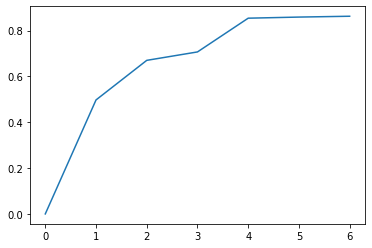

In [139]:
plt.plot(value_list)

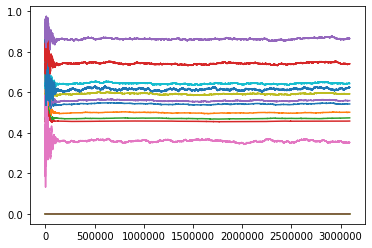

In [135]:
plt.plot(v_list_09)

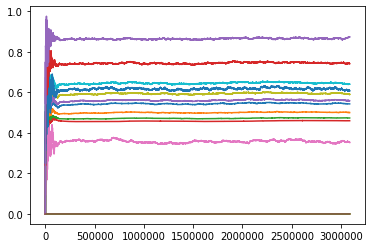

In [210]:
plt.plot(v_list_09999_s)

In [ ]:
plt.plot(v_list_09)

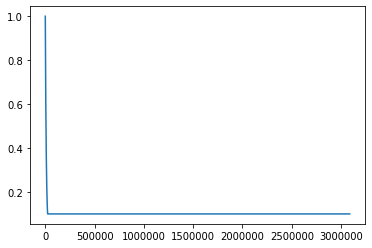

In [206]:
plt.plot(epsilon_list_099_s, label = 'epsilon_decay = 0.99_freq1')

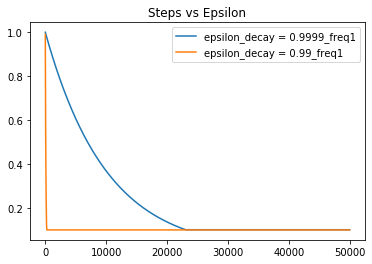

In [232]:
import matplotlib.pyplot as plt
#plt.plot(epsilon_list_09, label = 'epsilon_decay=0.9')
#plt.plot(epsilon_list_099, label = 'epsilon_decay = 0.99')
plt.plot(epsilon_list_09999_s[:50000], label = 'epsilon_decay = 0.9999_freq1')
plt.plot(epsilon_list_099_s[:50000], label = 'epsilon_decay = 0.99_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Epsilon')
plt.legend()

In [252]:
def max_v_list(input):
    return [max(input[i]) for i in range(len(input))]

In [237]:
v_list_099_s

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.

In [233]:
max_v_list_09999s = max_v_list(v_list_09999_s)
max_v_list_099s = max_v_list(v_list_099_s)

In [234]:
max_v_list_099s = max_v_list(v_list_099_s)

In [238]:
max_v_list_099s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

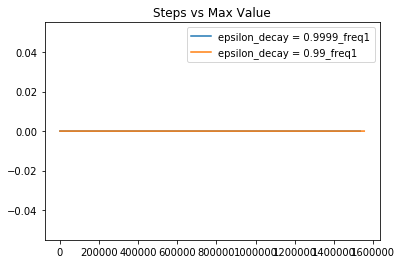

In [235]:
import matplotlib.pyplot as plt
#plt.plot(epsilon_list_09, label = 'epsilon_decay=0.9')
#plt.plot(epsilon_list_099, label = 'epsilon_decay = 0.99')
plt.plot(max_v_list_09999s, label = 'epsilon_decay = 0.9999_freq1')
plt.plot(max_v_list_099s, label = 'epsilon_decay = 0.99_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Steps vs Max Value')
plt.legend()

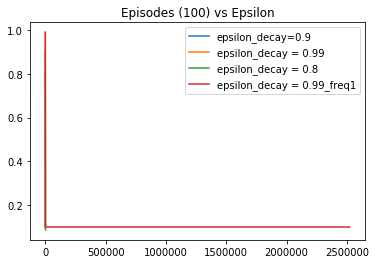

In [191]:
import matplotlib.pyplot as plt
plt.plot(epsilon_list_09, label = 'epsilon_decay=0.9')
plt.plot(epsilon_list_099, label = 'epsilon_decay = 0.99')
plt.plot(epsilon_list_08, label = 'epsilon_decay = 0.8')
plt.plot(epsilon_list_099_s, label = 'epsilon_decay = 0.99_freq1')
#plt.xlabel('Iterations')
#plt.ylabel('Value')
plt.title('Episodes (100) vs Epsilon')
plt.legend()

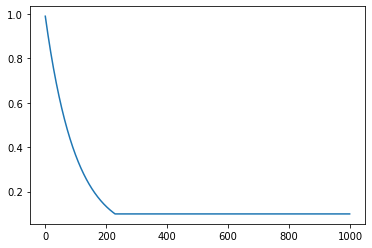

In [194]:
plt.plot(epsilon_list_099_s[:1000])

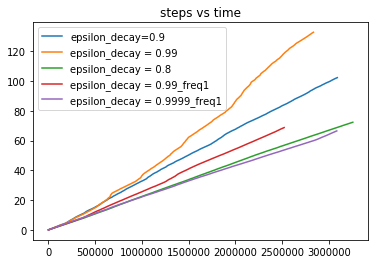

In [207]:
plt.plot(time_list_09, label = 'epsilon_decay=0.9')
plt.plot(time_list_099, label = 'epsilon_decay = 0.99')
plt.plot(time_list_08, label = 'epsilon_decay = 0.8')
plt.plot(time_list_099_s, label = 'epsilon_decay = 0.99_freq1')
plt.plot(time_list_09999_s, label = 'epsilon_decay = 0.9999_freq1')
plt.legend()
plt.title('steps vs time')
plt.xlabel = 'episode * 100'
plt.ylabel = 'epsilon'

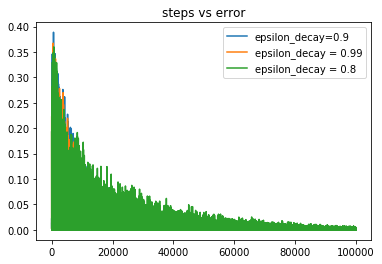

In [173]:
plt.plot(delta_error_09[:100000], label = 'epsilon_decay=0.9')
plt.plot(delta_error_099[:100000], label = 'epsilon_decay = 0.99')
plt.plot(delta_error_08[:100000], label = 'epsilon_decay = 0.8')
plt.legend()
plt.title('steps vs error')
plt.xlabel = 'step'
plt.ylabel = 'error'

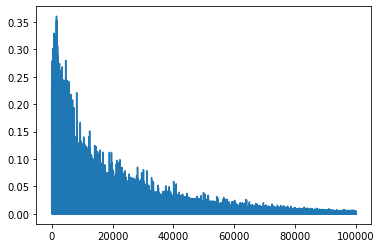

In [165]:
plt.plot(delta_error_08[:100000], label = 'epsilon_decay=0.9')

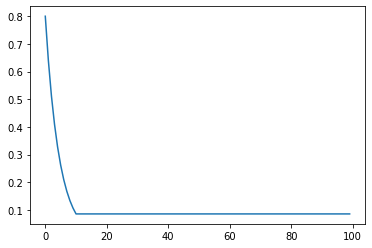

In [144]:
plt.plot(epsilon_list_08[:100], label = 'epsilon_decay = 0.8')

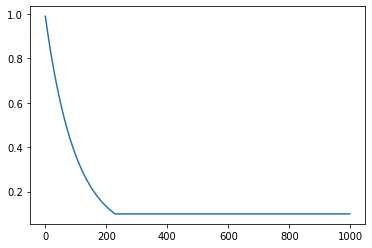

In [42]:
plt.plot(epsilon_list)

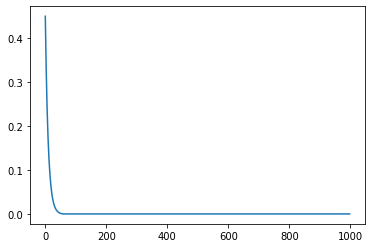

In [117]:
plt.plot(lr_list_099)

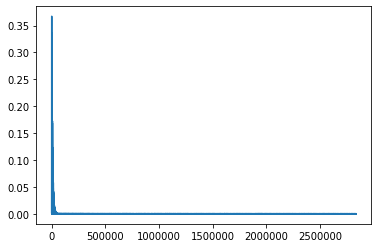

In [118]:
plt.plot([np.abs(i) for i in delta_error_099])

In [53]:
500000/50

10000.0

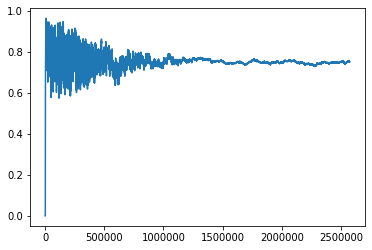

In [49]:
plt.plot([np.max(v_list[i]) for i in range(len(v_list))])

In [47]:
np.max(v_list[0])

0.0

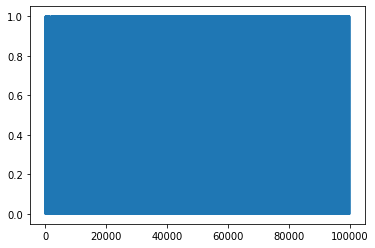

In [39]:
plt.plot(episode_reward_list)

In [107]:
v_final = Q.max(axis=1)
v_final

array([0.53971219, 0.49770772, 0.47015869, 0.45611446, 0.55609802,
       0.        , 0.35026544, 0.        , 0.58897276, 0.63877269,
       0.61135253, 0.        , 0.        , 0.7410249 , 0.86204837,
       0.        ])

In [123]:
v_final = Q_099.max(axis=1)
v_final

array([0.54297714, 0.5002656 , 0.47062016, 0.45695509, 0.55952686,
       0.        , 0.36936343, 0.        , 0.59375992, 0.64606399,
       0.63045128, 0.        , 0.        , 0.74207973, 0.86336956,
       0.        ])

In [130]:
v_final = Q_09.max(axis=1)
v_final

array([0.54269335, 0.50176398, 0.47413236, 0.45844457, 0.55921085,
       0.        , 0.35334628, 0.        , 0.59327873, 0.64368016,
       0.62405271, 0.        , 0.        , 0.74061987, 0.86546285,
       0.        ])

In [348]:
p_final = np.argmax(Q_09999_s, axis=1)
p_final

array([0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int64)

In [350]:
Q_099

array([[0.54554909, 0.53550986, 0.5352887 , 0.52992693],
       [0.30566048, 0.35995921, 0.33071438, 0.50641942],
       [0.43505264, 0.43425574, 0.42144343, 0.47948054],
       [0.29921325, 0.30209622, 0.30537263, 0.4665532 ],
       [0.56104901, 0.38989279, 0.38112681, 0.37169612],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35695432, 0.22148254, 0.30058547, 0.07616707],
       [0.        , 0.        , 0.        , 0.        ],
       [0.3920242 , 0.41240514, 0.40282698, 0.59262039],
       [0.44923825, 0.64339489, 0.46962672, 0.38849731],
       [0.6107923 , 0.46581268, 0.44525119, 0.32276411],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.45672925, 0.55696831, 0.74025343, 0.50995734],
       [0.75045348, 0.85936005, 0.81937929, 0.76519949],
       [0.        , 0.        , 0.        , 0.        ]])

In [352]:
np.argmax(Q_099, axis=1) == optimal_policy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [349]:
Q_09999_s

array([[0.54462195, 0.53233388, 0.53192842, 0.52711589],
       [0.34378604, 0.35719255, 0.31932175, 0.50225509],
       [0.44113659, 0.43774762, 0.42875474, 0.47299807],
       [0.30301931, 0.30471284, 0.29343085, 0.45937788],
       [0.56118253, 0.38134471, 0.38548672, 0.36747993],
       [0.        , 0.        , 0.        , 0.        ],
       [0.30915072, 0.16004202, 0.36737368, 0.1010547 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.38198254, 0.40941895, 0.40375782, 0.59585158],
       [0.44963421, 0.64364935, 0.45630809, 0.40065408],
       [0.62299764, 0.49208841, 0.4109724 , 0.32277681],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.45435086, 0.53481082, 0.73875038, 0.50628678],
       [0.73014503, 0.85730827, 0.82224243, 0.77985462],
       [0.        , 0.        , 0.        , 0.        ]])

In [132]:
p_final = np.argmax(Q_09, axis=1)
p_final

array([0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int64)

In [133]:
p_final = np.argmax(Q_099, axis=1)
p_final

array([0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int64)

In [126]:
optimal_policy

array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [124]:
optimal_value_function - v_final

array([-9.51207503e-04, -1.46241155e-03,  7.55269475e-05, -1.03390781e-04,
       -1.07589768e-03,  0.00000000e+00, -1.10153590e-02,  0.00000000e+00,
       -1.96117349e-03, -2.98416277e-03, -1.52437230e-02,  0.00000000e+00,
        0.00000000e+00, -3.59291908e-04, -5.32132390e-04,  0.00000000e+00])

In [110]:
optimal_value_function - v_final

array([0.00231374, 0.00109547, 0.000537  , 0.00073724, 0.00235294,
       0.        , 0.00808263, 0.        , 0.00282598, 0.00430713,
       0.00385503, 0.        , 0.        , 0.00069554, 0.00078906,
       0.        ])

In [105]:
v_final = Q.max(axis=1)
v_final

array([0.53971219, 0.49770772, 0.47015869, 0.45611446, 0.55609802,
       0.        , 0.35026544, 0.        , 0.58897276, 0.63877269,
       0.61135253, 0.        , 0.        , 0.7410249 , 0.86204837,
       0.        ])

In [59]:
optimal_value_function

array([0.22726283, 0.19386392, 0.184698  , 0.164176  , 0.25567068,
       0.        , 0.19861933, 0.        , 0.31603737, 0.41590873,
       0.4359874 , 0.        , 0.        , 0.54769002, 0.74793256,
       0.        ])

In [17]:
v = Q.max(axis=1)

p = Q.argmax(axis=1)


In [24]:
optimal_value_function

array([0.82352941, 0.82352941, 0.82352941, 0.82352941, 0.82352941,
       0.        , 0.52941176, 0.        , 0.82352941, 0.82352941,
       0.76470588, 0.        , 0.        , 0.88235294, 0.94117647,
       0.        ])

In [18]:
v

array([0.24280421, 0.21407546, 0.24932495, 0.22140581, 0.27715036,
       0.        , 0.33649454, 0.        , 0.34840084, 0.45810285,
       0.62568555, 0.        , 0.        , 0.60532977, 0.73959159,
       0.        ])

In [19]:
p

array([0, 3, 2, 3, 0, 0, 2, 0, 3, 1, 1, 0, 0, 2, 3, 0], dtype=int64)

In [78]:
optimal_value_function

array([0.82352941, 0.82352941, 0.82352941, 0.82352941, 0.82352941,
       0.        , 0.52941176, 0.        , 0.82352941, 0.82352941,
       0.76470588, 0.        , 0.        , 0.88235294, 0.94117647,
       0.        ])

In [124]:
len(episode_reward_list)

9087

In [174]:
episode_r_list_099 = []
for i in range(0, len(episode_reward_list_099)-500, 500):
    episode_r_list_099.append(np.mean(episode_reward_list_099[i: i+500]))

In [175]:
episode_r_list_09 = []
for i in range(0, len(episode_reward_list_09)-500, 500):
    episode_r_list_09.append(np.mean(episode_reward_list_09[i: i+500]))

In [198]:
episode_r_list_08 = []
for i in range(0, len(episode_reward_list_08)-500, 500):
    episode_r_list_08.append(np.mean(episode_reward_list_08[i: i+500]))

In [298]:
episode_r_list_08s = []
for i in range(0, len(episode_reward_list_08_s)-500, 500):
    episode_r_list_08s.append(np.mean(episode_reward_list_08_s[i: i+500]))

In [288]:
episode_r_list_08_s

[0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.026,
 0.144,
 0.174,
 0.144,
 0.174,
 0.164,
 0.134,
 0.152,
 0.142,
 0.142,
 0.158,
 0.178,
 0.16,
 0.142,
 0.164,
 0.154,
 0.16,
 0.17,
 0.166,
 0.146,
 0.176,
 0.172,
 0.128,
 0.142,
 0.172,
 0.212,
 0.184,
 0.162,
 0.152,
 0.13,
 0.144,
 0.156,
 0.162,
 0.176,
 0.176,
 0.142,
 0.176,
 0.154,
 0.172,
 0.178,
 0.15,
 0.154,
 0.178,
 0.134,
 0.162,
 0.148,
 0.144,
 0.178,
 0.16,
 0.148,
 0.172,
 0.162,
 0.162,
 0.158,
 0.16,
 0.15,
 0.184,
 0.184,
 0.164,
 0.16,
 0.148,
 0.15,
 0.172,
 0.142,
 0.182,
 0.156,
 0.148,
 0.182,
 0.176,
 0.158,
 0.158,
 0.17,
 0.358,
 0.41,
 0.426,
 0.422,
 0.404,
 0.404,
 0.382,
 0.364,
 0.366,
 0.404,
 0.408,
 0.406,
 0.412,
 0.376,
 0.398,
 0.398,
 0.436,
 0.4,
 0.402,
 0.384,
 0.446,
 0.388,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.026,
 0.144,
 0.174,
 0.144,
 0.174,
 0.164,
 0.134,
 0.152,
 0.142,
 0.142,
 0.158,
 0.178,
 0.16,
 0.142,
 0.164,
 0.154,
 0.16,
 0.17,
 0.166,
 0.146,
 0.176,
 0.172,
 0.128,
 0.142,
 0.172,
 

In [336]:
episode_r_list_099s = []
for i in range(0, len(episode_reward_list_4)-500, 500):
    episode_r_list_099s.append(np.mean(episode_reward_list_4[i: i+500]))

In [274]:
episode_reward_list_099_s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [311]:
episode_r_list_0999999s = []
for i in range(0, len(episode_reward_list_large_s)-500, 500):
    episode_r_list_0999999s.append(np.mean(episode_reward_list_large_s[i: i+500]))

In [ ]:
episode_r_list_09999s = []
for i in range(0, len(episode_reward_list_09999_s)-500, 500):
    episode_r_list_09999s.append(np.mean(episode_reward_list_09999_s[i: i+500]))

Text(0.5, 1.0, 'Mean Episode Reward for Past 500 Episodes')

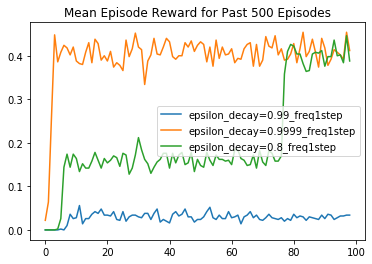

In [290]:
plt.plot(episode_r_list_099s, label = 'epsilon_decay=0.99_freq1step')
plt.plot(episode_r_list_09999s, label = 'epsilon_decay=0.9999_freq1step')
plt.plot(episode_r_list_08s, label = 'epsilon_decay=0.8_freq1step')
plt.legend()
plt.title('Mean Episode Reward for Past 500 Episodes')

TypeError: 'str' object is not callable

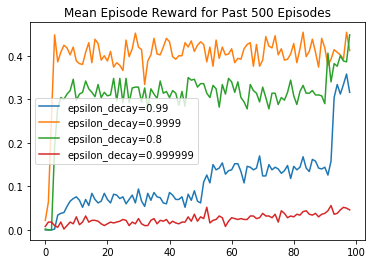

In [339]:
plt.plot(episode_r_list_099s, label = 'epsilon_decay=0.99')
plt.plot(episode_r_list_09999s, label = 'epsilon_decay=0.9999')
plt.plot(episode_r_list_08s, label = 'epsilon_decay=0.8')
plt.plot(episode_r_list_0999999s, label = 'epsilon_decay=0.999999')
plt.legend()
plt.title('Mean Episode Reward for Past 500 Episodes')
plt.xlabel('Iteration x500')
plt.ylabel('mean reward')

Text(0.5, 1.0, 'Mean Episode Reward for Past 500 Episodes')

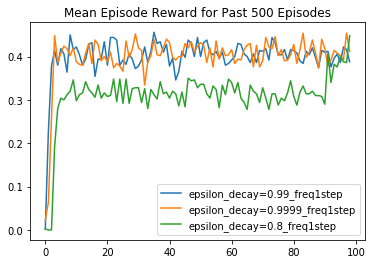

In [299]:
plt.plot(episode_r_list_099s, label = 'epsilon_decay=0.99_freq1step')
plt.plot(episode_r_list_09999s, label = 'epsilon_decay=0.9999_freq1step')
plt.plot(episode_r_list_08s, label = 'epsilon_decay=0.8_freq1step')
plt.legend()
plt.title('Mean Episode Reward for Past 500 Episodes')

In [287]:
episode_r_list_08s

[]

Text(0.5, 1.0, 'Mean Episode Reward for Past 500 Episodes')

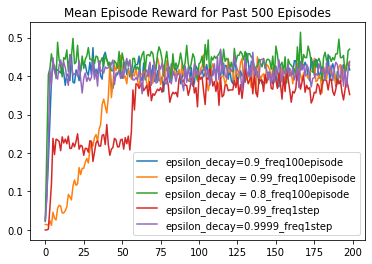

In [209]:
plt.plot(episode_r_list_09, label = 'epsilon_decay=0.9_freq100episode')
plt.plot(episode_r_list_099, label = 'epsilon_decay = 0.99_freq100episode')
plt.plot(episode_r_list_08, label = 'epsilon_decay = 0.8_freq100episode')
plt.plot(episode_r_list_099s, label = 'epsilon_decay=0.99_freq1step')
plt.plot(episode_r_list_09999s, label = 'epsilon_decay=0.9999_freq1step')
plt.legend()
plt.title('Mean Episode Reward for Past 500 Episodes')


Text(0, 0.5, 'mean episode reward for past 500 episodes')

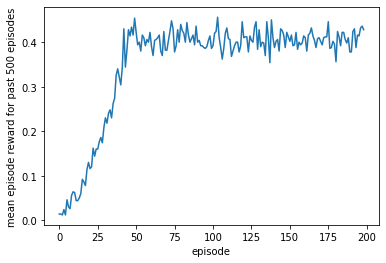

In [122]:
plt.plot(episode_r_list_099, )
plt.plot
plt.xlabel('episode')
plt.ylabel('mean episode reward for past 500 episodes')

In [127]:
Q

array([[3.87064193e-01, 2.42905376e-01, 2.52996505e-01, 2.58256411e-01],
       [1.17286184e-02, 4.62425974e-02, 5.62839613e-02, 2.65466360e-01],
       [8.25026754e-02, 6.22570653e-02, 1.49441616e-01, 2.66272364e-01],
       [1.58537881e-01, 1.01174809e-02, 4.73727217e-02, 1.92870146e-01],
       [3.96963874e-01, 3.96713333e-01, 7.74651916e-02, 4.07189741e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03326465e-01, 2.04982749e-04, 5.94829218e-03, 5.03080788e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.75835391e-01, 1.33809400e-02, 6.61212815e-02, 5.26760870e-01],
       [5.66375074e-01, 6.53070148e-01, 1.30218506e-01, 5.34443377e-01],
       [5.50746024e-01, 3.09832456e-02, 2.81275223e-02, 1.11229231e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.56890851e-02, 1.27044510e-01, 8.63506356e

In [147]:
def choose_action(state, epsilon):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
       # print ('max')
        action = np.argmax(Q[state, :])
    return action
#delta_list = []
for episode in range(total_episodes, total_episodes+10000):
    state = env.reset()
    t = 0
    
    episode_reward = 0
    old_Q = np.copy(Q) 
    while t < max_steps:
      #  env.render()

        action = choose_action(state, epsilon)  

        state2, reward, done, info = env.step(action)  
        
        episode_reward += reward 
        

        learn(state, state2, reward, action)

        state = state2

        t += 1
       
        if done:
            break

        time.sleep(0.1)
    episode_reward_list.append(episode_reward)
    
    
    
    delta = np.abs(np.mean(Q-old_Q))
    delta_list.append(delta)
     
    
    if episode >= 10 and episode % 10 == 0:
        print ('episode is {e} with episode reward as {r}'.format(e = episode, 
                                                                  r= np.mean(episode_reward_list[episode-10: episode] )))
        if epsilon > 0.1:
            epsilon = epsilon * epsilon_decay
        
        print (delta)
        print (epsilon)
        print (episode_reward_list[episode-10: episode])
        
    if delta < 1e-10:
        break
    
    
print(Q)

episode is 1000 with episode reward as 0.0
0.0022985274649136647
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1010 with episode reward as 0.0
0.0026080465708678896
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1020 with episode reward as 0.0
0.0008888385218526855
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1030 with episode reward as 0.0
0.00037452617551786286
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1040 with episode reward as 0.0
0.0009866357708665668
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1050 with episode reward as 0.0
0.0007698917127814824
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1060 with episode reward as 0.2
0.005179557694876022
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 1070 with episode reward as 0.0
0.000

episode is 1610 with episode reward as 0.0
0.001798985938993826
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1620 with episode reward as 0.1
0.005685435895040841
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1630 with episode reward as 0.1
0.007097600130030572
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1640 with episode reward as 0.2
0.01203269801584567
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 1650 with episode reward as 0.0
0.0038832445762325253
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1660 with episode reward as 0.0
0.00300541806013802
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1670 with episode reward as 0.1
0.010951489994627743
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1680 with episode reward as 0.0
0.00255477177

episode is 2220 with episode reward as 0.3
0.013384092260166295
0.09913712829445723
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 2230 with episode reward as 0.0
0.0035220916755729493
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2240 with episode reward as 0.0
0.00045031172193386697
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2250 with episode reward as 0.2
0.003851116818180857
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 2260 with episode reward as 0.1
0.003783097516256154
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 2270 with episode reward as 0.0
0.007038681473842089
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2280 with episode reward as 0.0
0.008033363391239104
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2290 with episode reward as 0.2
0.0172825

episode is 2830 with episode reward as 0.2
0.004911083742466027
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2840 with episode reward as 0.1
0.0023421806618562383
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2850 with episode reward as 0.2
0.00033607509847617494
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2860 with episode reward as 0.2
0.009936127677862703
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 2870 with episode reward as 0.1
0.008037643198426881
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 2880 with episode reward as 0.2
0.005392106920975457
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 2890 with episode reward as 0.3
0.0034583791537131023
0.09913712829445723
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2900 with episode reward as 0.1
0.003026

episode is 3440 with episode reward as 0.4
0.010742515601768433
0.09913712829445723
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 3450 with episode reward as 0.2
0.004994323477113762
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 3460 with episode reward as 0.1
0.0015429217887328725
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3470 with episode reward as 0.1
0.00016932224107147215
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3480 with episode reward as 0.3
0.0016977170708197542
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 3490 with episode reward as 0.2
0.002012499947701749
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 3500 with episode reward as 0.1
0.0028699449262790115
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3510 with episode reward as 0.0
0.00154

episode is 4050 with episode reward as 0.0
0.0053706052264028675
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4060 with episode reward as 0.1
0.0013528934598524712
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 4070 with episode reward as 0.1
0.0015132911918113055
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4080 with episode reward as 0.1
0.004469087537857498
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4090 with episode reward as 0.1
0.0034742264254456734
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 4100 with episode reward as 0.0
0.017518541477189994
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4110 with episode reward as 0.2
0.00999683782141767
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 4120 with episode reward as 0.0
0.0019447

episode is 4660 with episode reward as 0.1
0.008863132994537568
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 4670 with episode reward as 0.2
0.003292068002064519
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 4680 with episode reward as 0.3
0.006048259615113685
0.09913712829445723
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 4690 with episode reward as 0.1
0.005371929778258647
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4700 with episode reward as 0.0
0.007466097689583238
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4710 with episode reward as 0.3
0.0008658742464552841
0.09913712829445723
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 4720 with episode reward as 0.1
0.0013635778567576001
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4730 with episode reward as 0.2
0.00955292

episode is 5270 with episode reward as 0.1
0.0026823238032383156
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5280 with episode reward as 0.1
0.0006301183850833164
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5290 with episode reward as 0.2
0.01609526297730404
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5300 with episode reward as 0.1
0.0026901581501885072
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5310 with episode reward as 0.2
0.004867591697238255
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 5320 with episode reward as 0.2
0.0010685610328352271
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 5330 with episode reward as 0.0
0.0010816189428611627
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5340 with episode reward as 0.0
0.003391

episode is 5880 with episode reward as 0.1
0.0042632066057781
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5890 with episode reward as 0.1
0.00651008064224518
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 5900 with episode reward as 0.0
0.0015034855793080518
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5910 with episode reward as 0.1
0.004359895626773001
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5920 with episode reward as 0.1
0.003731902635976094
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5930 with episode reward as 0.2
0.0022201298926615497
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 5940 with episode reward as 0.1
0.007636888828496282
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5950 with episode reward as 0.1
0.00280241184

episode is 6490 with episode reward as 0.0
0.0005105443117762105
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 6500 with episode reward as 0.0
0.00194381800373128
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 6510 with episode reward as 0.1
0.0039036319041828253
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 6520 with episode reward as 0.0
0.0050752107655845004
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 6530 with episode reward as 0.0
0.004123292191500721
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 6540 with episode reward as 0.2
0.001979744025255799
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 6550 with episode reward as 0.2
0.0017996301092353176
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 6560 with episode reward as 0.0
0.0087200

episode is 7100 with episode reward as 0.0
0.0073308437294769355
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7110 with episode reward as 0.0
0.0076688583974851045
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7120 with episode reward as 0.2
0.006865115215441309
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 7130 with episode reward as 0.1
0.008796551856067671
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 7140 with episode reward as 0.1
0.009512491521712896
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7150 with episode reward as 0.0
0.0038966187467290754
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7160 with episode reward as 0.2
0.000540871331344066
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 7170 with episode reward as 0.2
0.0032651

episode is 7710 with episode reward as 0.2
0.005971333887950638
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 7720 with episode reward as 0.2
0.007720627191378396
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 7730 with episode reward as 0.3
0.01127524166685571
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 7740 with episode reward as 0.0
0.0035977814122038977
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7750 with episode reward as 0.0
0.012078195507111714
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 7760 with episode reward as 0.3
0.002144586594180066
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 7770 with episode reward as 0.3
0.0021524457718086415
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 7780 with episode reward as 0.1
0.008032530

episode is 8320 with episode reward as 0.3
0.002860613003361556
0.09913712829445723
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 8330 with episode reward as 0.1
0.0010185555642027936
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 8340 with episode reward as 0.1
0.0019072007691083809
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8350 with episode reward as 0.2
0.00016064882992792955
0.09913712829445723
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8360 with episode reward as 0.2
0.0038180575017919115
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 8370 with episode reward as 0.2
0.0005995611465475911
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 8380 with episode reward as 0.1
0.0007791205884774008
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 8390 with episode reward as 0.2
0.002

episode is 8930 with episode reward as 0.0
0.00374689259123132
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 8940 with episode reward as 0.2
0.010315794884560156
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 8950 with episode reward as 0.1
0.0009438543406759723
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 8960 with episode reward as 0.4
0.003402995702249919
0.09913712829445723
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 8970 with episode reward as 0.5
0.0031967313785838205
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]
episode is 8980 with episode reward as 0.4
0.001996084077951936
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
episode is 8990 with episode reward as 0.1
0.0017487725088823113
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 9000 with episode reward as 0.1
0.01017389

episode is 9540 with episode reward as 0.2
0.005200767400252712
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 9550 with episode reward as 0.0
0.0024137149799389225
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 9560 with episode reward as 0.2
0.004909029157297415
0.09913712829445723
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 9570 with episode reward as 0.2
0.010406626462446597
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 9580 with episode reward as 0.4
5.783221141456192e-05
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
episode is 9590 with episode reward as 0.1
0.004655544565537222
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 9600 with episode reward as 0.2
0.0022055739549934426
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 9610 with episode reward as 0.0
0.0027476

episode is 10150 with episode reward as 0.2
0.0007914059853023443
0.09913712829445723
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10160 with episode reward as 0.1
0.0037516399840797805
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10170 with episode reward as 0.2
0.0054134756554459545
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 10180 with episode reward as 0.0
0.006536372630482167
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10190 with episode reward as 0.5
0.0009191706879131747
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
episode is 10200 with episode reward as 0.0
0.0035627565520640735
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10210 with episode reward as 0.0
0.0002468174797048042
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10220 with episode reward as 0.

episode is 10760 with episode reward as 0.0
0.0009961832876229557
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10770 with episode reward as 0.5
0.0022805975849087643
0.09913712829445723
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 10780 with episode reward as 0.2
0.0011460232855536783
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 10790 with episode reward as 0.1
0.0010883790516230114
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10800 with episode reward as 0.0
0.004352298256727013
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 10810 with episode reward as 0.4
0.011848448035354807
0.09913712829445723
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 10820 with episode reward as 0.3
0.006235624293015834
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
episode is 10830 with episode reward as 0.1


In [149]:
np.mean(delta_list[:1000])

0.004381368196400316

In [150]:
np.mean(delta_list[-1000:])

0.0047841580113538555

In [123]:
def choose_action(state, epsilon):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
       # print ('max')
        action = np.argmax(Q[state, :])
    return action
#delta_list = []
for episode in range(total_episodes, total_episodes+5000):
    state = env.reset()
    t = 0
    
    episode_reward = 0
    old_Q = np.copy(Q) 
    while t < max_steps:
      #  env.render()

        action = choose_action(state, epsilon)  

        state2, reward, done, info = env.step(action)  
        
        episode_reward += reward 
        

        learn(state, state2, reward, action)

        state = state2

        t += 1
       
        if done:
            break

        time.sleep(0.1)
    episode_reward_list.append(episode_reward)
    
    
    
    delta = np.abs(np.mean(Q-old_Q))
    delta_list.append(delta)
     
    
    if episode >= 10 and episode % 10 == 0:
        print ('episode is {e} with episode reward as {r}'.format(e = episode, 
                                                                  r= np.mean(episode_reward_list[episode-10: episode] )))
        if epsilon > 0.1:
            epsilon = epsilon * epsilon_decay
        
        print (delta)
        print (epsilon)
        print (episode_reward_list[episode-10: episode])
        
    if delta < 1e-10:
        break
    
    
print(Q)

episode is 1000 with episode reward as 0.0
0.0007439613025343562
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1010 with episode reward as 0.0
0.0033611724889205294
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1020 with episode reward as 0.0
0.0031276375200899186
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1030 with episode reward as 0.0
0.001268724995818741
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1040 with episode reward as 0.0
0.0048684595916277905
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1050 with episode reward as 0.0
0.0008781315422470111
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1060 with episode reward as 0.2
0.0055519347908940895
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
episode is 1070 with episode reward as 0.0
0.0024

episode is 1610 with episode reward as 0.0
0.0034909499261761264
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1620 with episode reward as 0.1
0.0011451391815011152
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1630 with episode reward as 0.1
0.001791239914060932
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1640 with episode reward as 0.2
0.0006106713598140916
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
episode is 1650 with episode reward as 0.0
0.0071224768546685035
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1660 with episode reward as 0.0
0.0018452768691639408
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1670 with episode reward as 0.1
0.0031215036656234464
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 1680 with episode reward as 0.0
0.0036

episode is 2220 with episode reward as 0.3
0.00021647226542071134
0.09913712829445723
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 2230 with episode reward as 0.0
0.011816428223949658
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2240 with episode reward as 0.0
0.005432720728960147
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2250 with episode reward as 0.2
0.0010794901758829165
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 2260 with episode reward as 0.1
0.007478224504181303
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 2270 with episode reward as 0.0
0.0028518029006427015
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2280 with episode reward as 0.0
0.003947932808104317
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2290 with episode reward as 0.2
0.001482

episode is 2830 with episode reward as 0.2
0.0023441955588741625
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2840 with episode reward as 0.1
0.00817160099585835
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2850 with episode reward as 0.2
0.0007163520163314548
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2860 with episode reward as 0.2
0.0016768121010361072
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
episode is 2870 with episode reward as 0.1
0.0025006363104735697
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 2880 with episode reward as 0.2
0.0025615251836177415
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 2890 with episode reward as 0.3
0.013188271070231327
0.09913712829445723
[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 2900 with episode reward as 0.1
0.004043

episode is 3440 with episode reward as 0.4
0.001072480710738582
0.09913712829445723
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
episode is 3450 with episode reward as 0.2
0.0001443409355741718
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 3460 with episode reward as 0.1
0.0022208085727702595
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3470 with episode reward as 0.1
0.001788092974219442
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3480 with episode reward as 0.3
0.004286255081842002
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 3490 with episode reward as 0.2
0.0034510481821644653
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 3500 with episode reward as 0.1
0.0014570007322365825
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 3510 with episode reward as 0.0
0.009144

episode is 4050 with episode reward as 0.0
0.0033016447792268834
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4060 with episode reward as 0.1
0.002561020696993534
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 4070 with episode reward as 0.1
0.0008966778466104894
0.09913712829445723
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4080 with episode reward as 0.1
0.0015621287663785568
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4090 with episode reward as 0.1
0.001827952810200215
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 4100 with episode reward as 0.0
0.0019039903119656533
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4110 with episode reward as 0.2
0.0016004369712905153
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 4120 with episode reward as 0.0
0.00528

episode is 4660 with episode reward as 0.1
0.00526151683271737
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
episode is 4670 with episode reward as 0.2
0.0006929006796003417
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
episode is 4680 with episode reward as 0.3
0.0010614855767564265
0.09913712829445723
[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 4690 with episode reward as 0.1
0.009190624804107095
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4700 with episode reward as 0.0
0.003970415834795858
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4710 with episode reward as 0.3
0.001310771384017138
0.09913712829445723
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
episode is 4720 with episode reward as 0.1
0.006718156310029089
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 4730 with episode reward as 0.2
0.002935868

episode is 5270 with episode reward as 0.1
0.0041999051068326455
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5280 with episode reward as 0.1
0.007127976587189582
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5290 with episode reward as 0.2
0.004936595438192713
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5300 with episode reward as 0.1
0.005305832661930167
0.09913712829445723
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5310 with episode reward as 0.2
0.005625986349255611
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
episode is 5320 with episode reward as 0.2
0.0034335541661952153
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]
episode is 5330 with episode reward as 0.0
0.003186018015992438
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5340 with episode reward as 0.0
0.01452779

episode is 5880 with episode reward as 0.1
0.005275922237849068
0.09913712829445723
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5890 with episode reward as 0.1
0.00818484881821899
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
episode is 5900 with episode reward as 0.0
0.0017988675277292605
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5910 with episode reward as 0.1
0.0024893936702925228
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
episode is 5920 with episode reward as 0.1
0.0084047710631346
0.09913712829445723
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5930 with episode reward as 0.2
0.005438196437055812
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
episode is 5940 with episode reward as 0.1
0.0003696700600217401
0.09913712829445723
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
episode is 5950 with episode reward as 0.1
0.0004053030

In [135]:
Q

array([[3.87064193e-01, 2.42905376e-01, 2.52996505e-01, 2.58256411e-01],
       [1.17286184e-02, 4.62425974e-02, 5.62839613e-02, 2.65466360e-01],
       [8.25026754e-02, 6.22570653e-02, 1.49441616e-01, 2.66272364e-01],
       [1.58537881e-01, 1.01174809e-02, 4.73727217e-02, 1.92870146e-01],
       [3.96963874e-01, 3.96713333e-01, 7.74651916e-02, 4.07189741e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03326465e-01, 2.04982749e-04, 5.94829218e-03, 5.03080788e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.75835391e-01, 1.33809400e-02, 6.61212815e-02, 5.26760870e-01],
       [5.66375074e-01, 6.53070148e-01, 1.30218506e-01, 5.34443377e-01],
       [5.50746024e-01, 3.09832456e-02, 2.81275223e-02, 1.11229231e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.56890851e-02, 1.27044510e-01, 8.63506356e

In [132]:
optimal_value_function2

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.97820163, 0.92643052, 0.        ,
       0.85661768, 0.94623163, 0.98207721, 1.        , 1.        ,
       0.9346049 , 0.80108992, 0.47490377, 0.6236214 , 0.        ,
       0.94467761, 1.        , 1.        , 0.82561308, 0.54223433,
       0.        , 0.53934275, 0.61118923, 0.85195561, 1.        ,
       1.        , 0.        , 0.        , 0.16804079, 0.38321763,
       0.44226934, 0.        , 1.        , 1.        , 0.        ,
       0.19467347, 0.12090475, 0.        , 0.33240114, 0.        ,
       1.        , 1.        , 0.73155782, 0.46311564, 0.        ,
       0.27746705, 0.5549341 , 0.77746705, 0.        ])

In [146]:
len(episode_reward_list)

9087

In [144]:
print (Q)

[[3.87064193e-01 2.42905376e-01 2.52996505e-01 2.58256411e-01]
 [1.17286184e-02 4.62425974e-02 5.62839613e-02 2.65466360e-01]
 [8.25026754e-02 6.22570653e-02 1.49441616e-01 2.66272364e-01]
 [1.58537881e-01 1.01174809e-02 4.73727217e-02 1.92870146e-01]
 [3.96963874e-01 3.96713333e-01 7.74651916e-02 4.07189741e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.03326465e-01 2.04982749e-04 5.94829218e-03 5.03080788e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.75835391e-01 1.33809400e-02 6.61212815e-02 5.26760870e-01]
 [5.66375074e-01 6.53070148e-01 1.30218506e-01 5.34443377e-01]
 [5.50746024e-01 3.09832456e-02 2.81275223e-02 1.11229231e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.56890851e-02 1.27044510e-01 8.63506356e-01 1.48444310e-01]
 [5.38358560e-01 4.05319349e-01 5.43884320e-01 9.89030817e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [143]:
optimal_value_function

array([0.82352941, 0.82352941, 0.82352941, 0.82352941, 0.82352941,
       0.        , 0.52941176, 0.        , 0.82352941, 0.82352941,
       0.76470588, 0.        , 0.        , 0.88235294, 0.94117647,
       0.        ])

In [108]:
def eval():
    state = env.reset()
    i = 0
    episode_reward = 0
    done = False
    print (state)
    while not done:
        action = choose_action(state, 0)  
       # print (action)
        state2, reward, done, info = env.step(action)  
       # print (state2)
       # print (reward)
       # print (done)
        episode_reward += reward 
        i += 1 
        state= state2
    return episode_reward

In [112]:
np.mean([eval() for _ in range(100)])

0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max
max
max
max
max
0
max
max
max
max
max
max
max
max
max


0.14